<a href="https://colab.research.google.com/github/Kenneth0528/MS1008_MazeFinding/blob/main/MS0003_Combined_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

from statsmodels.tsa.api import VAR
import math

from itertools import combinations

world_energy = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/World Energy Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

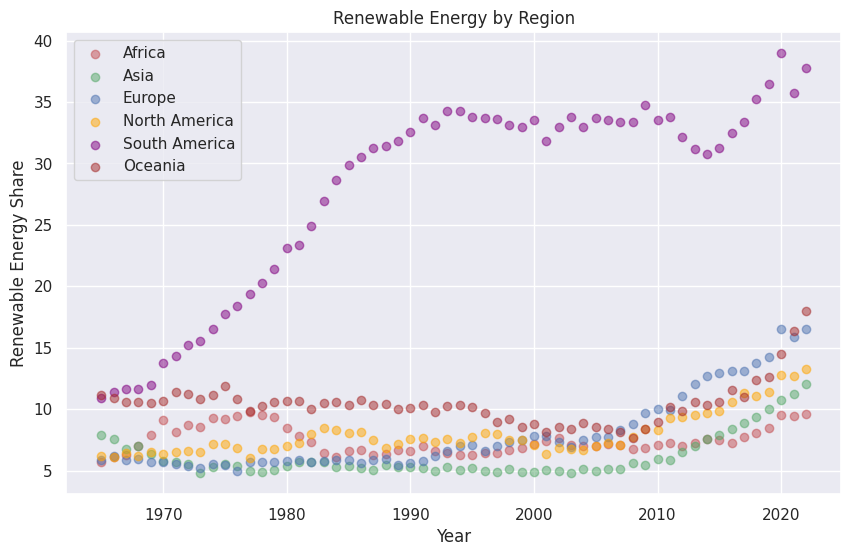

In [2]:
renewable = pd.DataFrame(world_energy[["country", "year", "renewables_share_energy"]])

renewable_regions = pd.DataFrame(renewable[renewable["country"].isin(["Africa", "Asia", "Europe","North America", "South America", "Oceania"])])

renewable_regions['clusters'] = renewable_regions['country'].map({'Africa': 0, 'Asia': 1, 'Europe': 2, "North America" : 3, "South America" : 4, "Oceania" : 5})

cluster_labels = {0: 'Africa', 1: 'Asia', 2: 'Europe', 3:"North America" , 4: "South America", 5: "Oceania"}
cluster_colors = {0: 'r', 1: 'g', 2: 'b',
                  3: 'orange',
                  4: 'purple',
                  5: 'brown'}

fig, ax = plt.subplots(figsize=(10, 6))

for cluster, color in cluster_colors.items():
    cluster_data = renewable_regions[renewable_regions['clusters'] == cluster]
    ax.scatter(x=cluster_data['year'],
               y=cluster_data['renewables_share_energy'],
               c=color,
               label=cluster_labels[cluster],
               alpha=0.5)

ax.set_xlabel('Year')
ax.set_ylabel('Renewable Energy Share')
ax.set_title('Renewable Energy by Region')
ax.legend()

plt.show()


In [3]:
energy_2021 = world_energy[world_energy['year'] == 2021]

# Selecting the desired columns
selected_columns = ['country', 'biofuel_share_energy', 'hydro_share_energy', 'solar_share_energy', 'wind_share_energy', 'other_renewables_share_energy']

# Extracting the required data
energy_2021_selected = energy_2021[selected_columns]

# Drop rows with NaN values
energy_2021_selected = energy_2021_selected.dropna()

# Displaying the extracted data
print(energy_2021_selected)

                             country  biofuel_share_energy  \
266                           Africa                 0.020   
324                      Africa (EI)                 0.020   
1122                       Argentina                 1.079   
1311                            Asia                 0.229   
1434               Asia Pacific (EI)                 0.267   
...                              ...                   ...   
19912                        Ukraine                 0.067   
20158                 United Kingdom                 0.800   
20281                  United States                 1.603   
20520  Upper-middle-income countries                 0.491   
21207                          World                 0.689   

       hydro_share_energy  solar_share_energy  wind_share_energy  \
266                 7.103               0.835              1.062   
324                 7.103               0.835              1.062   
1122                5.324               0.597      

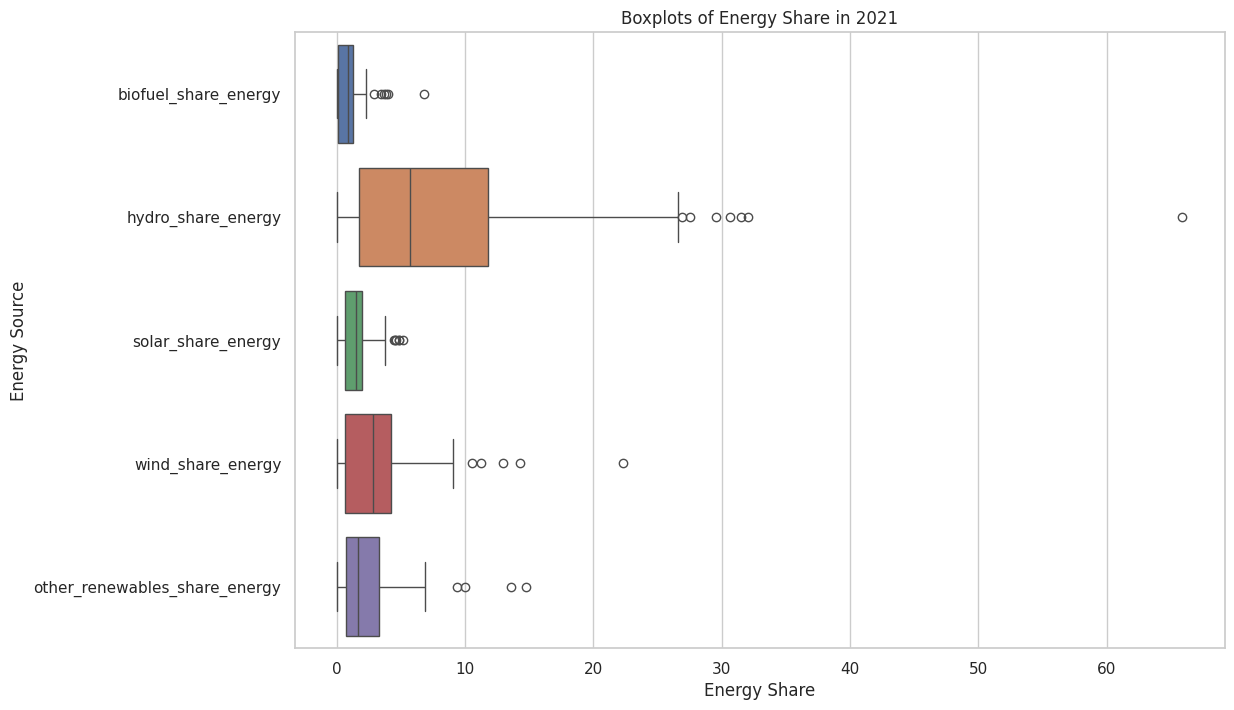

In [4]:
sb.set(style="whitegrid")

# Create a boxplot for the selected columns
plt.figure(figsize=(12, 8))
sb.boxplot(data=energy_2021_selected, orient="h")
plt.title('Boxplots of Energy Share in 2021')
plt.xlabel('Energy Share')
plt.ylabel('Energy Source')
plt.show()

# Clustering

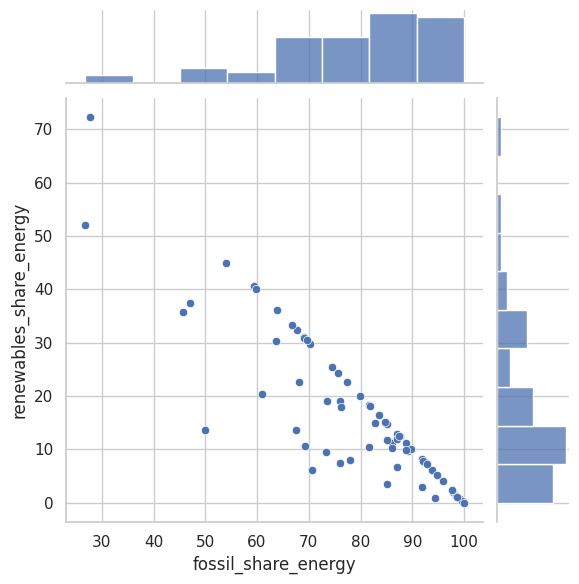

In [5]:
from sklearn.cluster import KMeans

feature = ["fossil_share_energy", "renewables_share_energy", "nuclear_share_energy"]

world_renewable = world_energy[["year", "country", "fossil_share_energy", "renewables_share_energy", "nuclear_share_energy"]]
world_renewable_2021 = world_renewable[world_renewable["year"].isin([2021])]
country_renewable_2021 = world_renewable_2021[~world_renewable_2021["country"].isin(["Africa", 'Africa (EI)', "World", 'Asia', \
                                                                                                      'Asia Pacific (EI)', 'CIS (EI)', 'Central America (EI)',\
                                                                                                      'Eastern Africa (EI)', 'Europe', 'Europe (EI)', \
                                                                                                      'European Union (27)', 'High-income countries', \
                                                                                                      'Lower-middle-income countries', \
                                                                                                      'Non-OECD (EI)', 'North America', 'North America (EI)',\
                                                                                                      'OECD (EI)', 'Oceania', 'South Africa', 'South America',\
                                                                                                     'South and Central America (EI)','Upper-middle-income countries'	])]
country_renewable_2021 = country_renewable_2021.dropna()
sb.jointplot(x = country_renewable_2021["fossil_share_energy"], y = country_renewable_2021["renewables_share_energy"])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

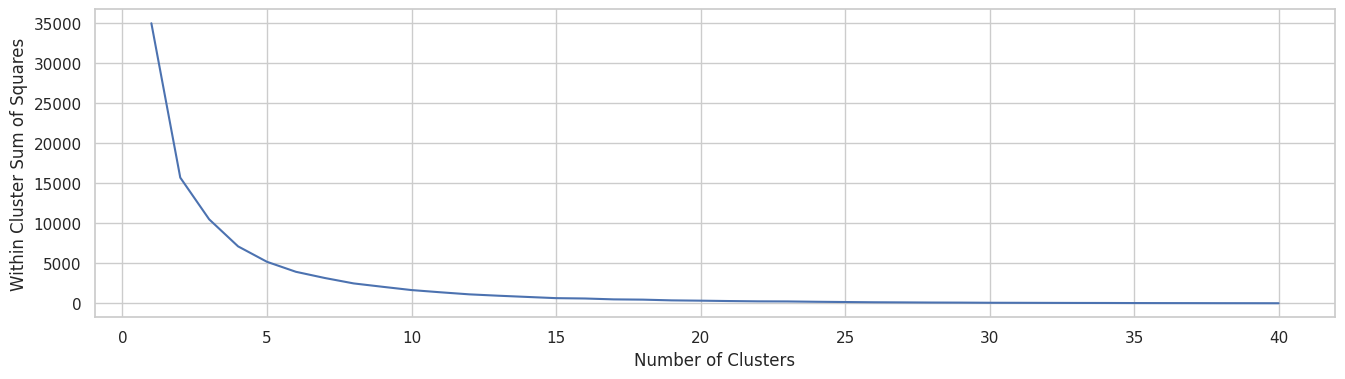

In [6]:
min_cluster = 1
max_cluster = 40

within_ss = []

for i in range(min_cluster, max_cluster + 1):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(country_renewable_2021.drop(["year", "country"], axis = 1))
  within_ss.append(kmeans.inertia_)

f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_cluster, max_cluster+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [7]:
kmeans_renewable = KMeans(n_clusters = 5)
kmeans_renewable.fit(country_renewable_2021.drop(["year", "country"], axis = 1))

label = kmeans_renewable.predict(country_renewable_2021.drop(["year", "country"], axis = 1))
country_renewable_2021_label = country_renewable_2021.copy()
country_renewable_2021_label["cluster"] = pd.Categorical(label)

country_renewable_2021_label["cluster"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    25
4    17
1    14
3     8
2     4
Name: count, dtype: int64

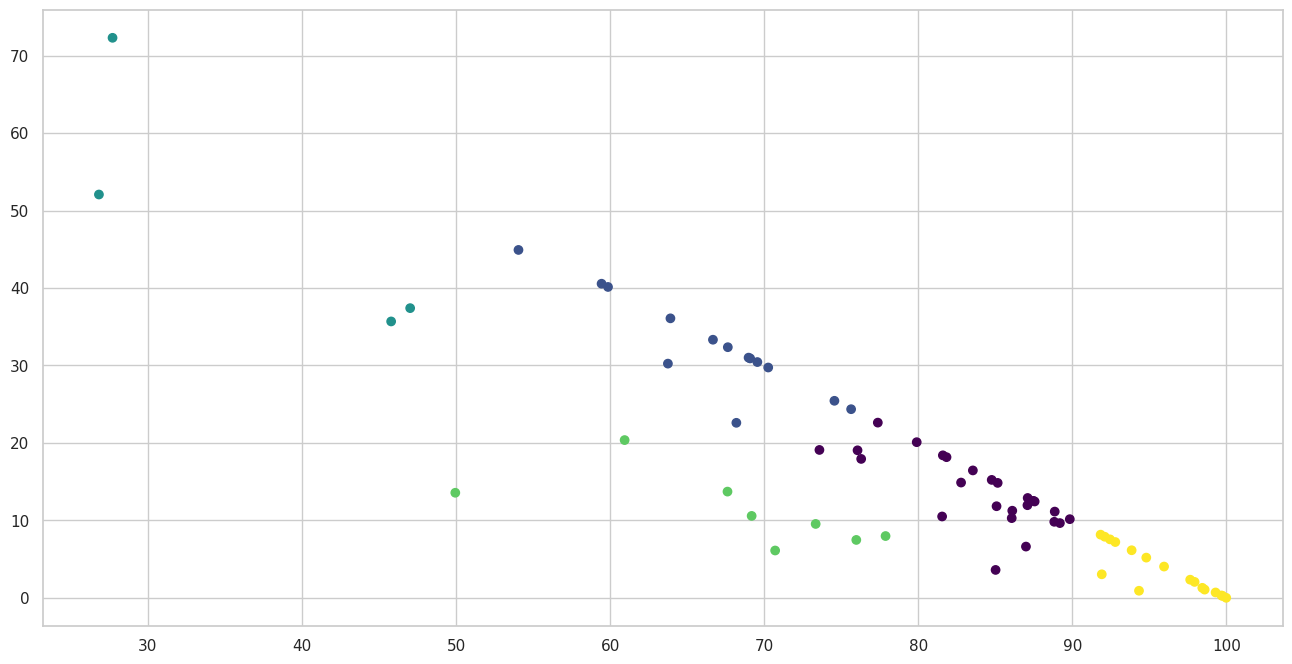

In [8]:
f, axes = plt.subplots(1, 1, figsize = (16, 8))

plt.scatter(x = "fossil_share_energy", y = "renewables_share_energy", c = "cluster", cmap = 'viridis', data = country_renewable_2021_label.drop(["year", "country"], axis = 1))

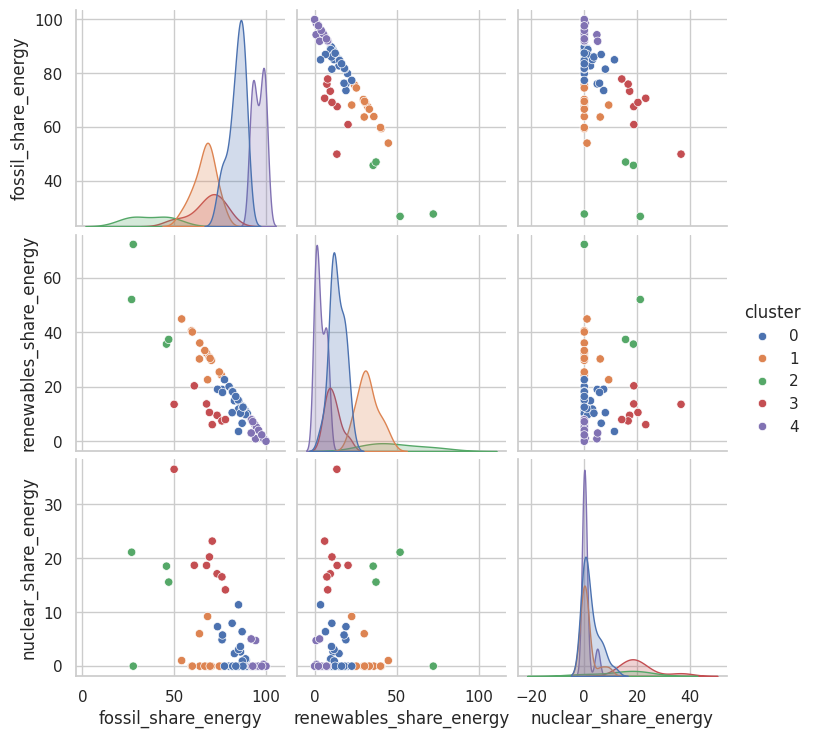

In [9]:
sb.pairplot(country_renewable_2021_label.drop(["year", "country"], axis = 1), vars = feature, hue = "cluster")

<Axes: >

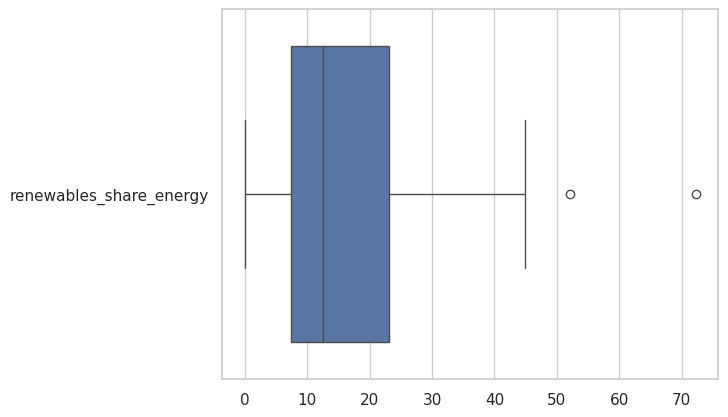

In [10]:
data = pd.DataFrame(country_renewable_2021["renewables_share_energy"])

sb.boxplot(data, orient = "h")

<Axes: xlabel='renewables_share_energy', ylabel='cluster'>

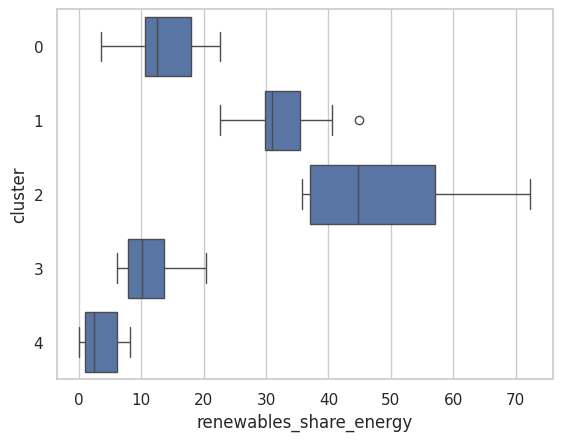

In [11]:

sb.boxplot(x = country_renewable_2021_label["renewables_share_energy"], y = country_renewable_2021_label["cluster"], orient = "h")

<Axes: xlabel='fossil_share_energy', ylabel='cluster'>

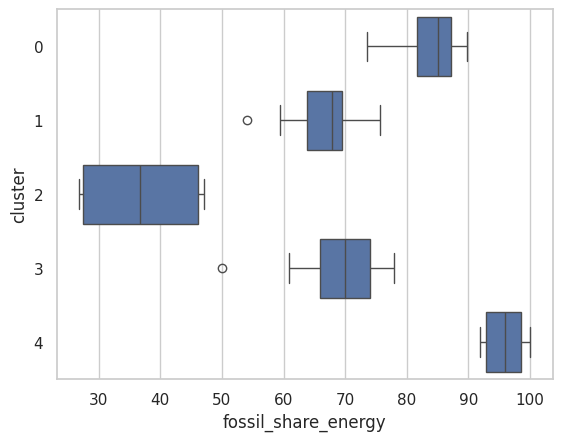

In [12]:
sb.boxplot(x = country_renewable_2021_label["fossil_share_energy"], y = country_renewable_2021_label["cluster"], orient = "h")

In [13]:
final_country_to_analysis = pd.DataFrame(country_renewable_2021_label[country_renewable_2021_label["cluster"].isin([1, 3])])
final_country_to_analysis

year      country  fossil_share_energy  renewables_share_energy  \
1839   2021      Austria               63.916                   36.084   
2458   2021      Belgium               73.343                    9.544   
3025   2021       Brazil               54.052                   44.914   
3313   2021     Bulgaria               67.620                   13.719   
3823   2021       Canada               63.752                   30.239   
4332   2021        Chile               75.644                   24.356   
4578   2021     Colombia               68.988                   31.012   
4983   2021      Croatia               70.263                   29.737   
5233   2021      Czechia               75.980                    7.480   
5572   2021      Denmark               59.446                   40.554   
6026   2021      Ecuador               67.641                   32.359   
7417   2021       France               49.952                   13.569   
9037   2021      Hungary               77.880                    7.982   
10565  2021       Latvia               74.560                   25.440   
13331  2021  New Zealand               59.864                   40.136   
15784  2021         Peru               69.091                   30.909   
16153  2021     Portugal               66.676                   33.324   
17269  2021     Slovakia               69.188                   10.580   
17302  2021     Slovenia               60.943                   20.370   
17979  2021        Spain               68.195                   22.599   
19912  2021      Ukraine               70.713                    6.116   
20771  2021    Venezuela               69.559                   30.441   

       nuclear_share_energy cluster  
1839                  0.000       1  
2458                 17.114       3  
3025                  1.034       1  
3313                 18.661       3  
3823                  6.009       1  
4332                  0.000       1  
4578                  0.000       1  
4983                  0.000       1  
5233                 16.540       3  
5572                  0.000       1  
6026                  0.000       1  
7417                 36.479       3  
9037                 14.138       3  
10565                 0.000       1  
13331                 0.000       1  
15784                 0.000       1  
16153                 0.000       1  
17269                20.232       3  
17302                18.687       3  
17979                 9.205       1  
19912                23.171       3  
20771                 0.000       1

## Since Latvia and Chile has the fossil fuel consumption of well above 70%, they are not considered as renewable country by our group, and therefore not included in the following

In [14]:
def ObtainData_single_feature(country_string, initial_year, final_year, feature_string, reindex):
  country = pd.DataFrame(world_energy[world_energy["country"].isin([country_string])])
  if(reindex == True):
    country.set_index("year", inplace = True)
    year = pd.DataFrame(country.loc[initial_year : final_year])
    feature = pd.DataFrame(year[feature_string])
  else:
    year = pd.DataFrame(country[(country["year"] >= initial_year) & (country["year"] <= final_year)])
    feature = pd.DataFrame(year[["year", feature_string]])
  return feature



def ObtainData_multiple_feature(country_string, initial_year, final_year, feature_list, reindex):
  country = pd.DataFrame(world_energy[world_energy["country"].isin([country_string])])
  if(reindex == True):
    country.set_index("year", inplace = True)
    year = pd.DataFrame(country.loc[initial_year : final_year])
    feature = pd.DataFrame(year[feature_list])
  else:
    year = pd.DataFrame(country[(country["year"] >= initial_year) & (country["year"] <= final_year)])
    year_list = ["year"]
    joined = year_list.append(feature_list)
    feature = pd.DataFrame(year[joined])
  return feature

def RMSE(actual_values_col, forecasted_values_col):
  squared_diff = (forecasted_values_col - actual_values_col) ** 2
  mean_squared_diff = squared_diff.mean()
  rmse = np.sqrt(mean_squared_diff)
  return rmse

# Interactive Plot

In [15]:
dataset = world_energy
import plotly.graph_objs as go

# List of years
years = [str(year) for year in range(1995, 2023)]

# List of countries
countries = ['Austria', 'Brazil', 'Canada', 'Colombia', 'Croatia', 'Denmark', 'Ecuador', 'Finland', 'France', 'New Zealand', 'Norway', 'Peru', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Venezuela']

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 120], 'title': 'fossil_share_energy'}
figure['layout']['yaxis'] = {'range': [-20, 100], 'title': 'renewables_share_energy'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '2000',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# Define a color scale for the markers
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'maroon', 'olive', 'navy', 'grey', 'black']

# make data
for country in countries:
    dataset_by_country = dataset[dataset['country'] == country]

    data_dict = {
        'x': list(dataset_by_country['fossil_share_energy']),
        'y': list(dataset_by_country['renewables_share_energy']),
        'mode': 'markers',
        'text': list(dataset_by_country['country']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 20000,
            'size': list(dataset_by_country['population'].dropna()),
            'color': colors[countries.index(country)]  # Assigning a color from the color scale based on the index
        },
        'name': country
    }
    figure['data'].append(data_dict)

# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for country in countries:
        dataset_by_year_country = dataset[(dataset['year'] == int(year)) & (dataset['country'] == country)]

        data_dict = {
            'x': list(dataset_by_year_country['fossil_share_energy']),
            'y': list(dataset_by_year_country['renewables_share_energy']),
            'mode': 'markers',
            'text': list(dataset_by_year_country['country']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 20000,
                'size': list(dataset_by_year_country['population'].dropna()),
                'color': colors[countries.index(country)]  # Assigning a color based on the index of the country
            },
            'name': country
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 500, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 500}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure['layout']['sliders'] = [sliders_dict]

# Plot the figure
fig = go.Figure(figure)
fig.show()


# ARIMA

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
def RMSE(actual_values_col, forecasted_values_col):
  squared_diff = (forecasted_values_col - actual_values_col) ** 2
  mean_squared_diff = squared_diff.mean()
  rmse = np.sqrt(mean_squared_diff)
  print("Root Mean Squared Error (RMSE):", rmse)
  return rmse

def result_table(forecast_df, forecast_col_string, actual_values, actual_col_string):
  evaluation = pd.concat([actual_values, forecast_df], axis = 1)
  print("step 1")
  evaluation["percentage diff"] = (evaluation[forecast_col_string] - evaluation[actual_col_string])*100/evaluation[actual_col_string]
  print("step 2")
  print(evaluation)
  print("Mean absolute percentage error: ", abs(evaluation["percentage diff"]).mean())
  RMSE(evaluation[actual_col_string], evaluation[forecast_col_string])

  return evaluation

In [18]:
def ARIMA_model(training_data, first_year_forecast, last_year_forecast, lag, y_axis):

  future_years = range(first_year_forecast, last_year_forecast + 1)
  num_of_years = len(future_years)

  nonZero = training_data[training_data[y_axis] != 0]

  if(len(nonZero) == 0):
    forecast_0 = pd.DataFrame(0, index = future_years, columns = ["forecasted value"])
    return forecast_0

  logged = np.log(nonZero)
  model = ARIMA(logged, order = (lag, 1, 0))
  model_fit = model.fit()



  forecast = model_fit.forecast(steps = num_of_years).values
  exponential = math.e**forecast
  forecast_df = pd.DataFrame(exponential, index = future_years, columns = ["forecasted value"])

  plt.figure(figsize=(10, 6))
  plt.plot(training_data, label='Training Data')
  plt.plot(forecast_df, label='Forecast')
  plt.xlabel('Year')
  plt.ylabel(y_axis)
  plt.legend()
  plt.show()

  return forecast_df

In [19]:
def full_forecast(country, toPredict_list):
  toPredict = toPredict_list

  col = toPredict.copy()
  col.insert(0, "Country")

  predicted_consumption_df = pd.DataFrame(columns = col, index = range(2023, 2031))
  predicted_consumption_df["Country"] = country

  for energy in toPredict_list:
    training_data = ObtainData_single_feature(country, 1966, 2022, energy, True).dropna()
    if(len(training_data) < 10):
      continue
    print("step 2.0")
    forecast_consumption = ARIMA_model(training_data, 2023, 2030, 5, energy)
    print("step 3.0")
    predicted_consumption_df[energy] = forecast_consumption["forecasted value"]

  predicted_consumption_df.reset_index(inplace = True, drop = False)
  print(predicted_consumption_df)

  return predicted_consumption_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



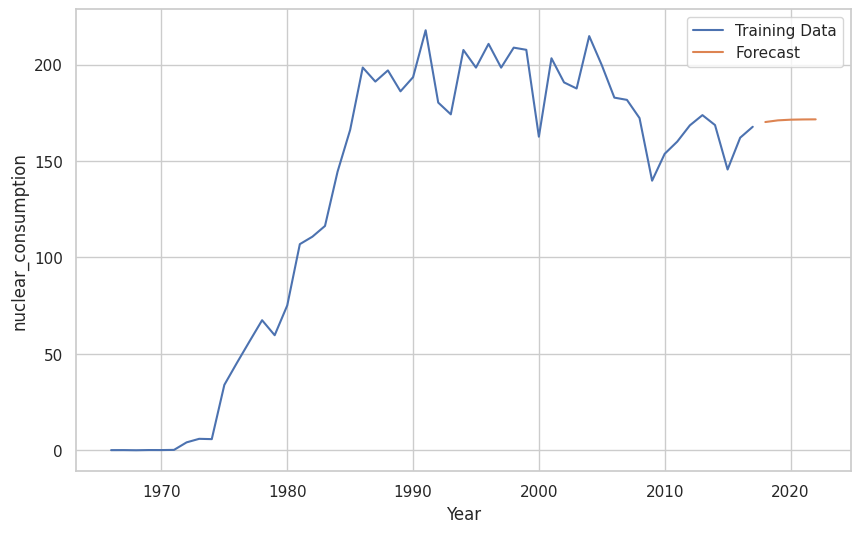

step 1
step 2
      nuclear_consumption  forecasted value  percentage diff
2018              174.034        170.226003        -2.188077
2019              167.273        171.094196         2.284407
2020              123.988        171.439970        38.271421
2021              132.993        171.566272        29.003986
2022              128.951        171.615052        33.085476
Mean absolute percentage error:  20.966673450065013
Root Mean Squared Error (RMSE): 33.433248341704
Root Mean Squared Error (RMSE): 33.433248341704


33.433248341704

In [20]:
training_data = ObtainData_single_feature("Sweden", 1966, 2017, "nuclear_consumption", True).dropna()
test_data = ObtainData_single_feature("Sweden", 2018, 2022, "nuclear_consumption", True)

forecast_consumption = ARIMA_model(training_data, 2018, 2022, 2, "nuclear_consumption")
result_table(forecast_consumption, "forecasted value", test_data, "nuclear_consumption")

RMSE(test_data["nuclear_consumption"], forecast_consumption["forecasted value"])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



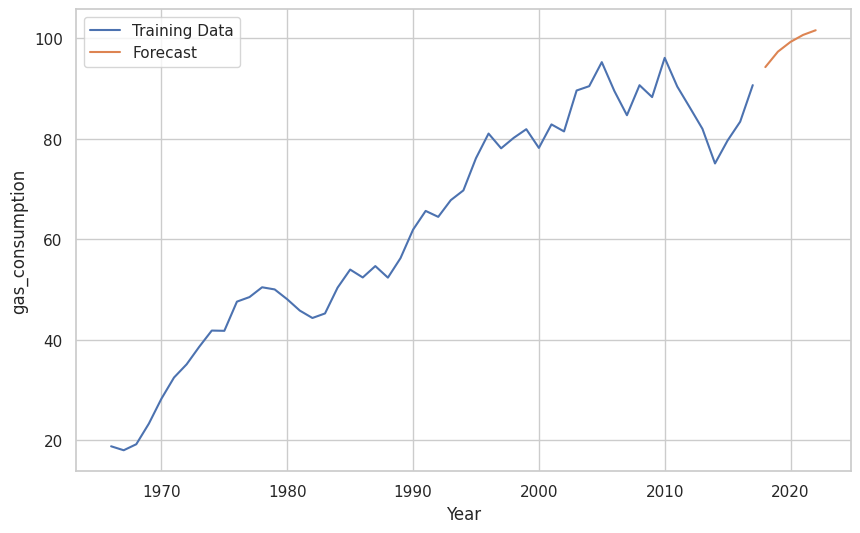

step 1
step 2
      gas_consumption  forecasted value  percentage diff
2018           86.869         94.290367         8.543170
2019           89.004         97.364440         9.393331
2020           85.272         99.299824        16.450680
2021           90.139        100.693470        11.709105
2022           79.128        101.622575        28.428084
Mean absolute percentage error:  14.904874033404079
Root Mean Squared Error (RMSE): 13.705153787773398
Root Mean Squared Error (RMSE): 13.705153787773398


13.705153787773398

In [21]:
training_data = ObtainData_single_feature("Austria", 1966, 2017, "gas_consumption", True).dropna()
test_data = ObtainData_single_feature("Austria", 2018, 2022, "gas_consumption", True)

forecast_consumption = ARIMA_model(training_data, 2018, 2022, 2, "gas_consumption")
result_table(forecast_consumption, "forecasted value", test_data, "gas_consumption")

RMSE(test_data["gas_consumption"], forecast_consumption["forecasted value"])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is

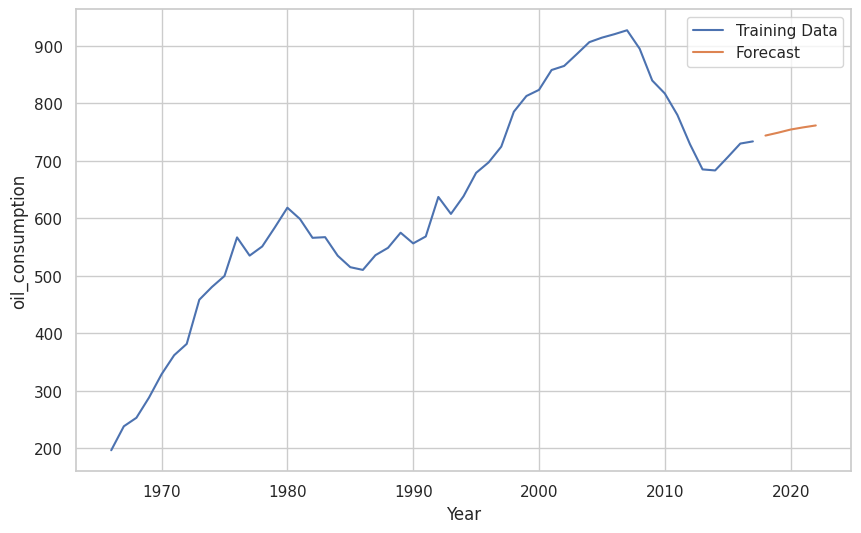

step 1
step 2
      oil_consumption  forecasted value  percentage diff
2018          748.057        744.131967        -0.524697
2019          748.729        749.124579         0.052833
2020          615.078        754.621129        22.687062
2021          673.233        758.392454        12.649329
2022          737.947        761.731725         3.223094
Mean absolute percentage error:  7.827403044769295
Root Mean Squared Error (RMSE): 73.89951695618014
Root Mean Squared Error (RMSE): 73.89951695618014


73.89951695618014

In [22]:
training_data = ObtainData_single_feature("Spain", 1966, 2017, "oil_consumption", True).dropna()
test_data = ObtainData_single_feature("Spain", 2018, 2022, "oil_consumption", True)

forecast_consumption = ARIMA_model(training_data, 2018, 2022, 2, "oil_consumption")
result_table(forecast_consumption, "forecasted value", test_data, "oil_consumption")

RMSE(test_data["oil_consumption"], forecast_consumption["forecasted value"])

###### From three randomly chosen country and energy type, the ARIMA model results in a low mean absolute percentage error of 5-30%, which is acceptable considering the complexitiy of the trend.

The following info is about: Austria
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



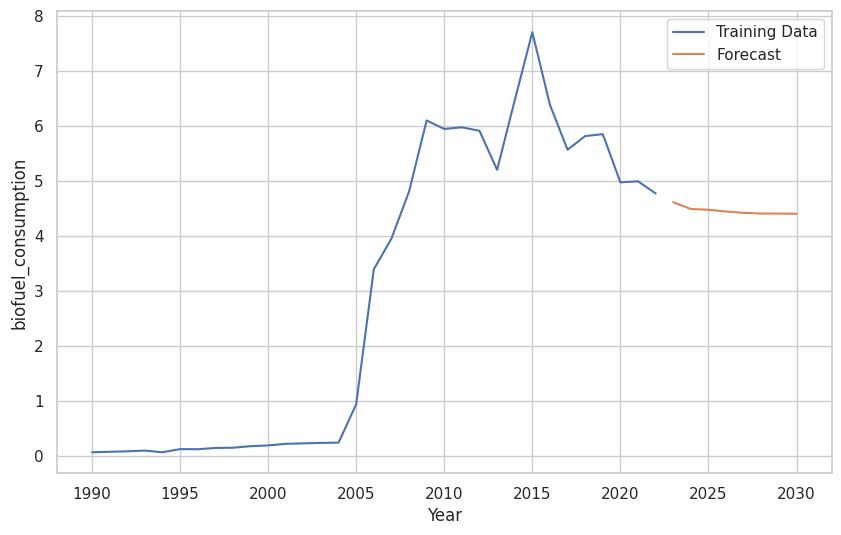

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



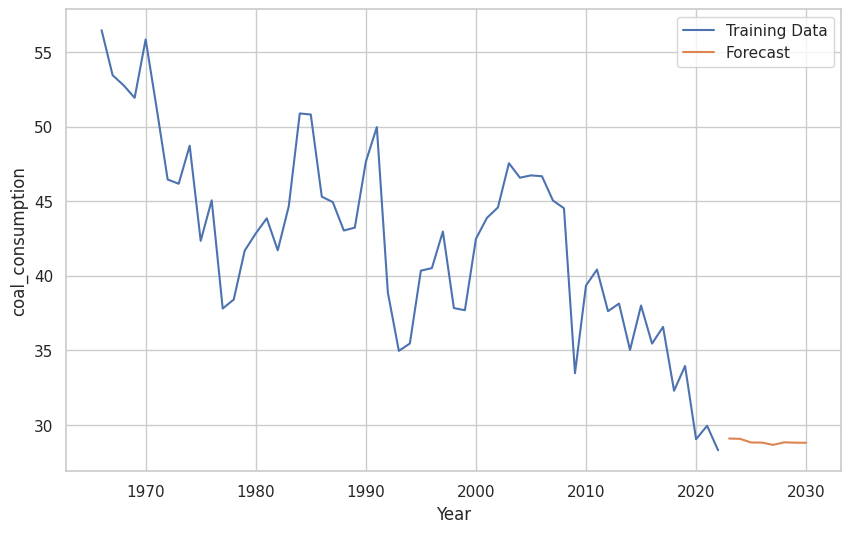

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



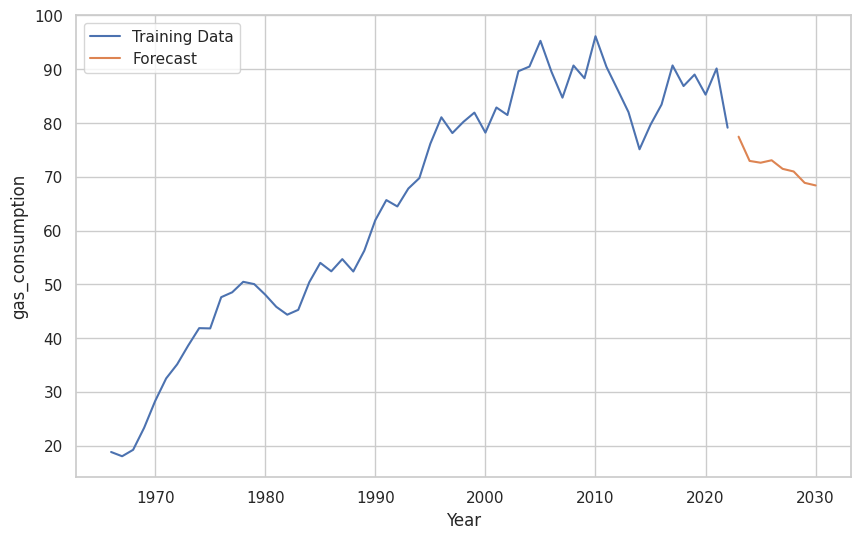

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



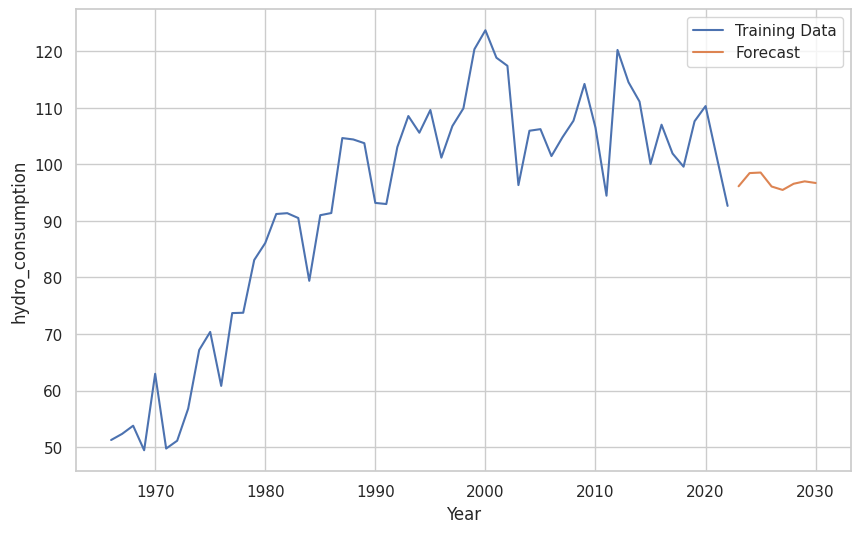

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



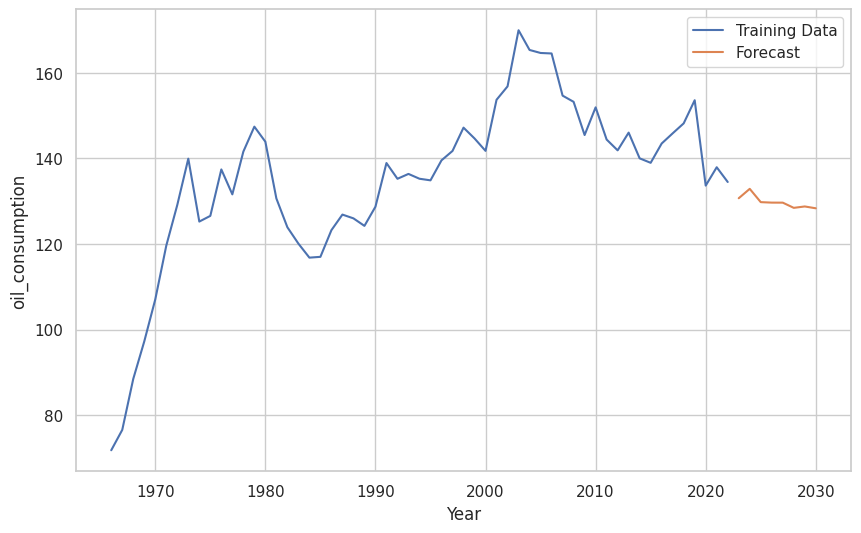

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



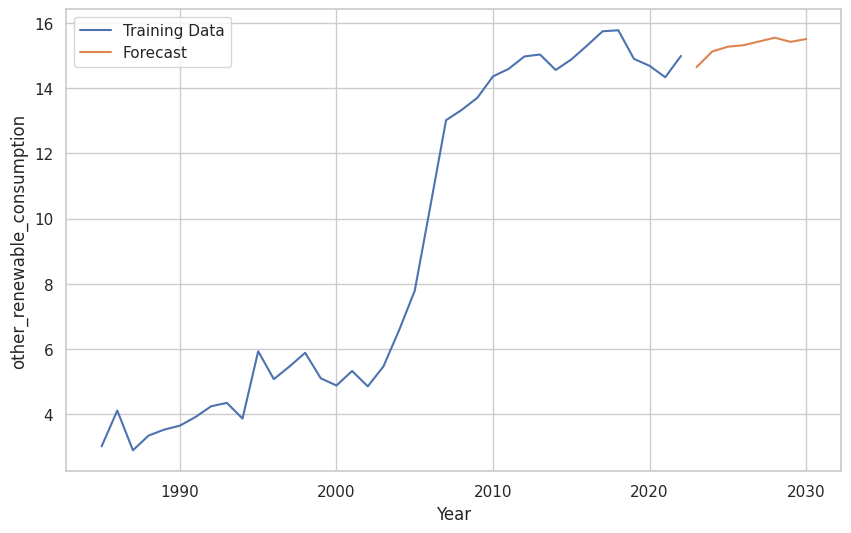

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



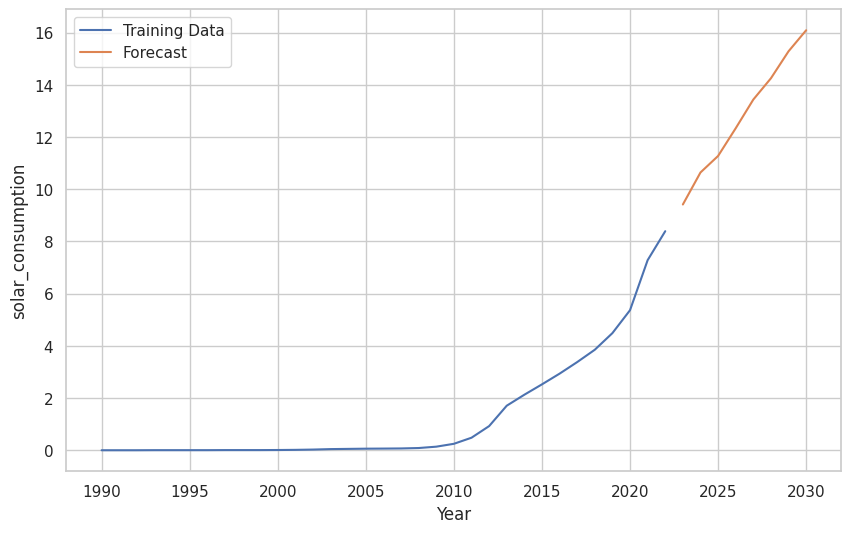

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



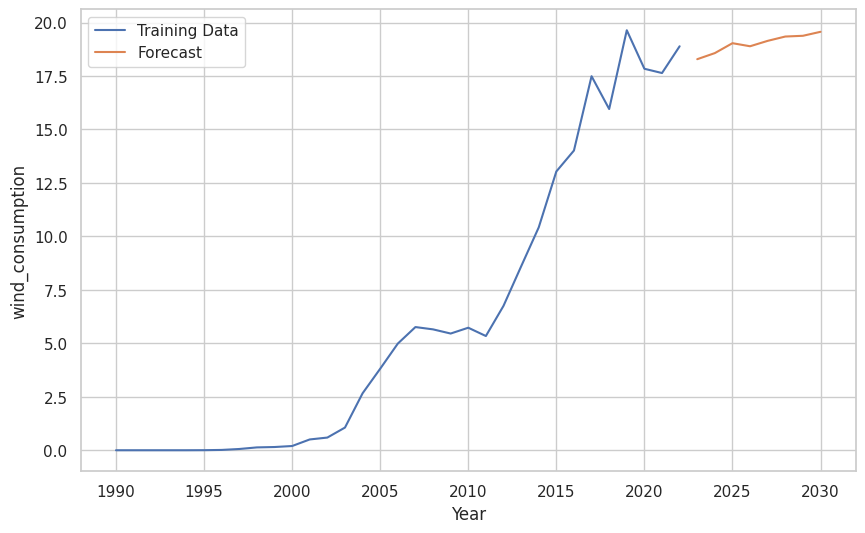

step 3.0
   index  Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Austria             4.615249         29.077780        77.451053   
1   2024  Austria             4.492768         29.057171        72.945817   
2   2025  Austria             4.478131         28.811009        72.610881   
3   2026  Austria             4.447097         28.806412        73.068424   
4   2027  Austria             4.422383         28.650953        71.473132   
5   2028  Austria             4.409961         28.824087        70.982460   
6   2029  Austria             4.409150         28.801012        68.870436   
7   2030  Austria             4.405490         28.793836        68.388046   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          96.117513                    0       130.678645   
1          98.449273                    0       132.875265   
2          98.545803                    0       129.769130   
3          96.074477                    0       1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



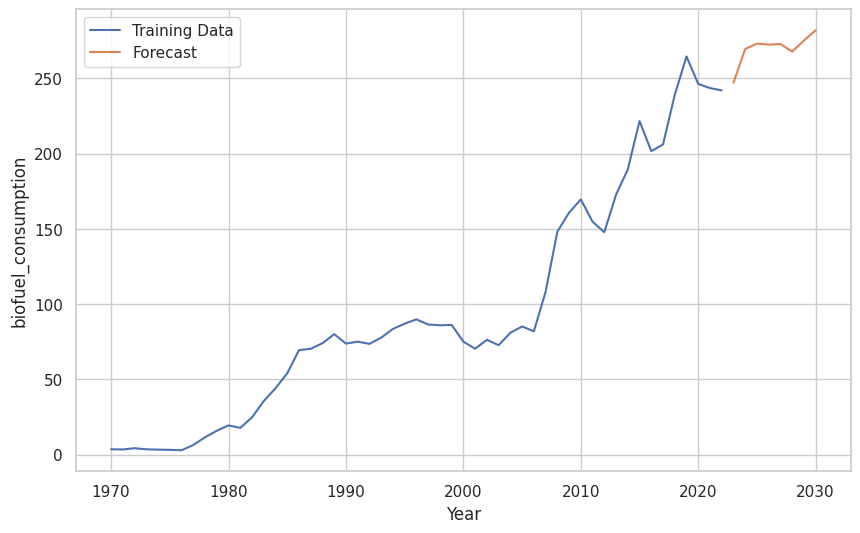

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



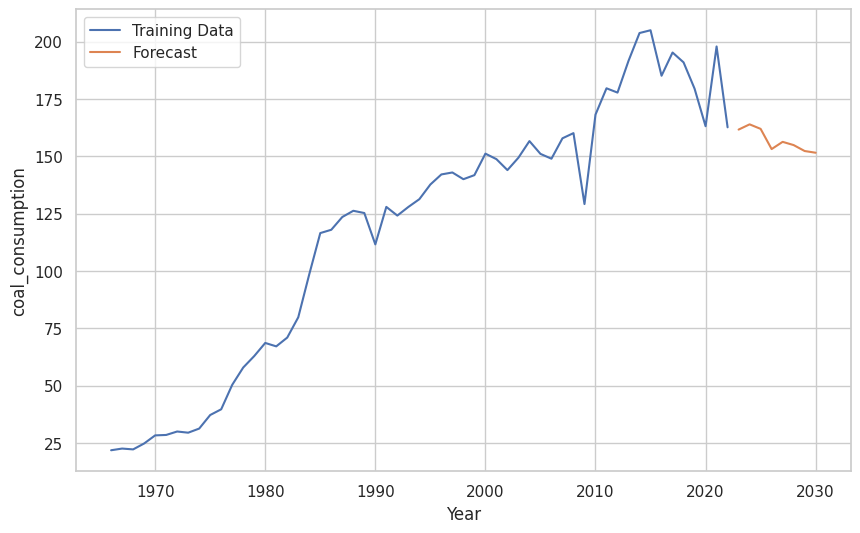

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



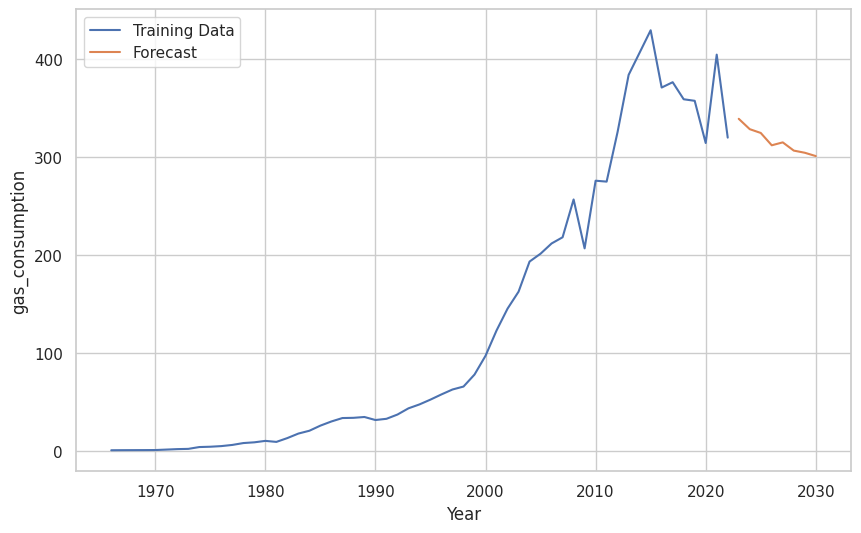

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



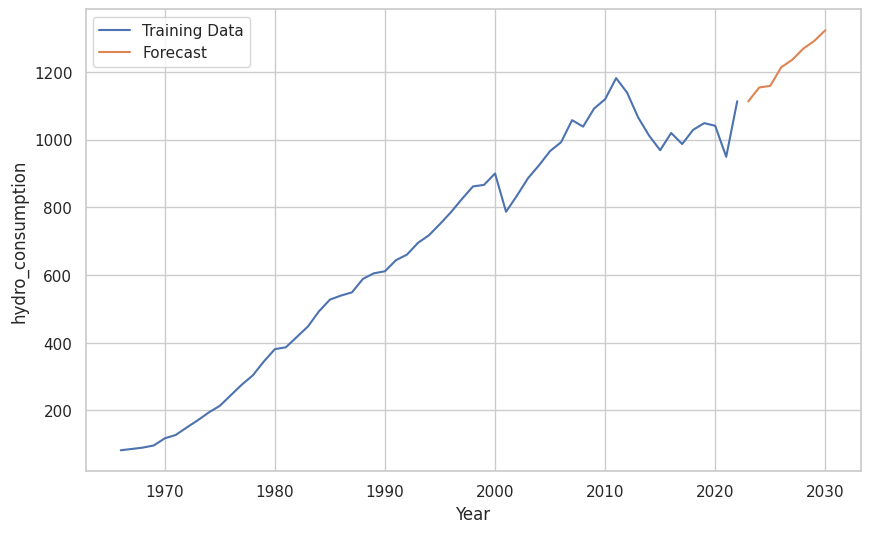

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



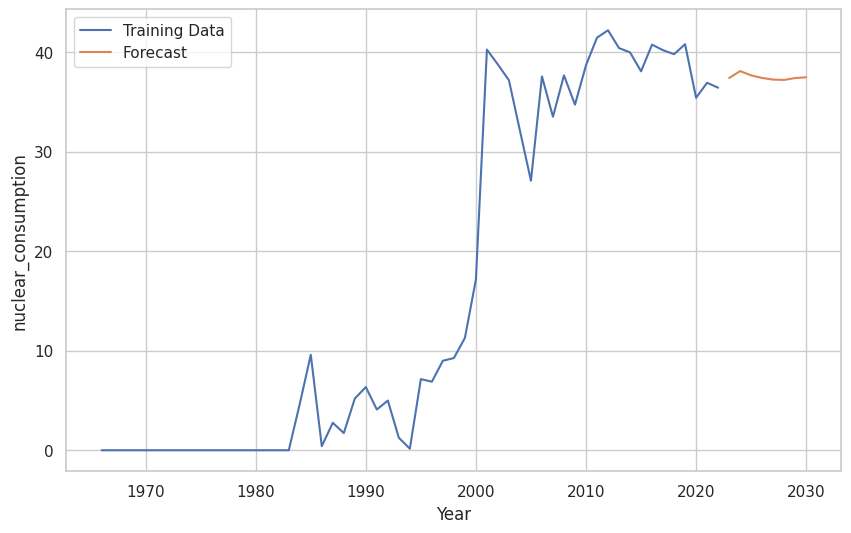

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



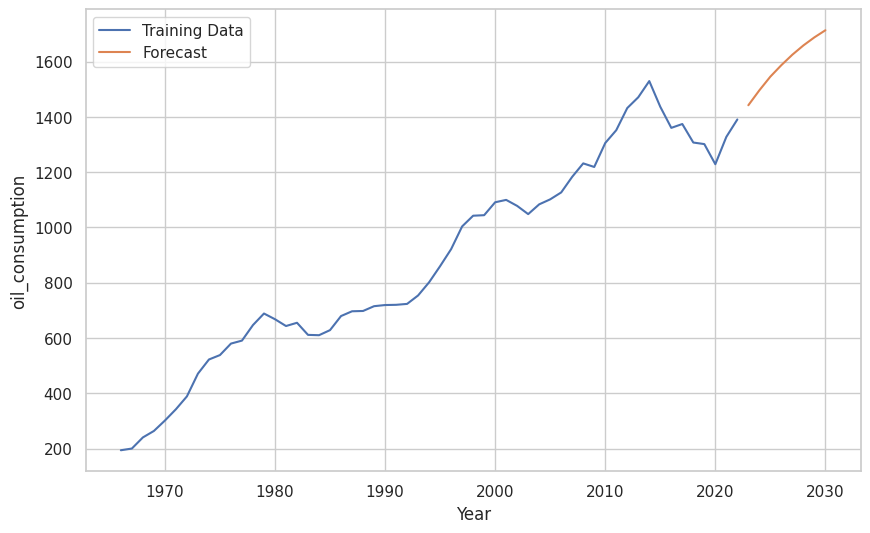

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



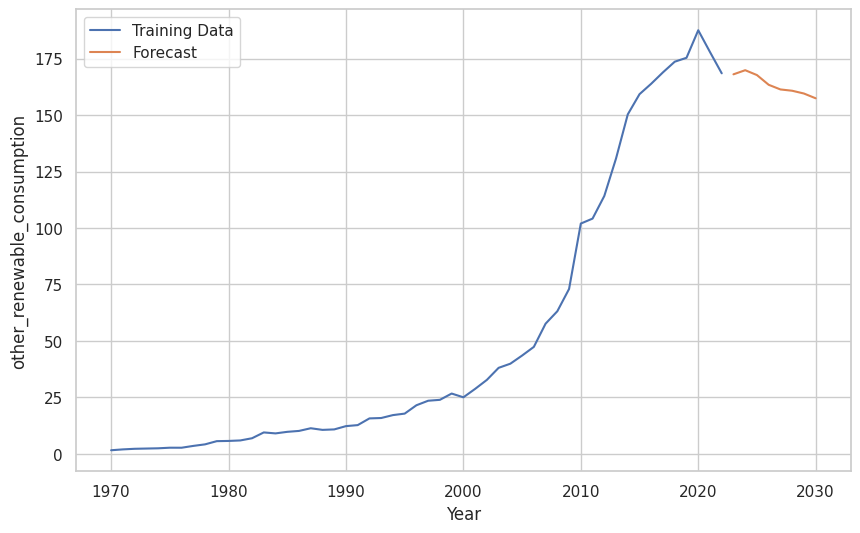

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



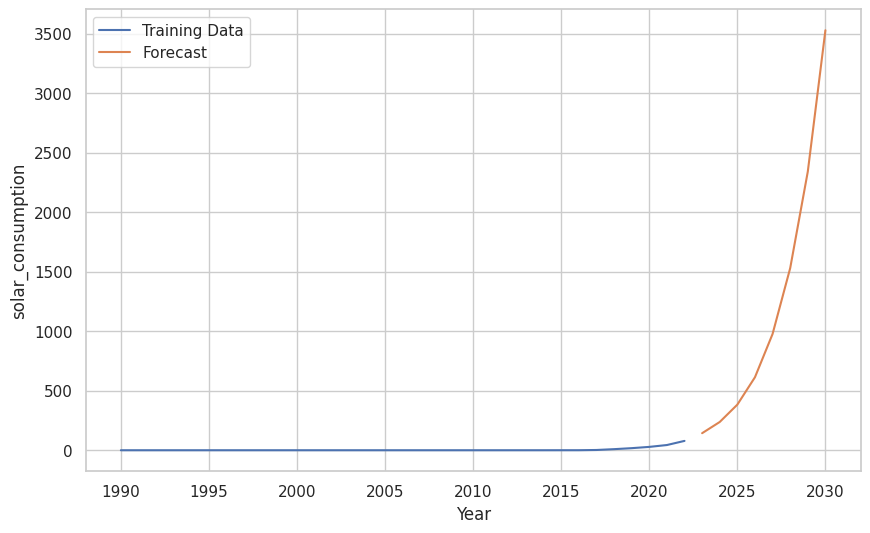

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



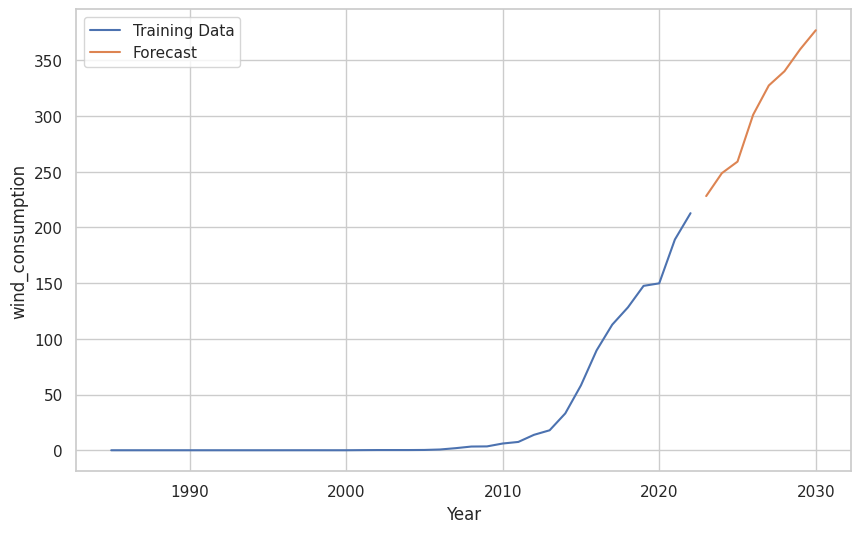

step 3.0
   index Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Brazil           247.049520        161.668374       338.968977   
1   2024  Brazil           269.436591        163.952856       328.390557   
2   2025  Brazil           272.991283        161.981843       324.515032   
3   2026  Brazil           272.365330        153.175546       311.923766   
4   2027  Brazil           272.743394        156.323492       314.910152   
5   2028  Brazil           267.712384        154.915495       306.501900   
6   2029  Brazil           275.065438        152.325386       304.305960   
7   2030  Brazil           281.898920        151.578317       300.911714   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0        1112.929397            37.397935      1442.208880   
1        1154.153538            38.096746      1496.175430   
2        1158.818563            37.662704      1545.716442   
3        1213.904261            37.406254      1587.297625

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



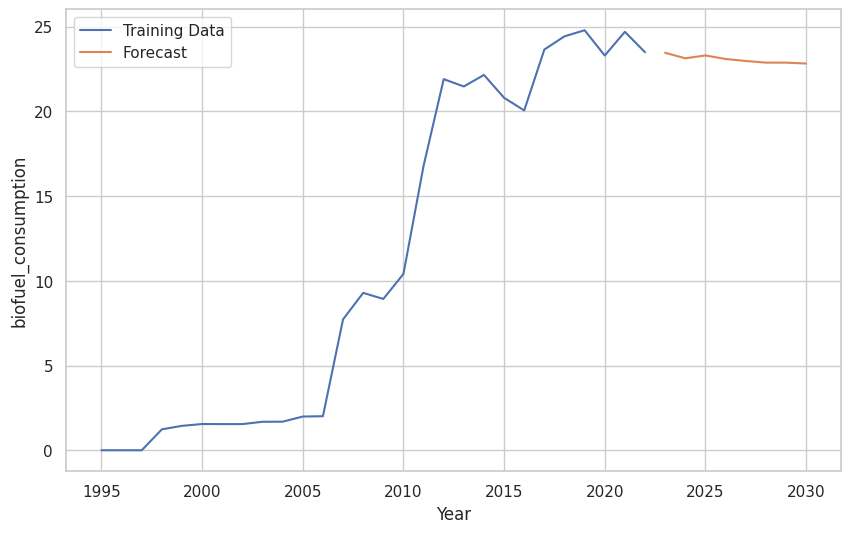

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



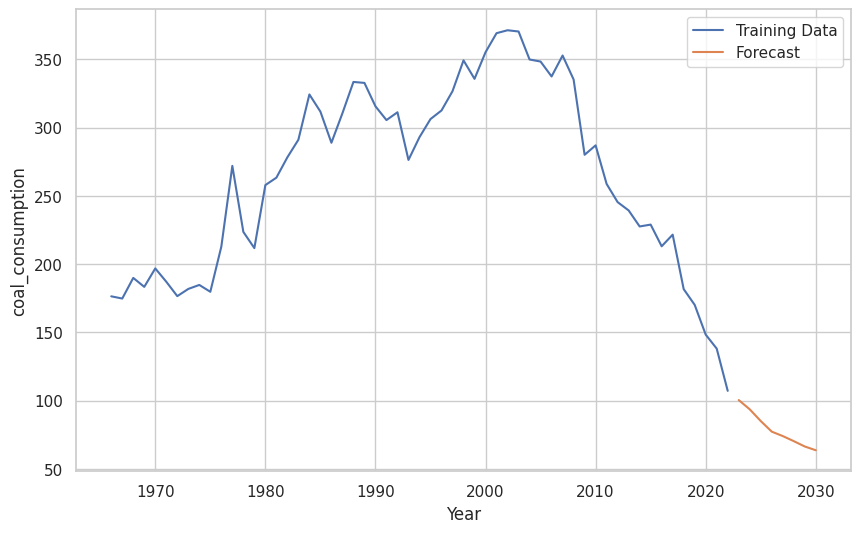

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



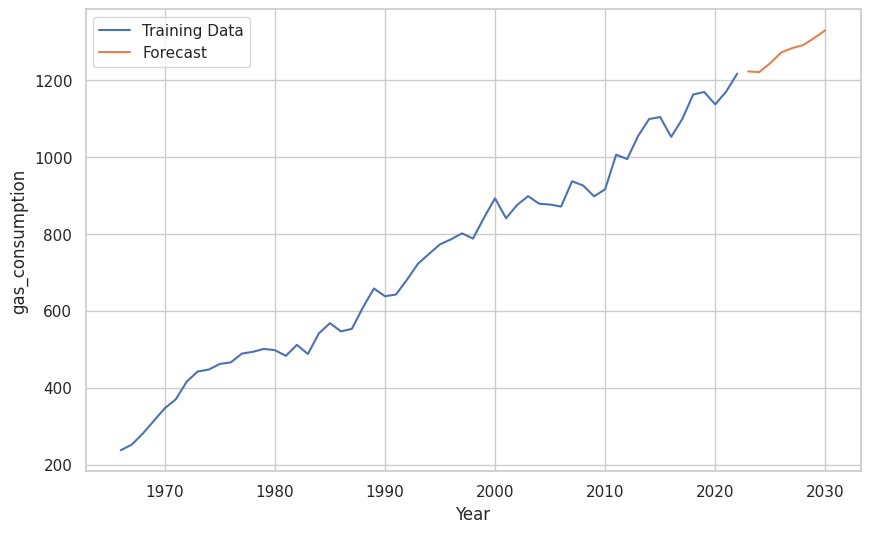

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



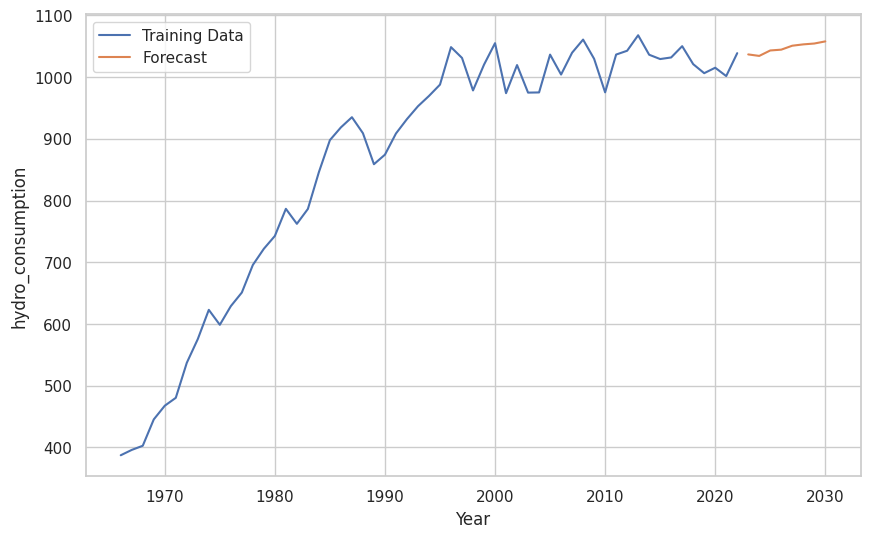

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



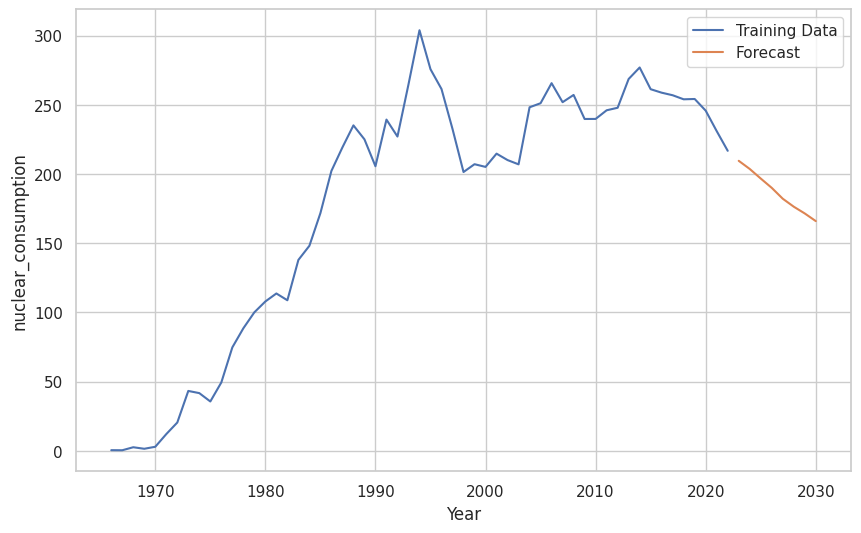

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



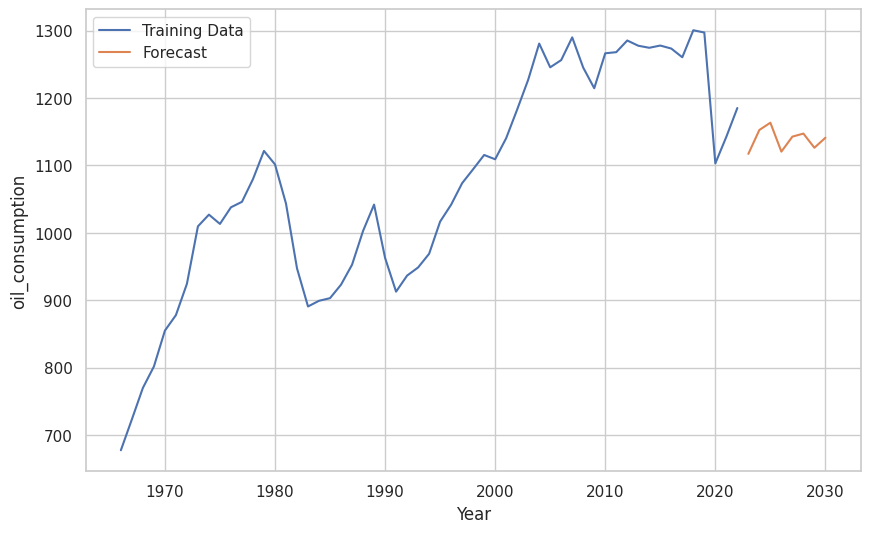

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



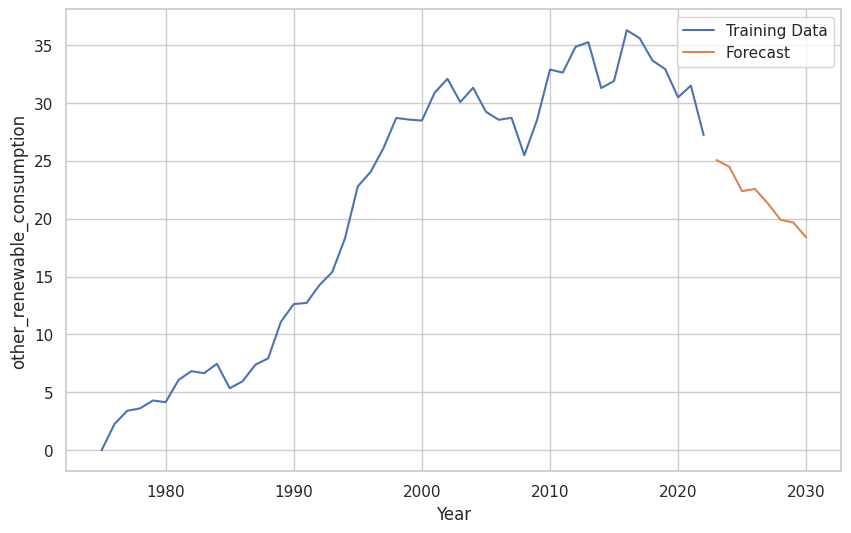

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



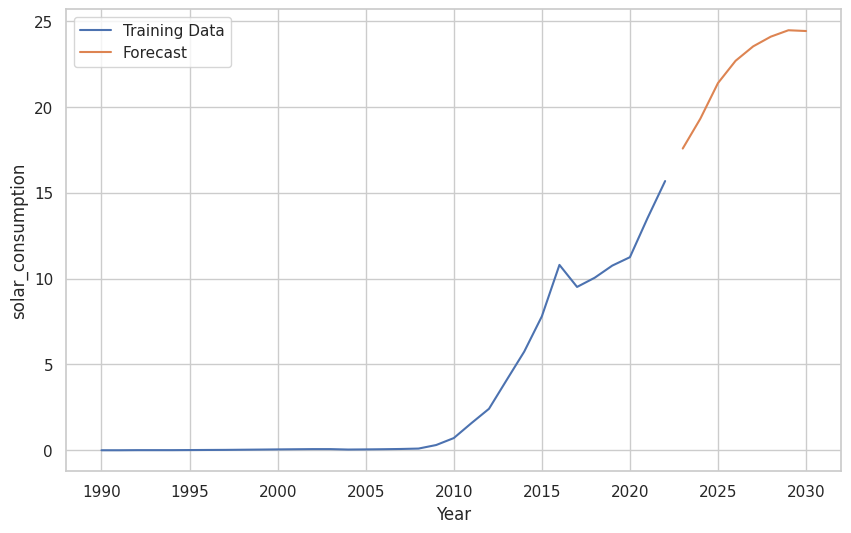

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



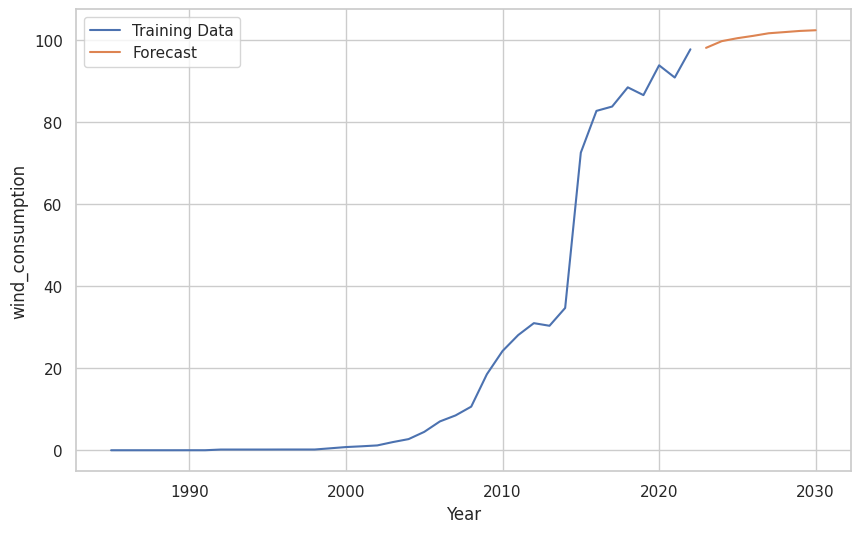

step 3.0
   index Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Canada            23.461491        100.483383      1222.150044   
1   2024  Canada            23.137170         93.700807      1220.430492   
2   2025  Canada            23.304585         85.125138      1243.444208   
3   2026  Canada            23.096857         77.360280      1271.566266   
4   2027  Canada            22.977801         74.120839      1282.744953   
5   2028  Canada            22.881089         70.401765      1290.721478   
6   2029  Canada            22.879602         66.489324      1309.135276   
7   2030  Canada            22.827998         63.736314      1329.086816   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0        1036.741843           209.535894      1117.185720   
1        1034.312352           203.638914      1152.671759   
2        1043.132310           196.724066      1163.450267   
3        1044.452138           189.983878      1120.529455

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



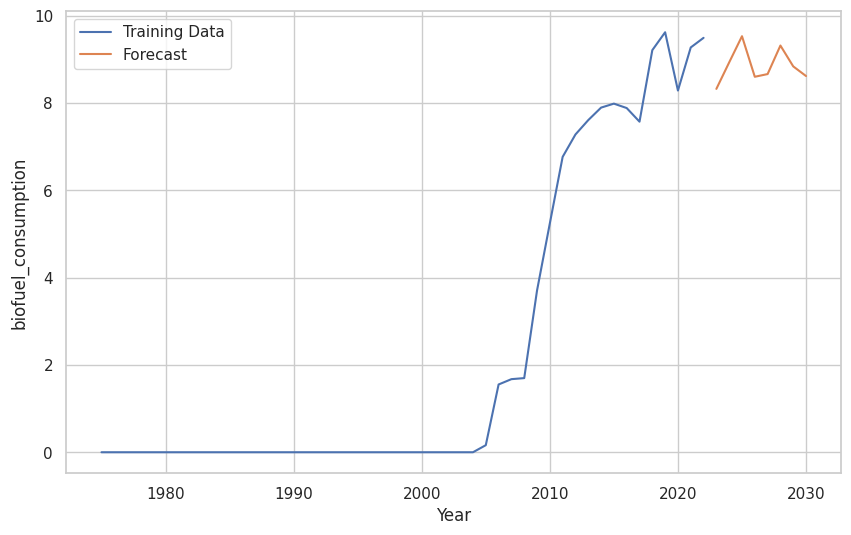

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



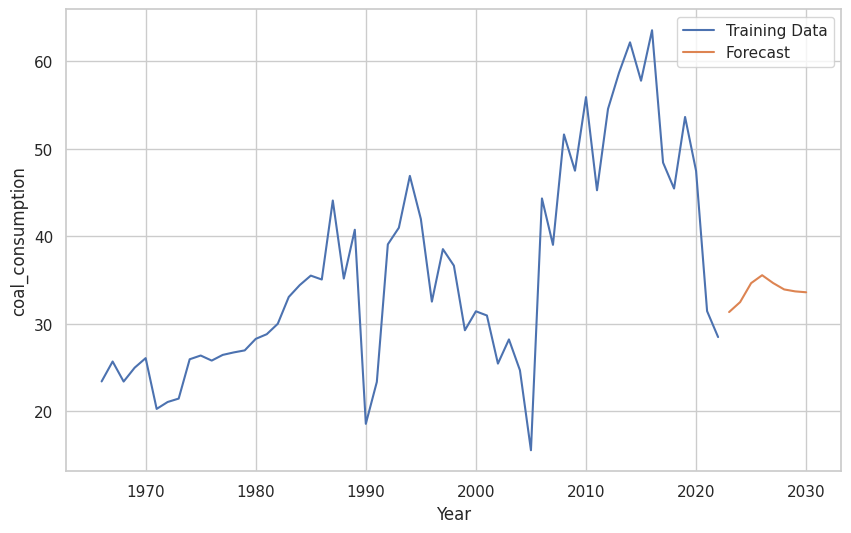

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



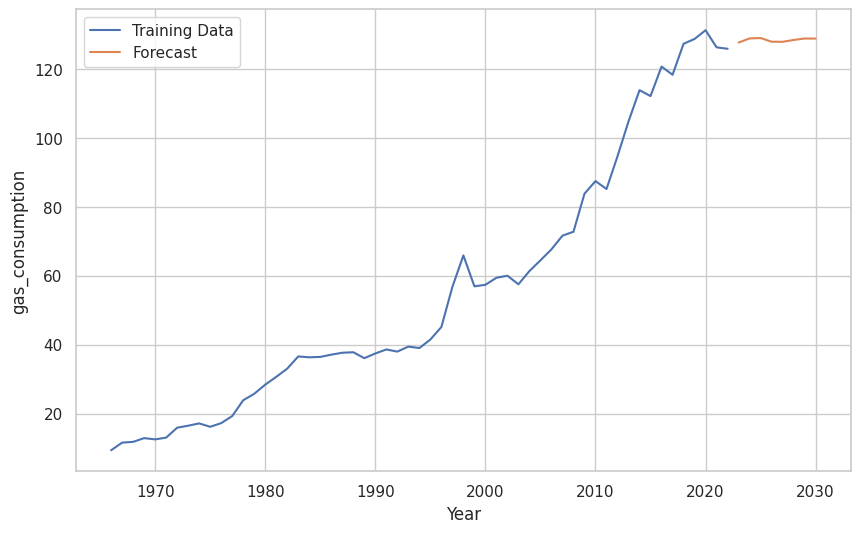

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



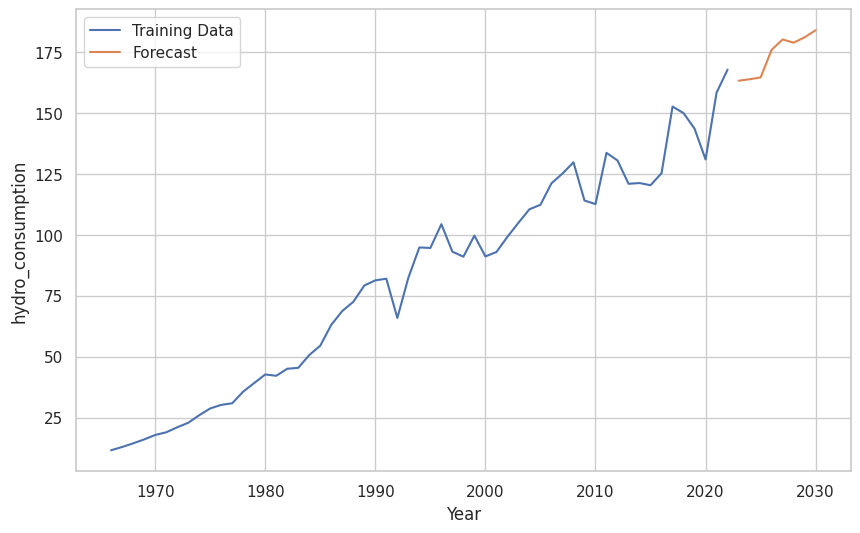

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



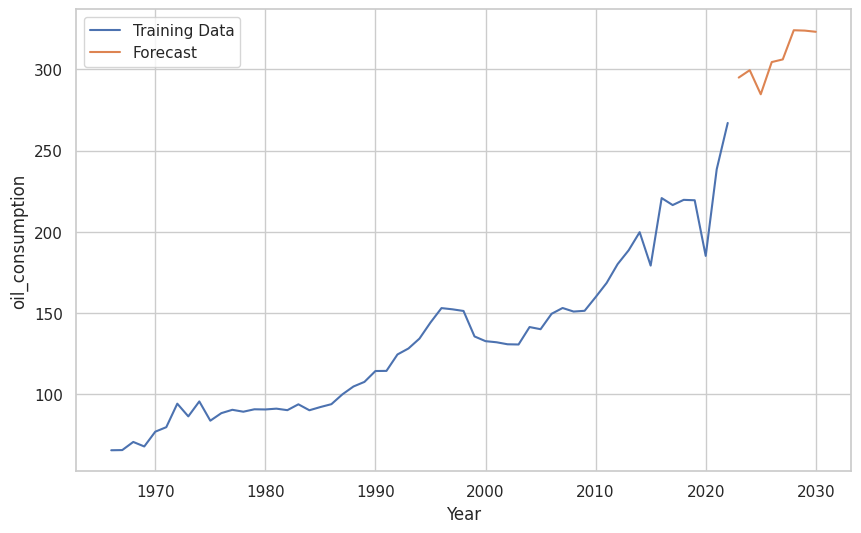

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



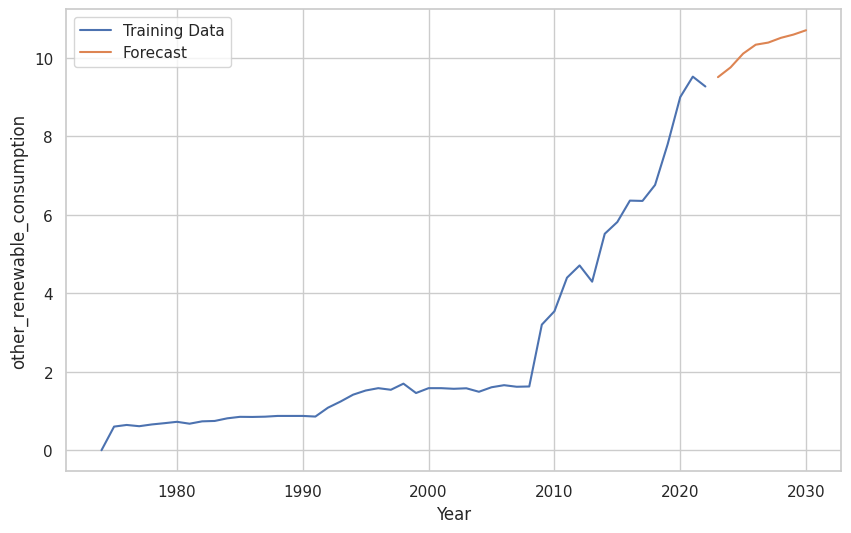

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

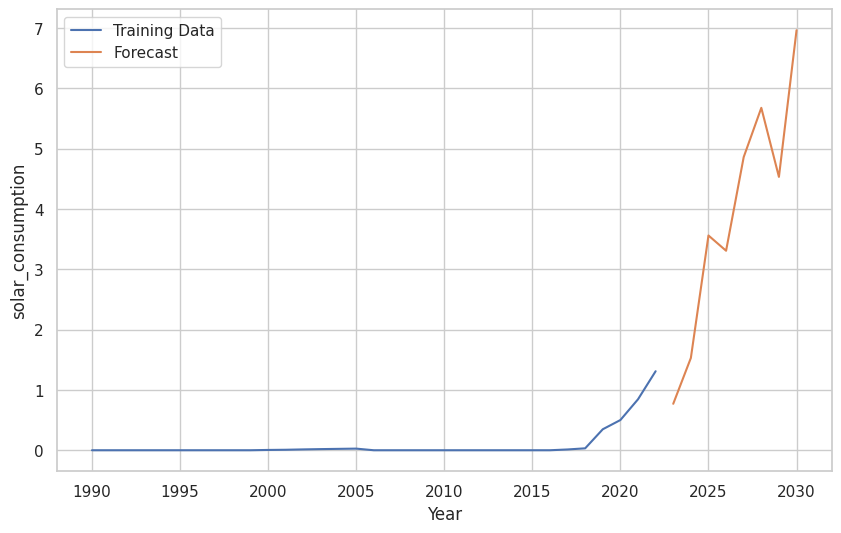

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

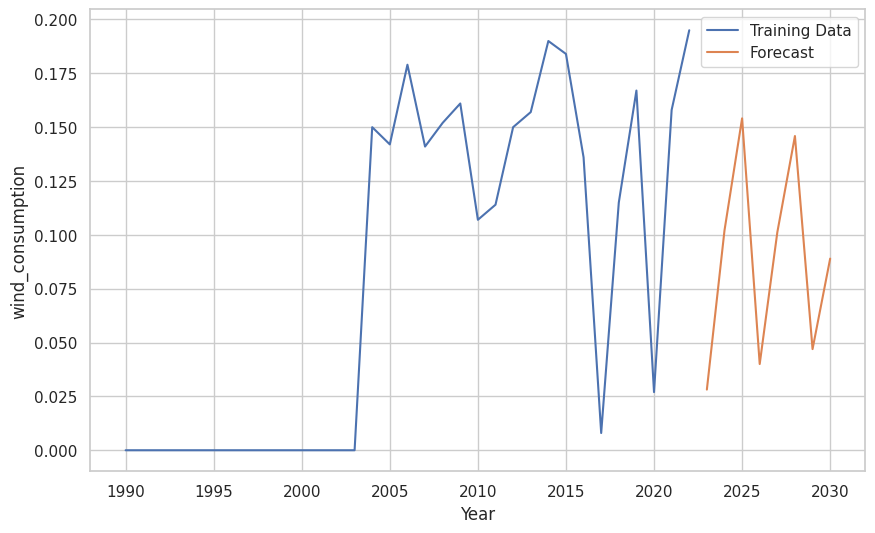

step 3.0
   index   Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Colombia             8.321939         31.349928       127.658272   
1   2024  Colombia             8.928746         32.487570       128.856333   
2   2025  Colombia             9.528372         34.654085       128.959115   
3   2026  Colombia             8.599425         35.559710       127.896607   
4   2027  Colombia             8.661167         34.664255       127.877634   
5   2028  Colombia             9.314814         33.935923       128.409677   
6   2029  Colombia             8.837384         33.713042       128.829147   
7   2030  Colombia             8.616135         33.610146       128.805570   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0         163.176142                    0       294.929008   
1         163.768704                    0       299.484834   
2         164.529439                    0       284.648982   
3         175.849136                    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



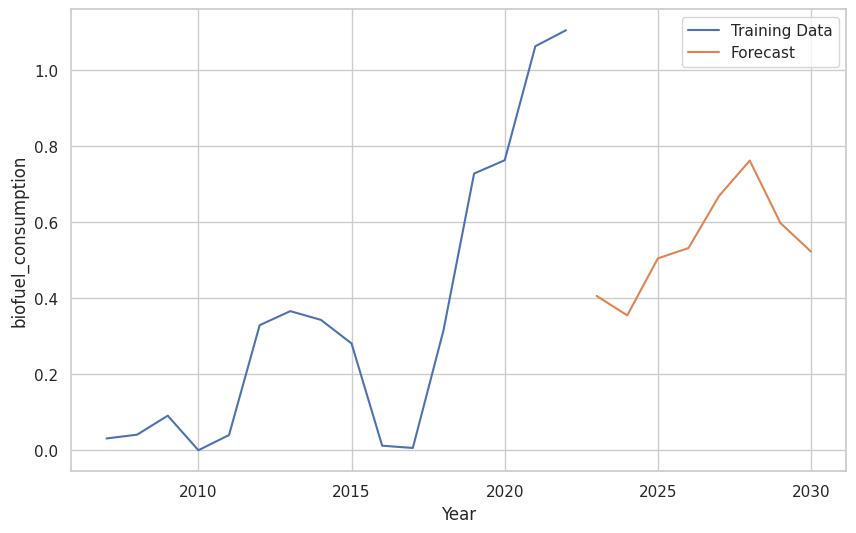

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



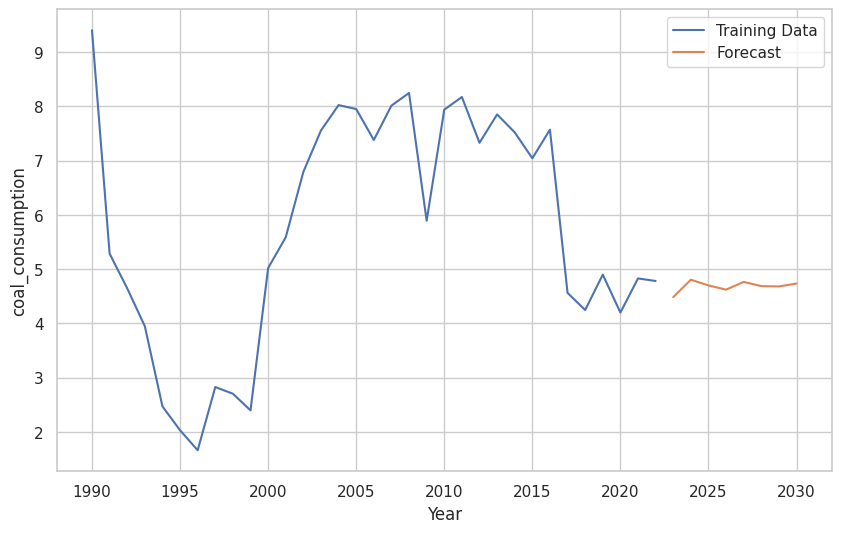

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



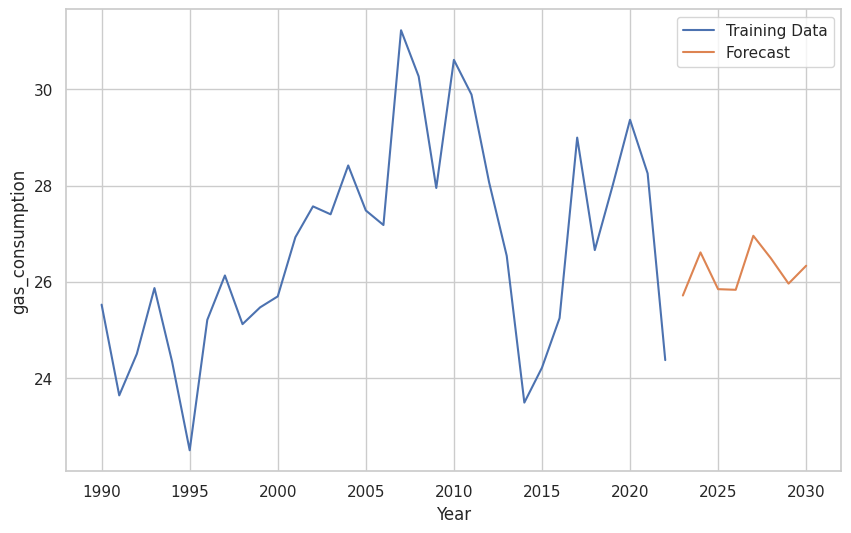

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



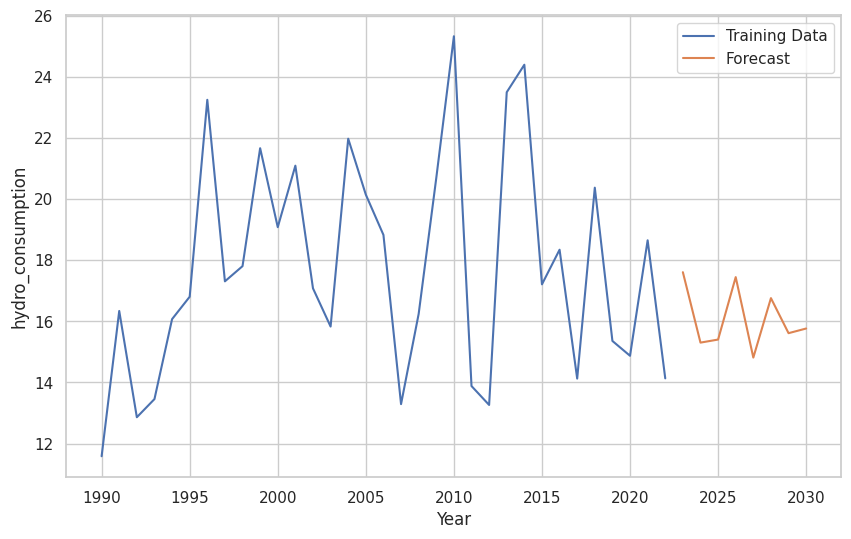

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



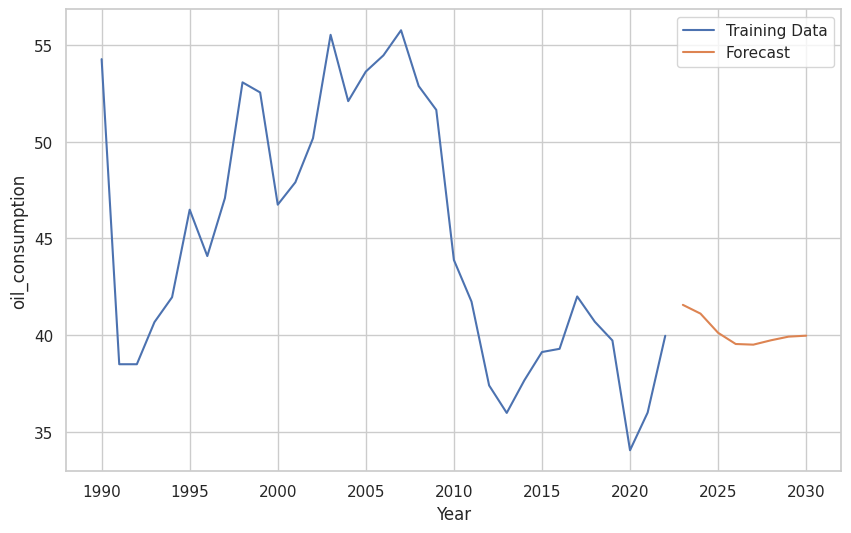

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



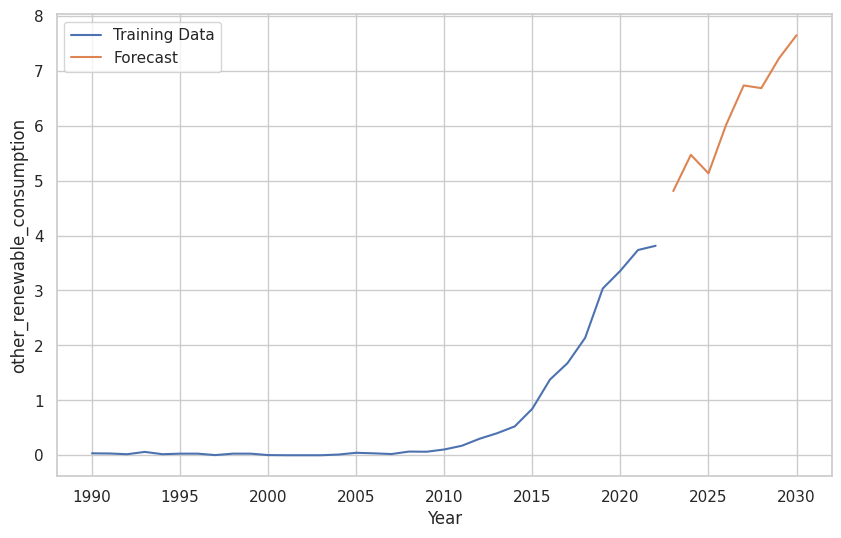

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

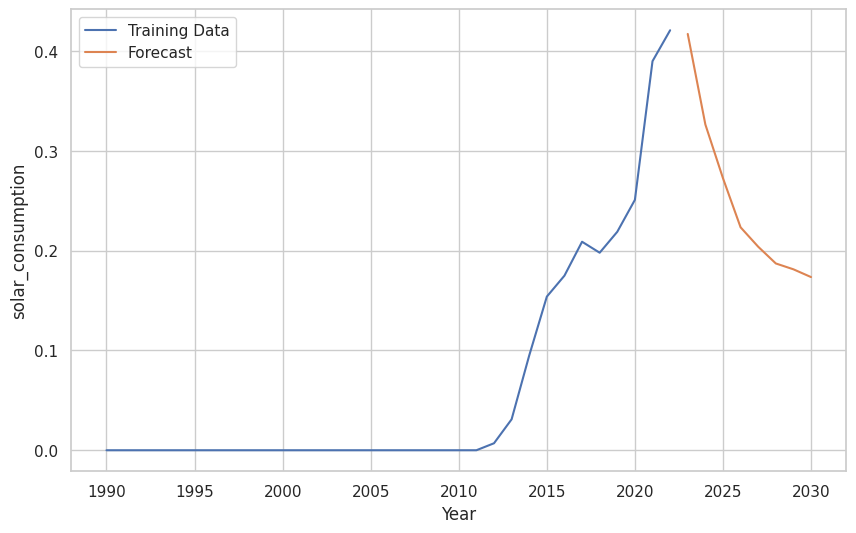

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



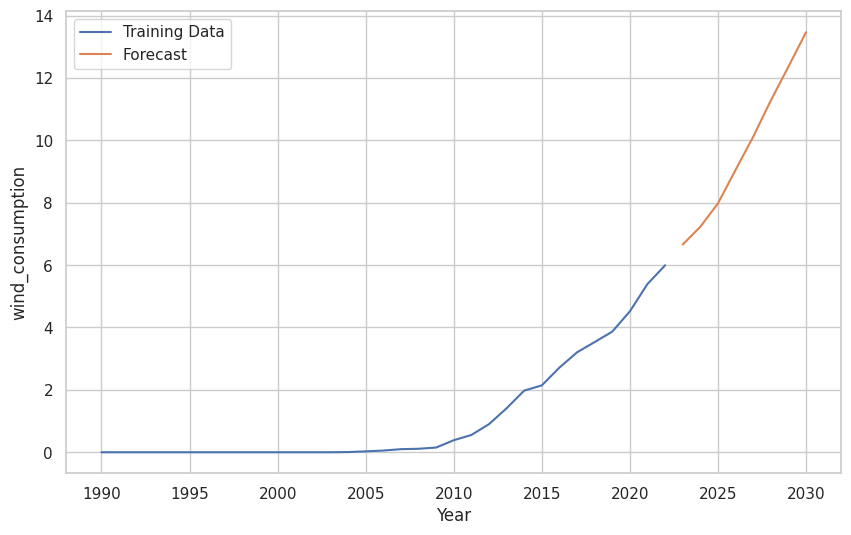

step 3.0
   index  Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Croatia             0.406065          4.486082        25.713266   
1   2024  Croatia             0.354936          4.805831        26.609916   
2   2025  Croatia             0.504779          4.701197        25.844986   
3   2026  Croatia             0.531980          4.623556        25.832125   
4   2027  Croatia             0.669379          4.765507        26.955403   
5   2028  Croatia             0.762071          4.688208        26.485807   
6   2029  Croatia             0.597870          4.682121        25.960565   
7   2030  Croatia             0.522531          4.736606        26.332740   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          17.607739                    0        41.566621   
1          15.302381                    0        41.114105   
2          15.402546                    0        40.121851   
3          17.446472                    0        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



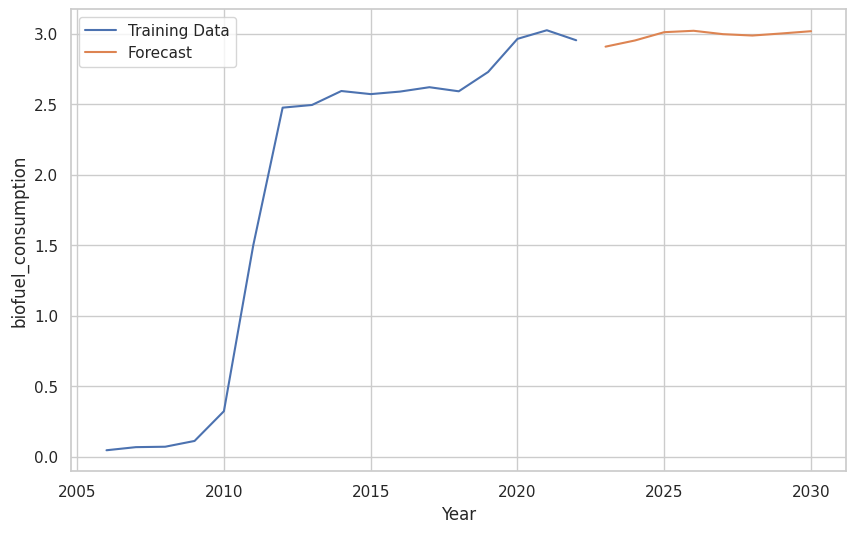

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



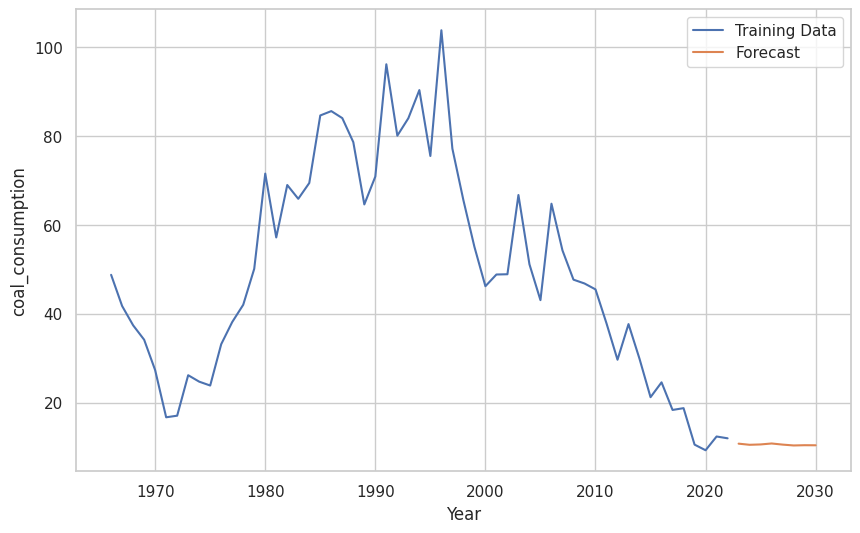

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



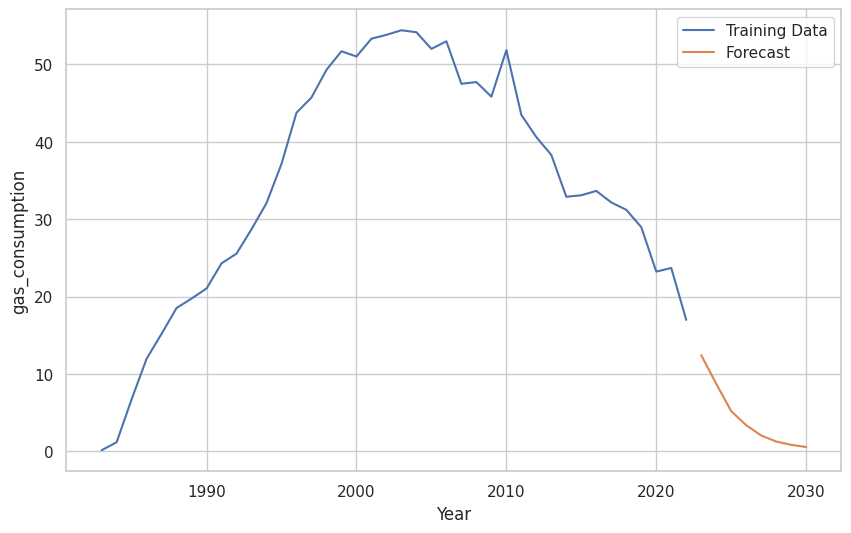

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



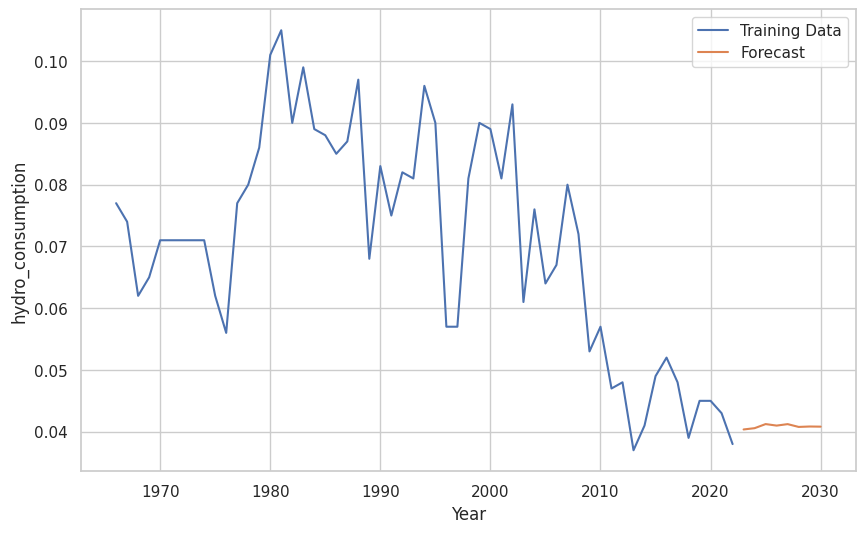

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



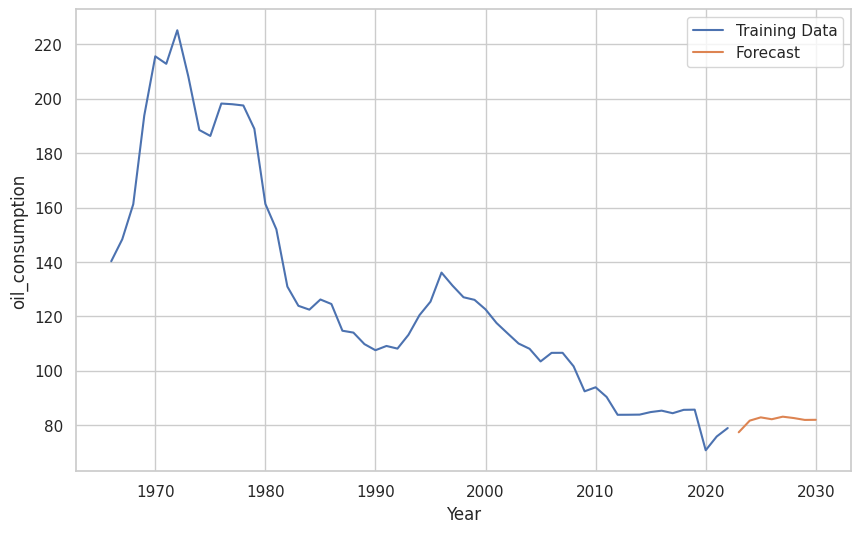

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



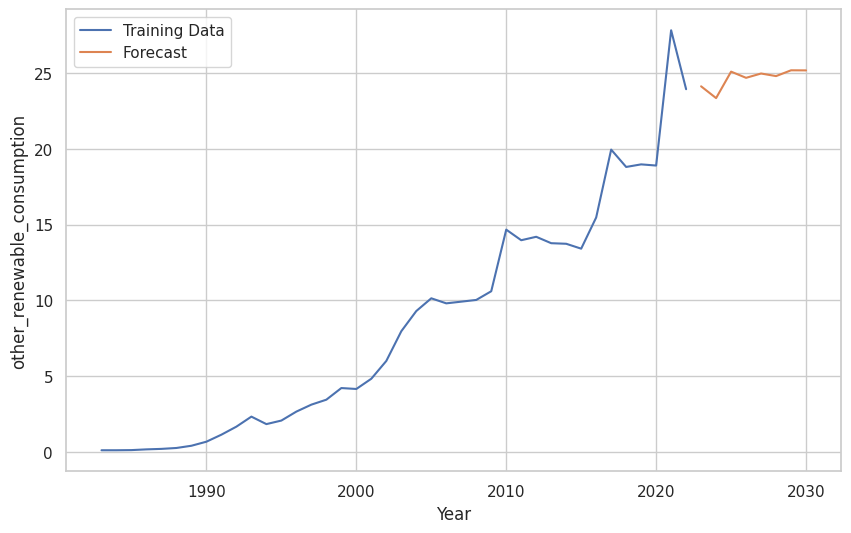

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



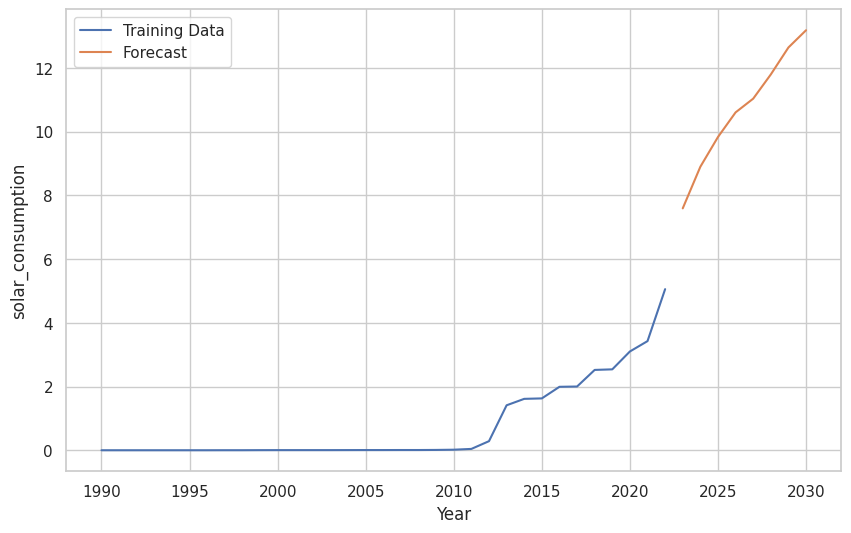

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



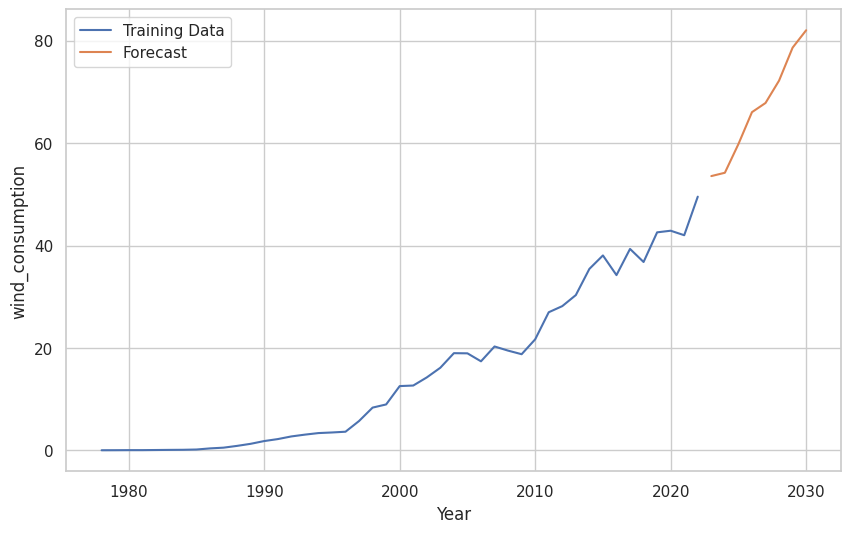

step 3.0
   index  Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Denmark             2.907675         10.791079        12.430791   
1   2024  Denmark             2.951467         10.536017         8.738109   
2   2025  Denmark             3.010326         10.616195         5.197755   
3   2026  Denmark             3.020199         10.831399         3.374318   
4   2027  Denmark             2.996237         10.578565         2.056916   
5   2028  Denmark             2.986511         10.386896         1.272739   
6   2029  Denmark             3.001245         10.443351         0.847136   
7   2030  Denmark             3.017244         10.425974         0.560014   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0           0.040365                    0        77.338730   
1           0.040574                    0        81.624955   
2           0.041237                    0        82.822962   
3           0.040992                    0        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

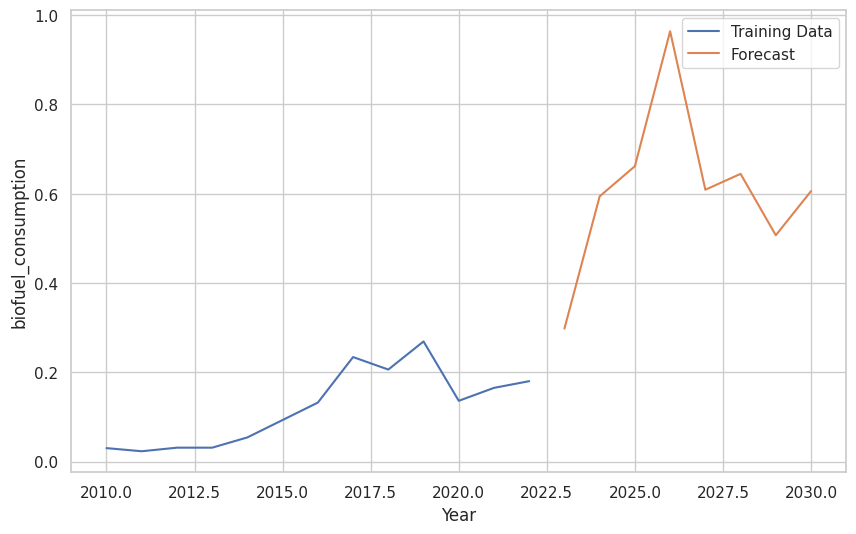

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



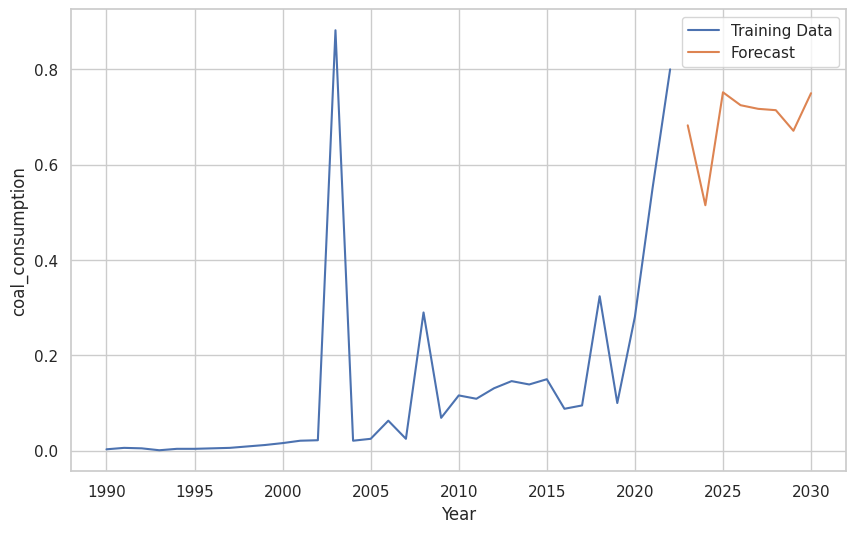

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



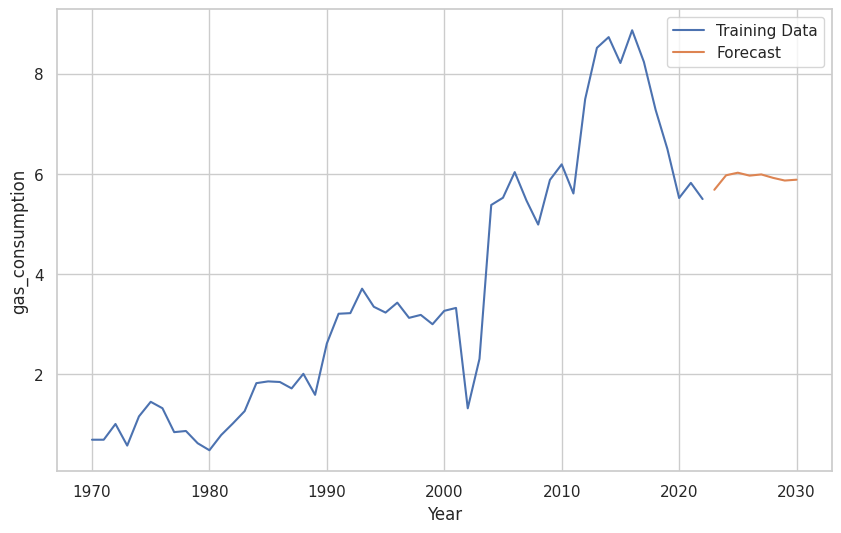

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



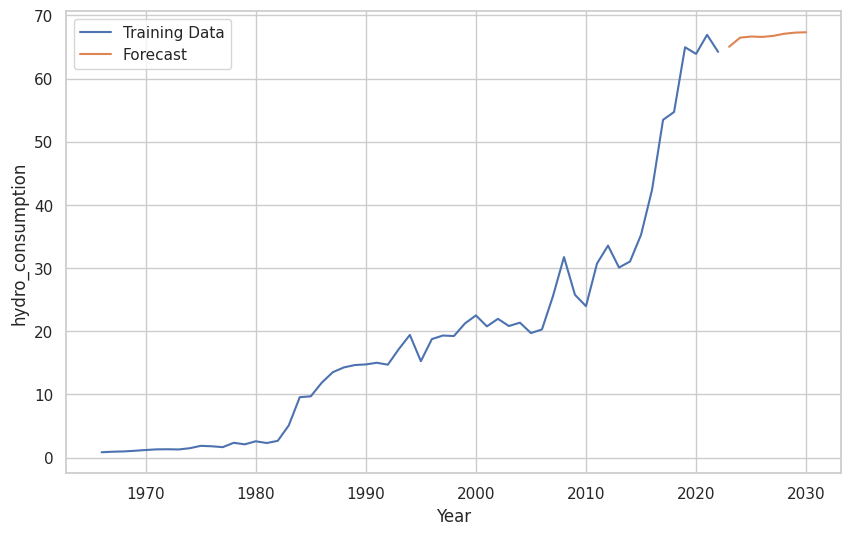

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



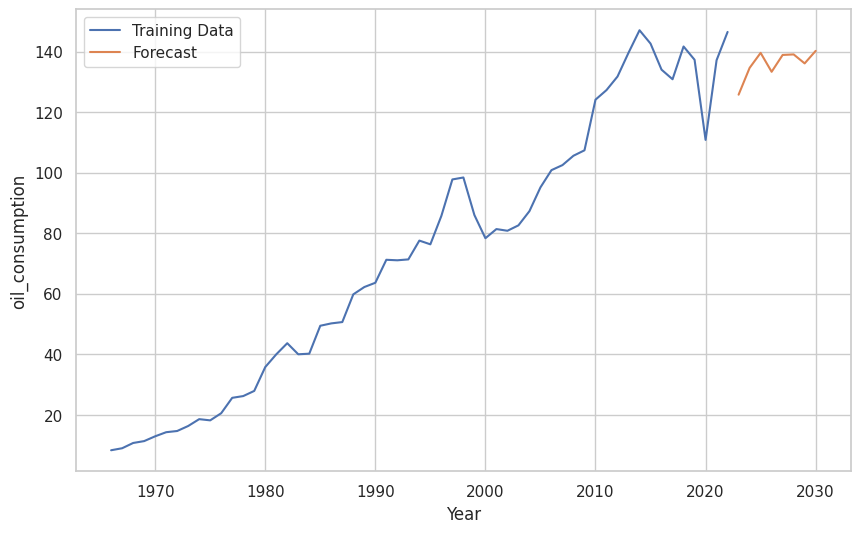

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



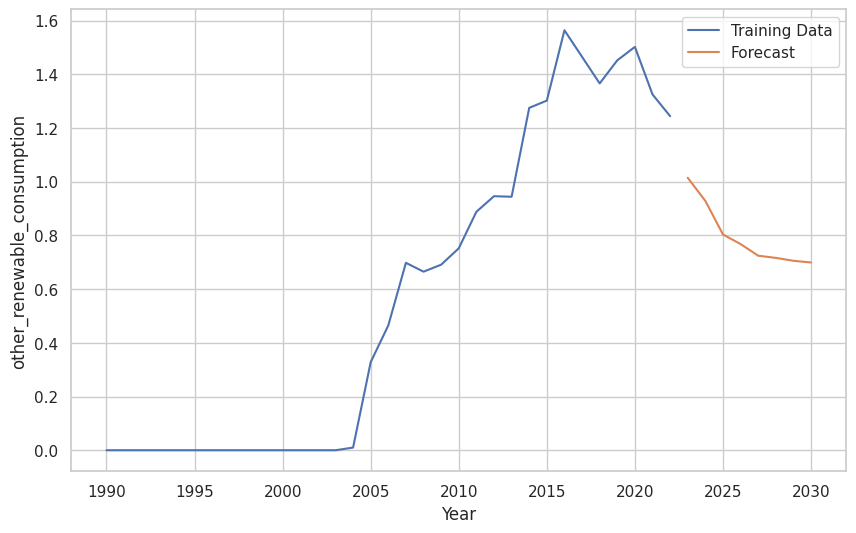

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Pre

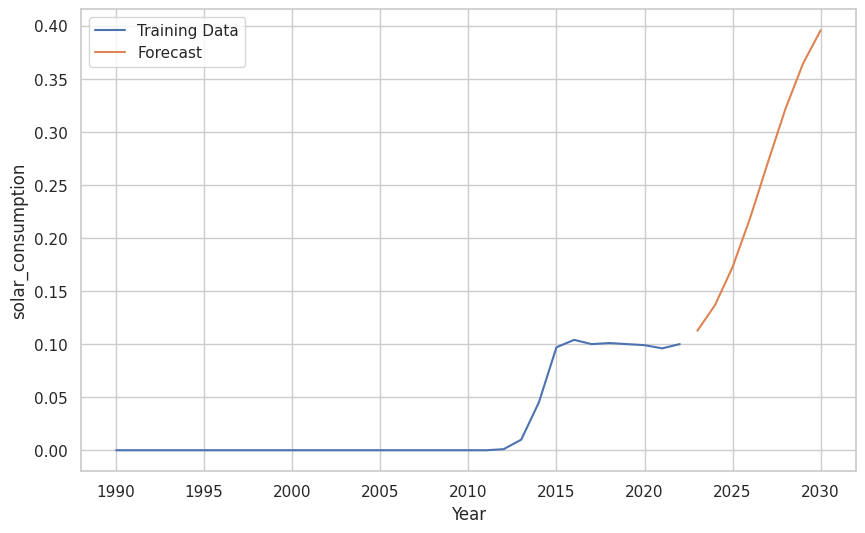

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



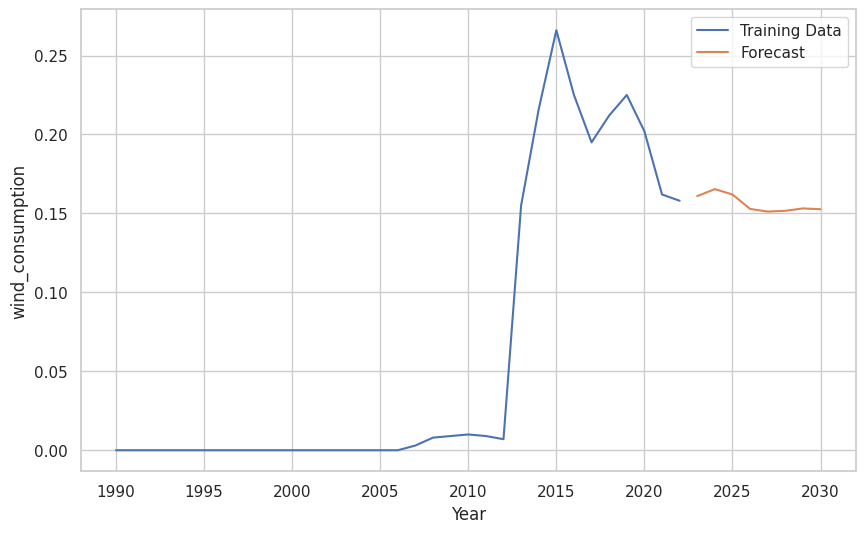

step 3.0
   index  Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Ecuador             0.297828          0.682551         5.681591   
1   2024  Ecuador             0.594078          0.514917         5.971085   
2   2025  Ecuador             0.661586          0.751850         6.022133   
3   2026  Ecuador             0.963891          0.724775         5.964104   
4   2027  Ecuador             0.608852          0.717146         5.987922   
5   2028  Ecuador             0.644418          0.714342         5.919551   
6   2029  Ecuador             0.506868          0.671164         5.866113   
7   2030  Ecuador             0.605757          0.749961         5.883022   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          65.034095                    0       125.775778   
1          66.474489                    0       134.629704   
2          66.651335                    0       139.597335   
3          66.587430                    0       1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



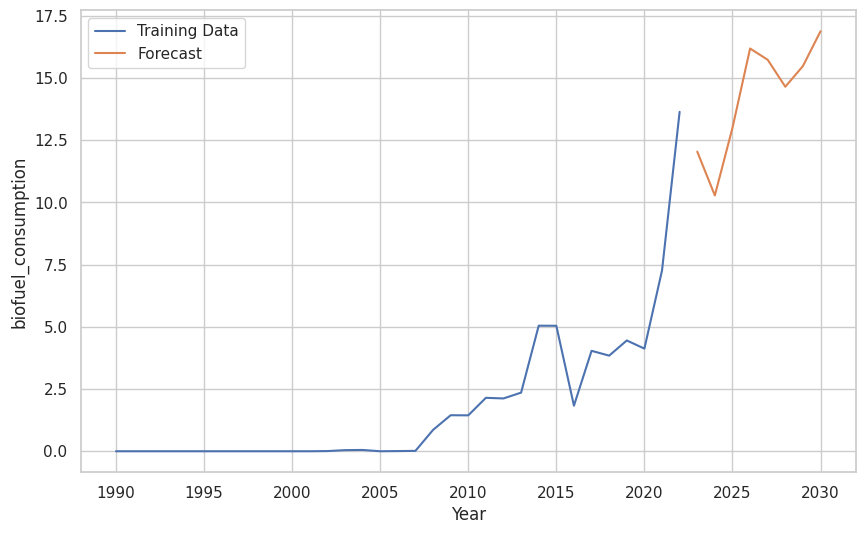

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



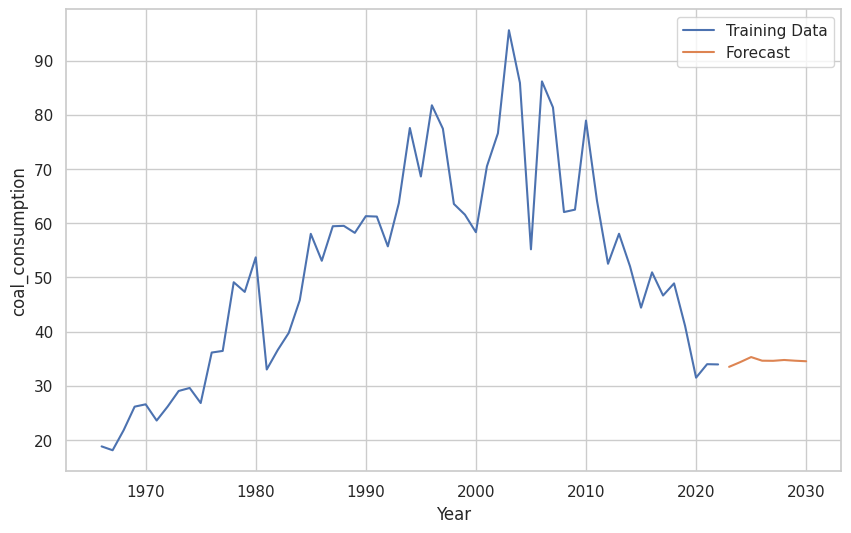

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



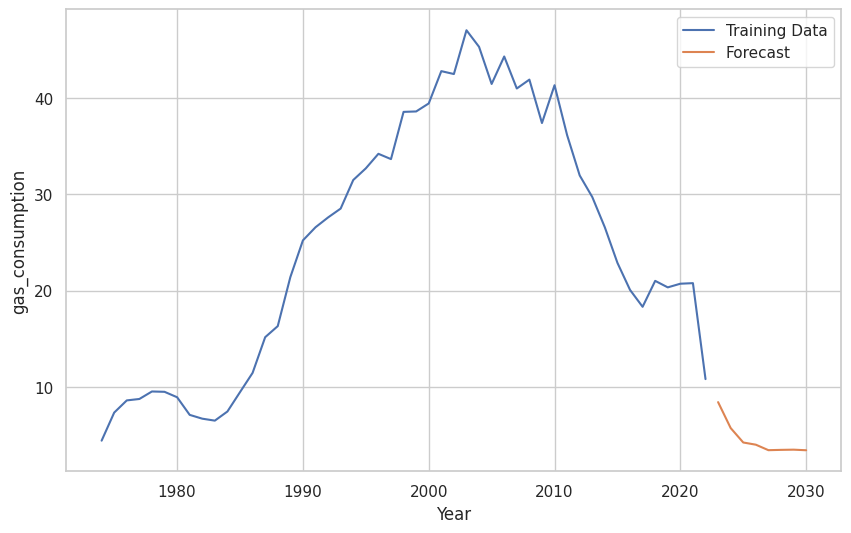

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



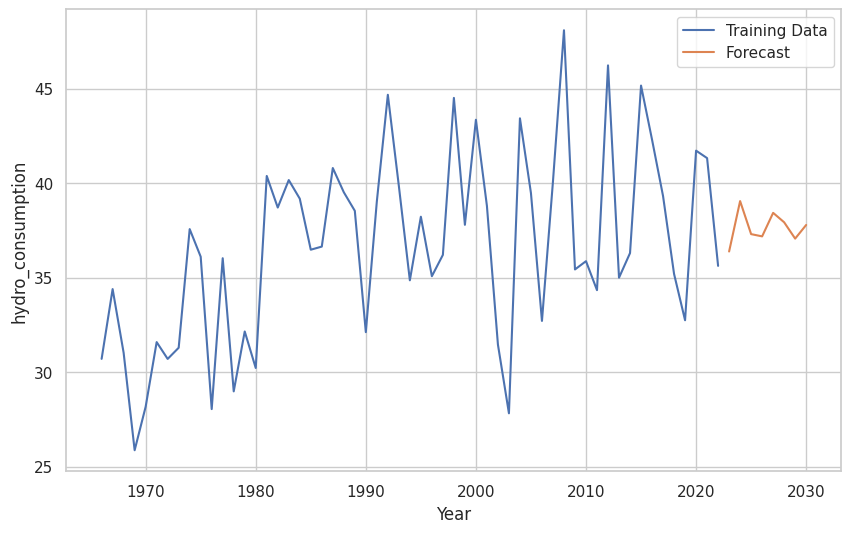

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



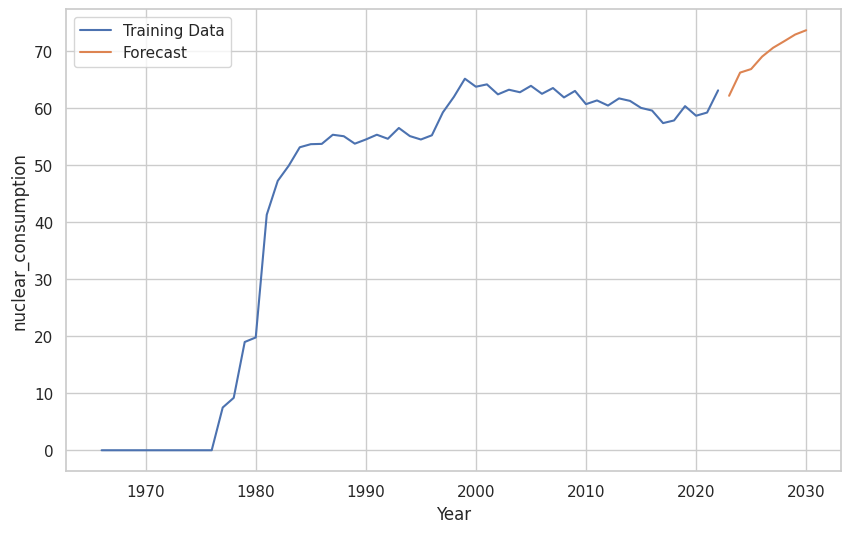

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



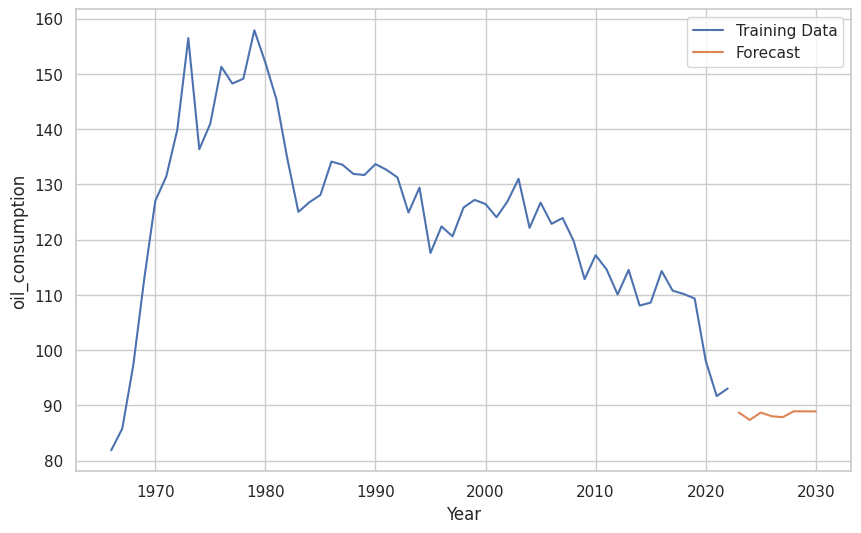

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



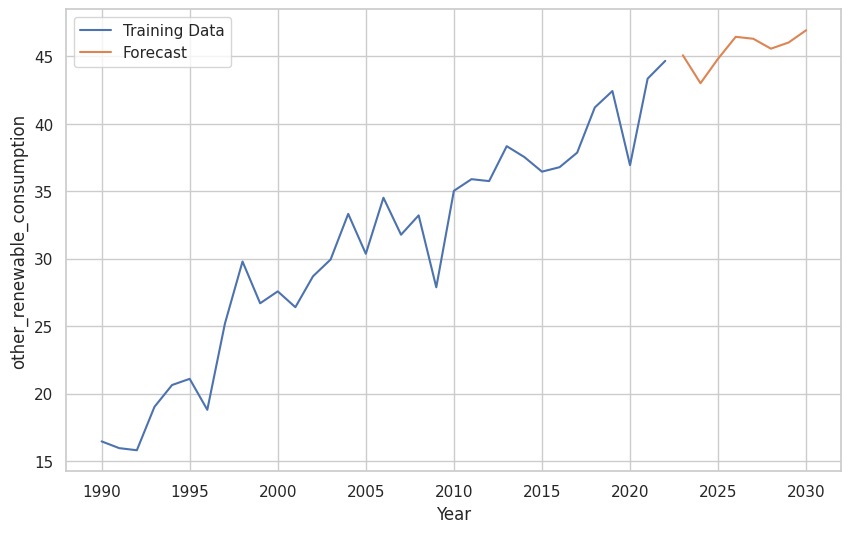

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



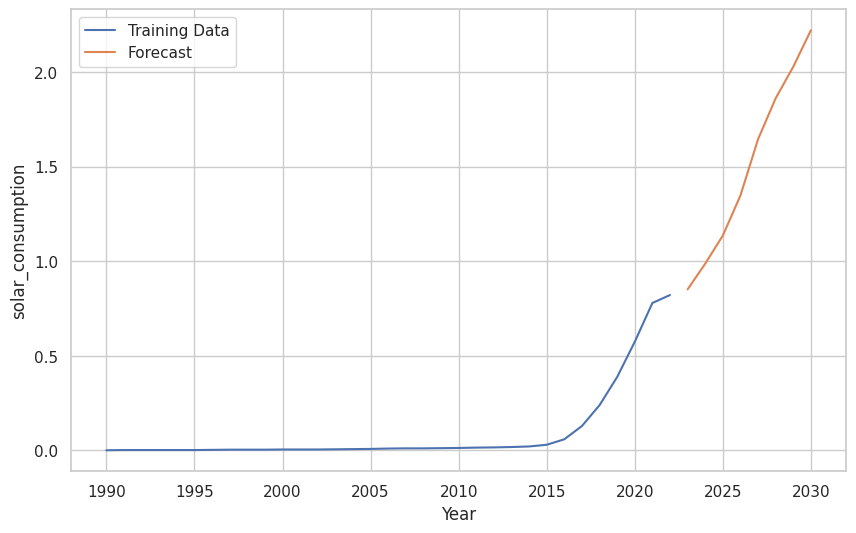

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



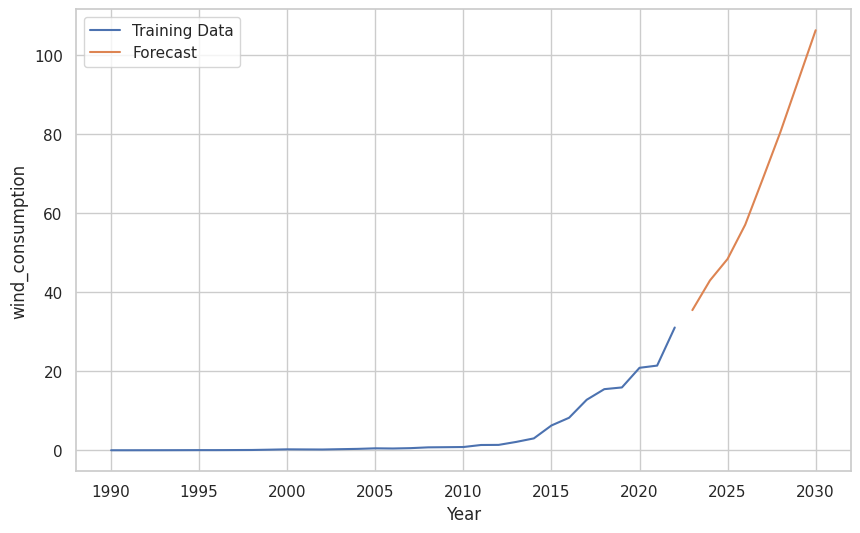

step 3.0
   index  Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Finland            12.040476         33.483410         8.438875   
1   2024  Finland            10.278845         34.346382         5.749912   
2   2025  Finland            12.995609         35.285902         4.253504   
3   2026  Finland            16.183947         34.616264         4.025217   
4   2027  Finland            15.731099         34.593914         3.456109   
5   2028  Finland            14.647772         34.748309         3.488739   
6   2029  Finland            15.478401         34.613887         3.509630   
7   2030  Finland            16.877381         34.514318         3.449240   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          36.377980            62.198032        88.713217   
1          39.045474            66.263856        87.348725   
2          37.297166            66.883734        88.689429   
3          37.178066            69.073578        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



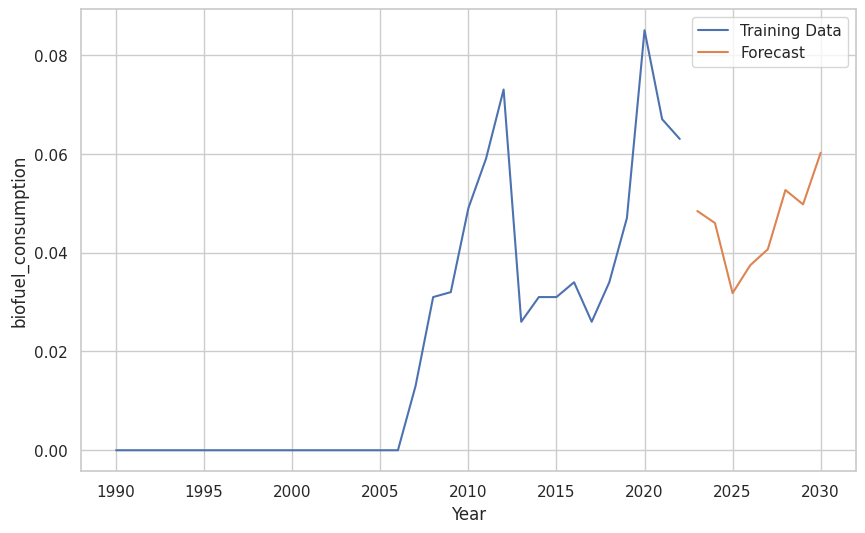

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



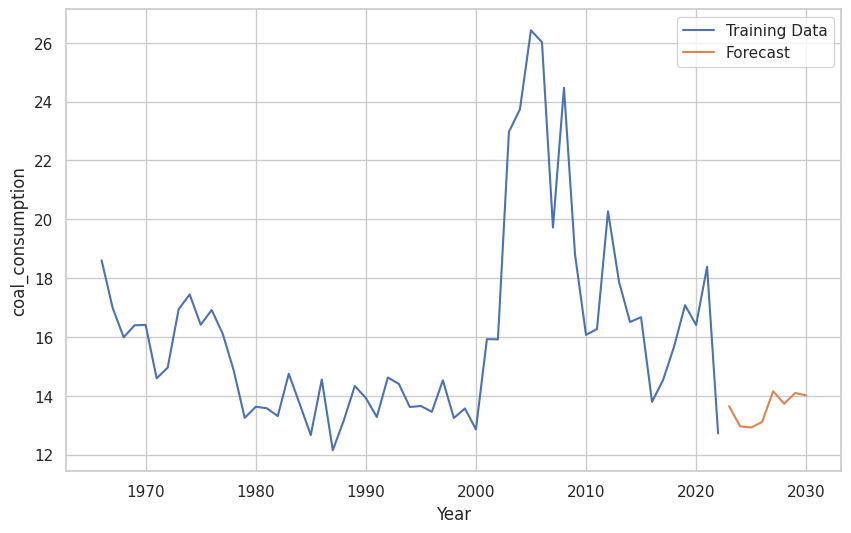

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



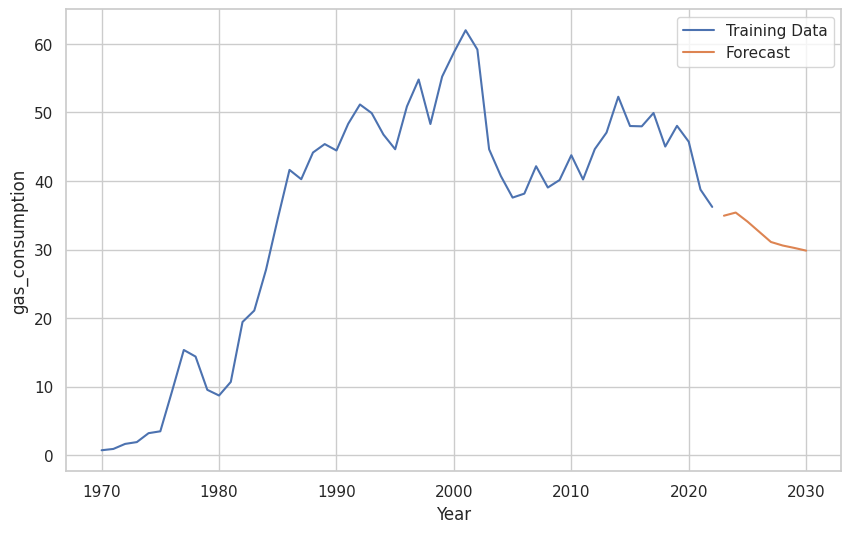

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



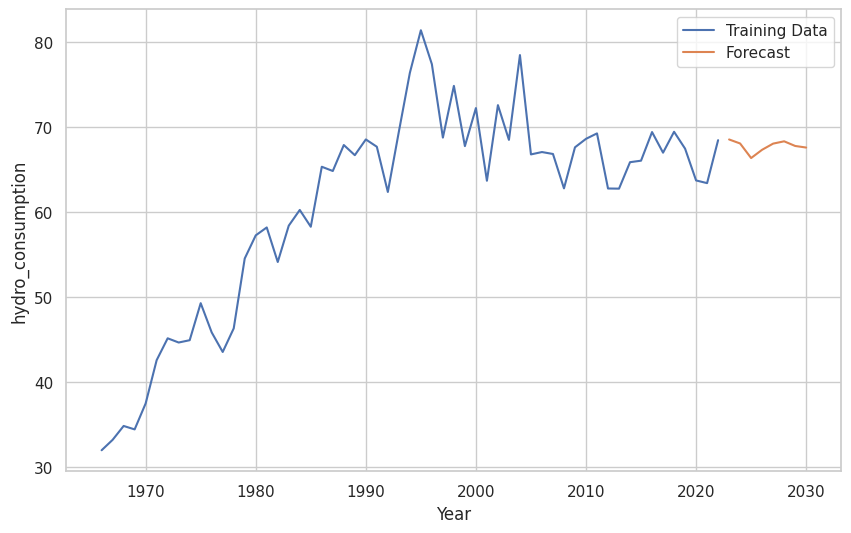

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



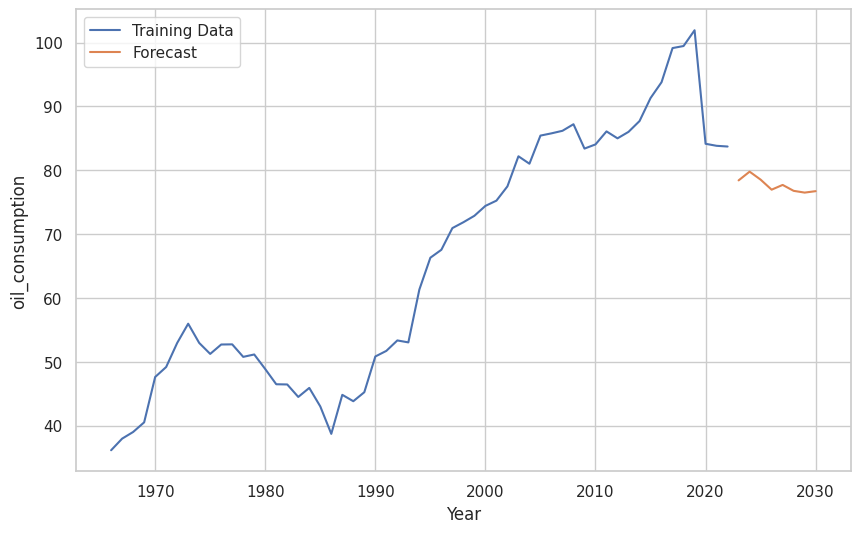

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



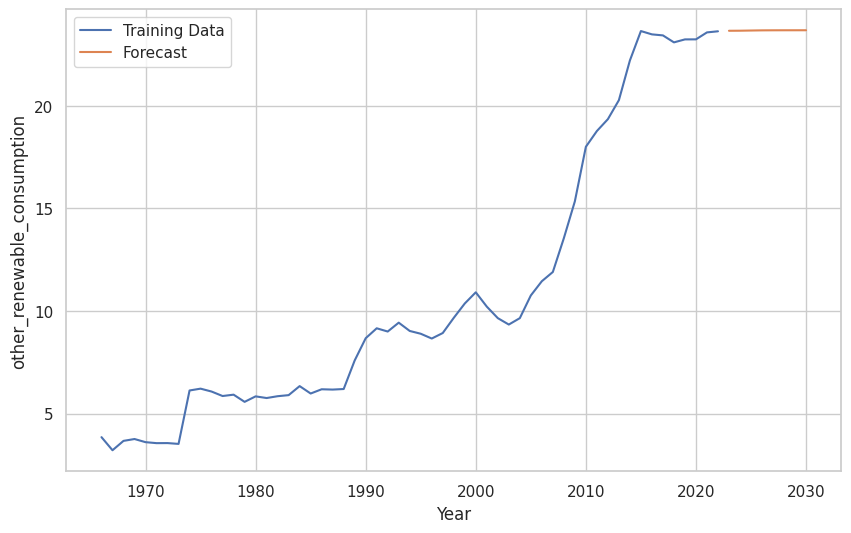

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



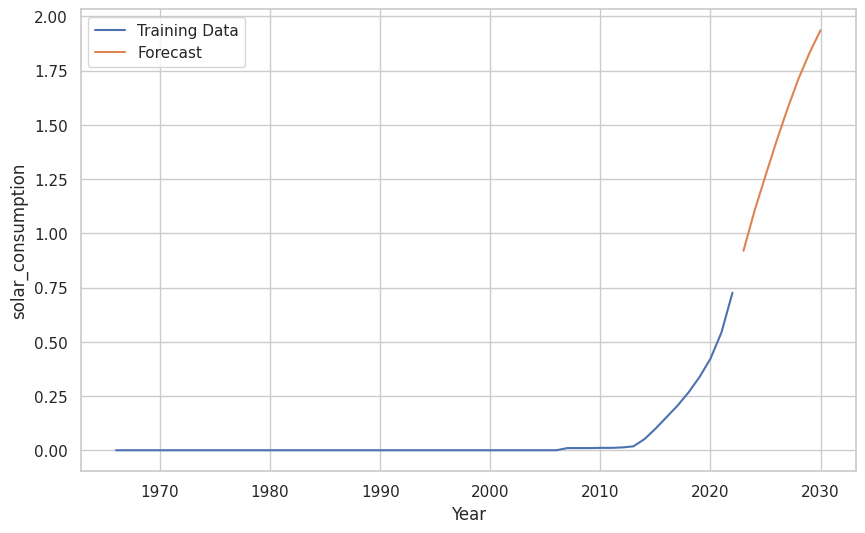

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



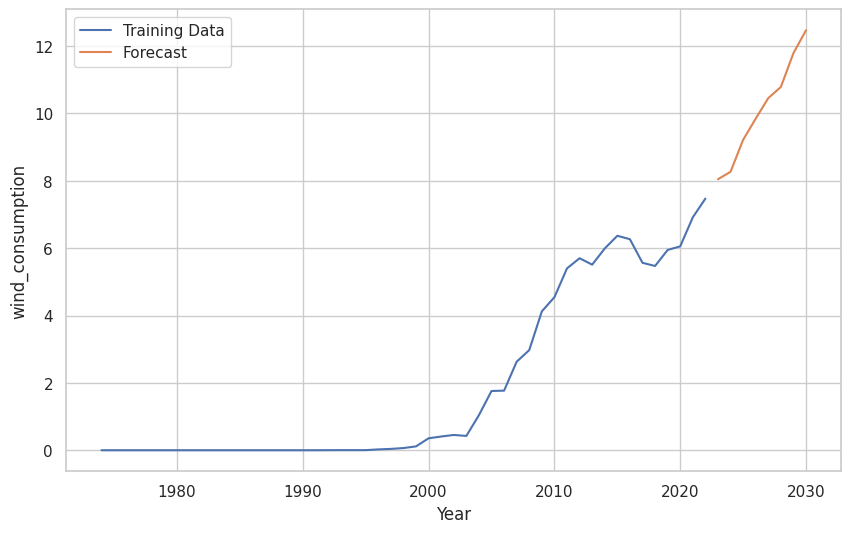

step 3.0
   index      Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  New Zealand             0.048415         13.647399        34.933187   
1   2024  New Zealand             0.045981         12.963907        35.392902   
2   2025  New Zealand             0.031802         12.923693        34.078173   
3   2026  New Zealand             0.037434         13.111120        32.587296   
4   2027  New Zealand             0.040679         14.156653        31.098215   
5   2028  New Zealand             0.052665         13.732353        30.583646   
6   2029  New Zealand             0.049759         14.094958        30.227455   
7   2030  New Zealand             0.060197         14.015334        29.837079   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          68.556664                    0        78.419807   
1          68.083817                    0        79.789231   
2          66.368433                    0        78.536766   
3          67

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



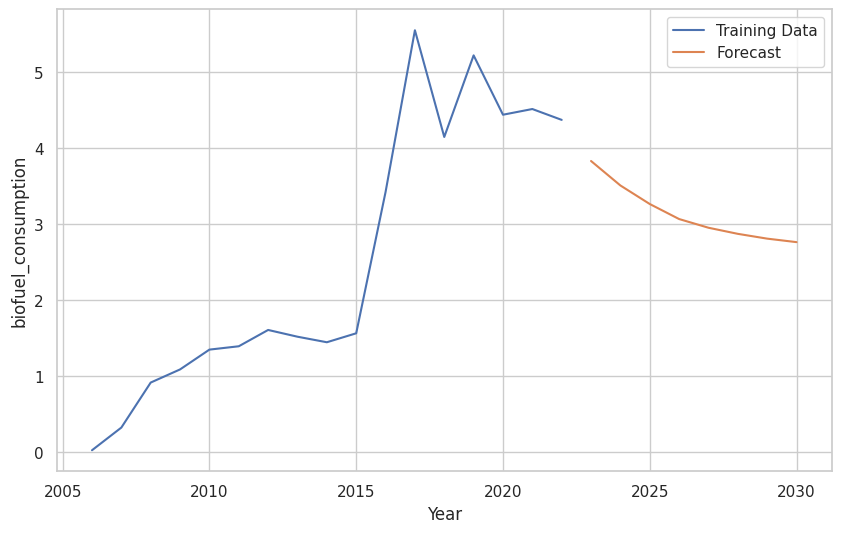

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



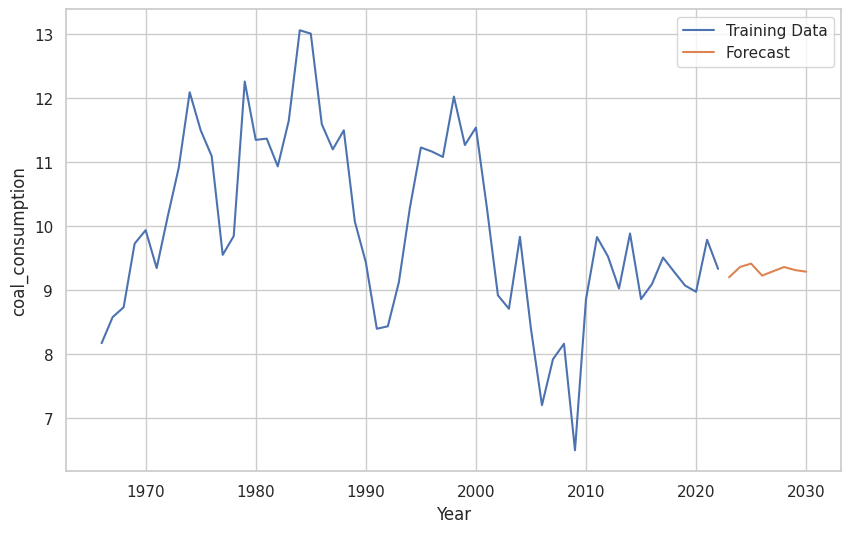

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is

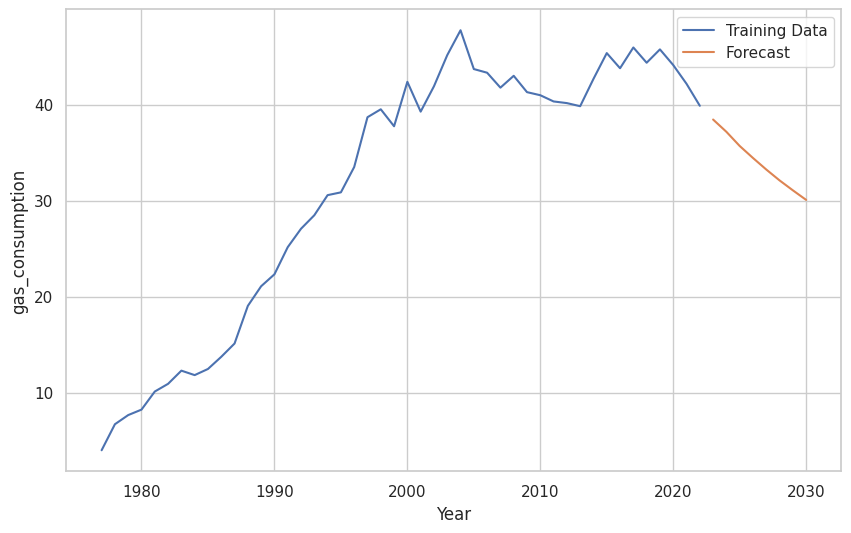

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



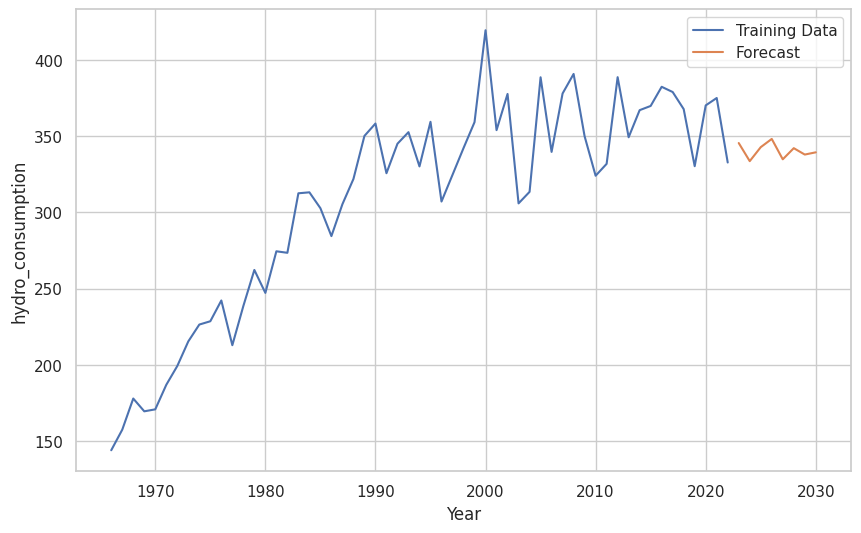

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



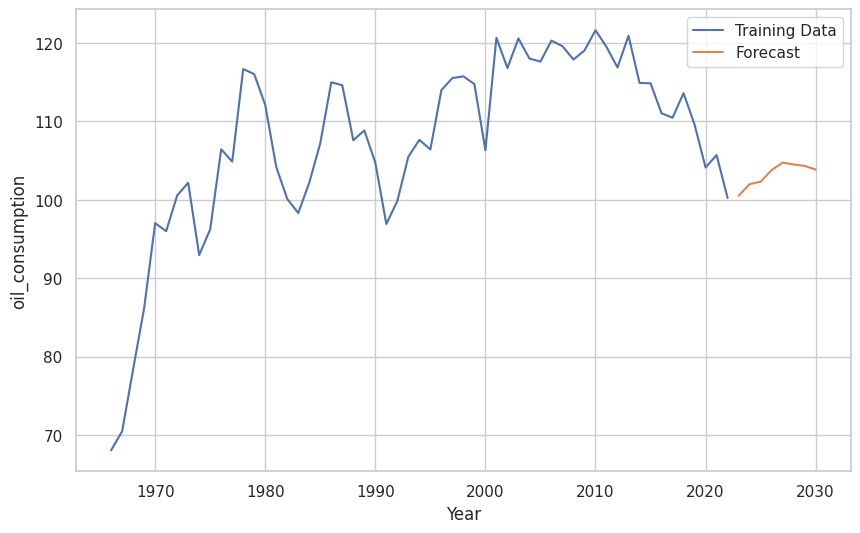

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



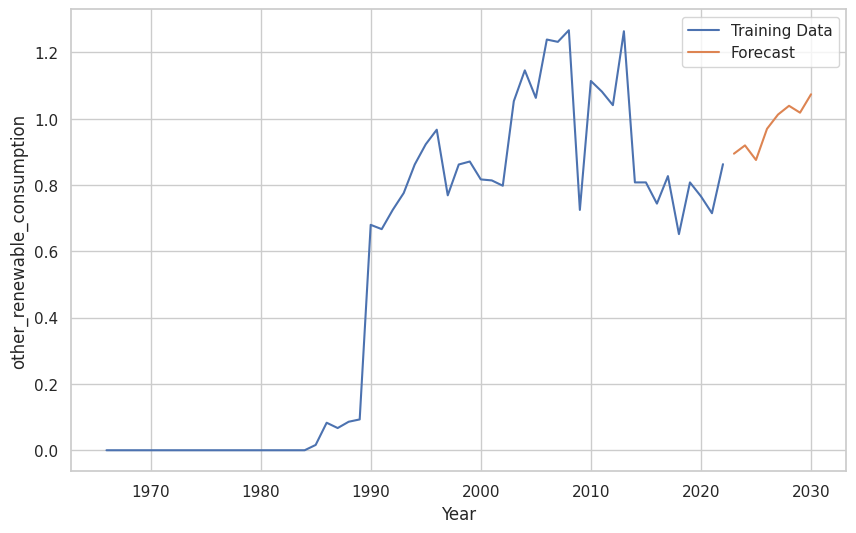

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

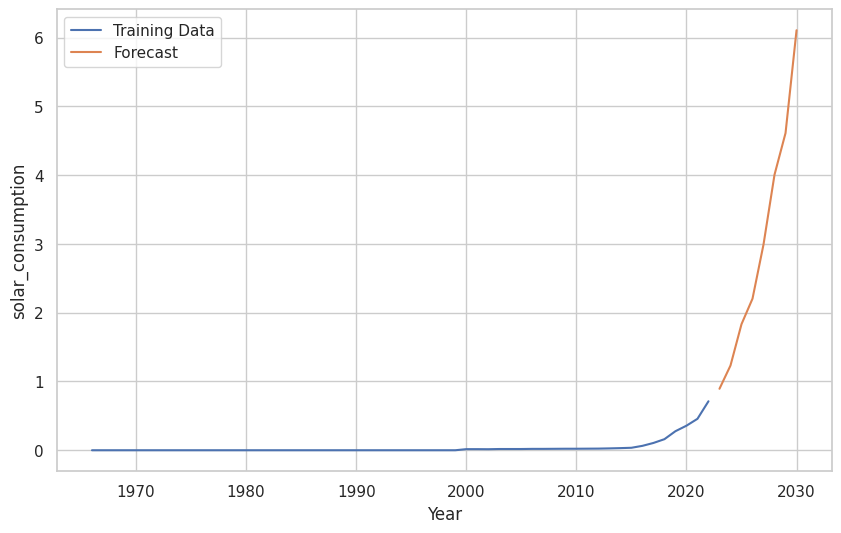

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



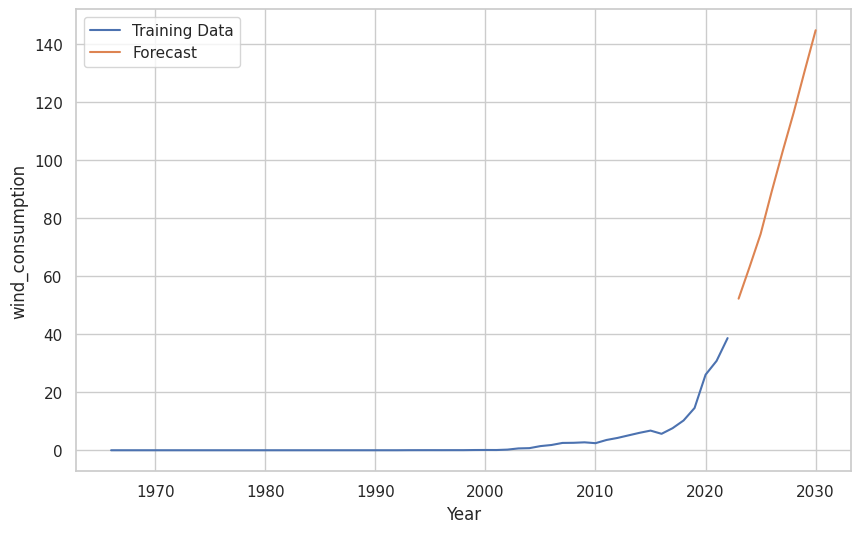

step 3.0
   index Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Norway             3.832109          9.205040        38.439844   
1   2024  Norway             3.509723          9.365975        37.160100   
2   2025  Norway             3.265453          9.417620        35.685260   
3   2026  Norway             3.067384          9.230579        34.433560   
4   2027  Norway             2.952832          9.298819        33.231408   
5   2028  Norway             2.872400          9.364732        32.098213   
6   2029  Norway             2.809193          9.316421        31.064313   
7   2030  Norway             2.763183          9.291769        30.067396   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0         345.456230                    0       100.507791   
1         333.585367                    0       101.999412   
2         342.746717                    0       102.301247   
3         348.142989                    0       103.787374

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



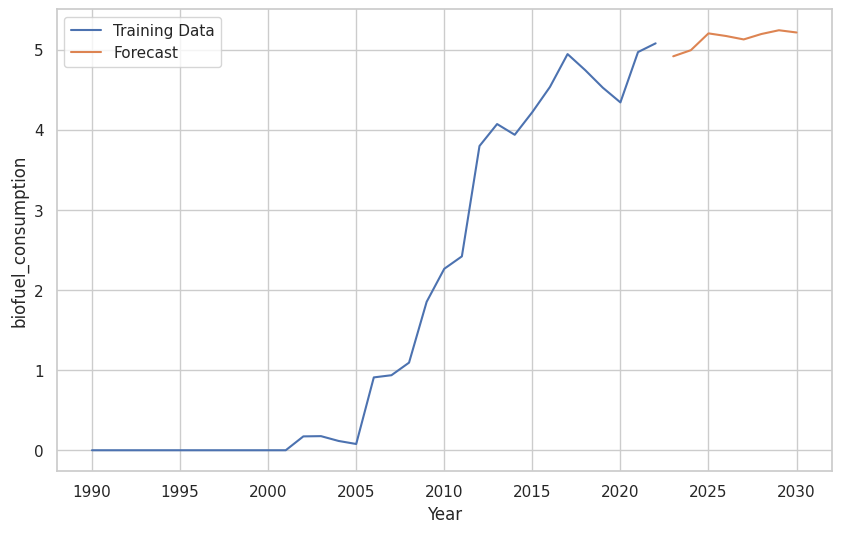

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



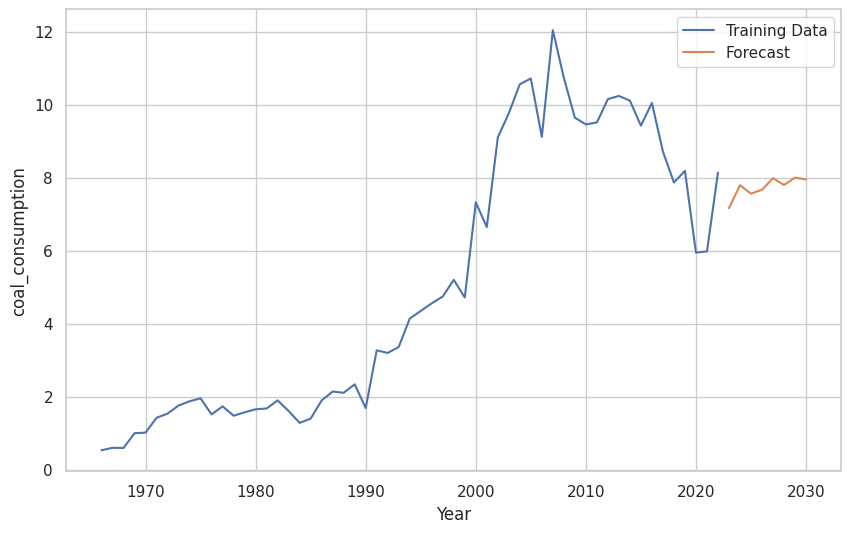

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



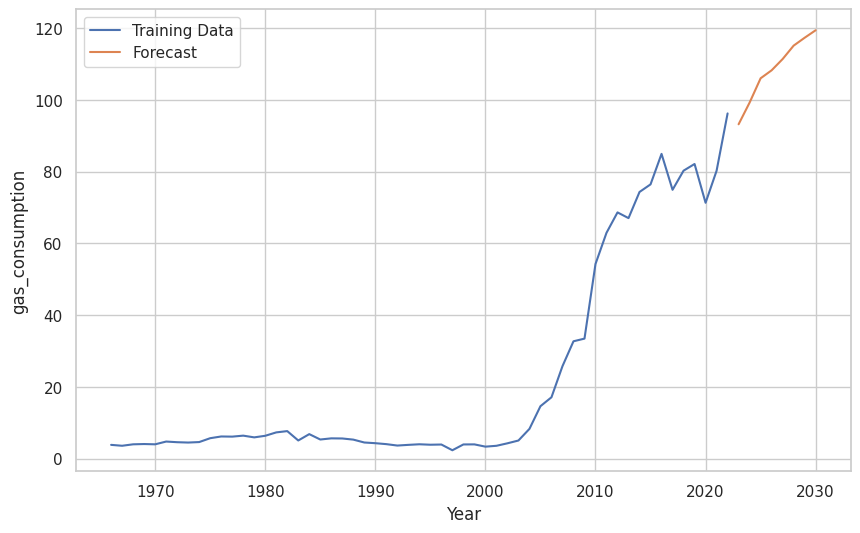

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



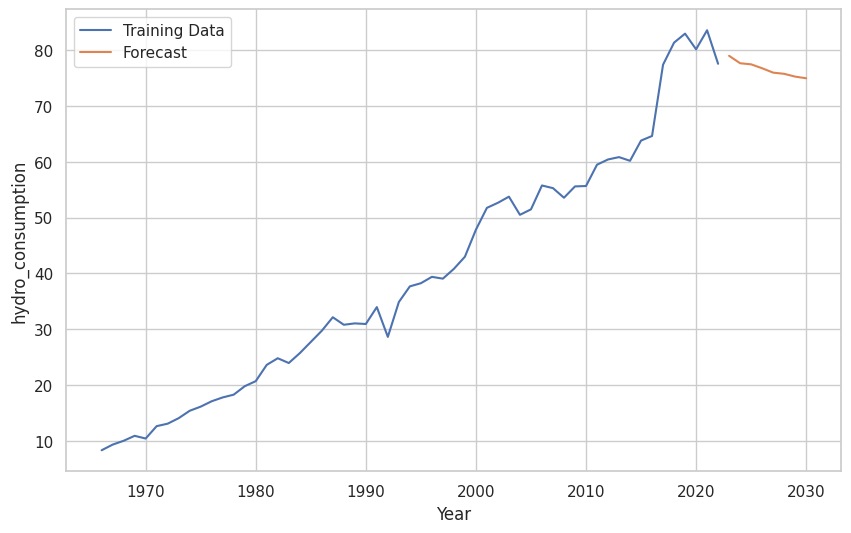

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



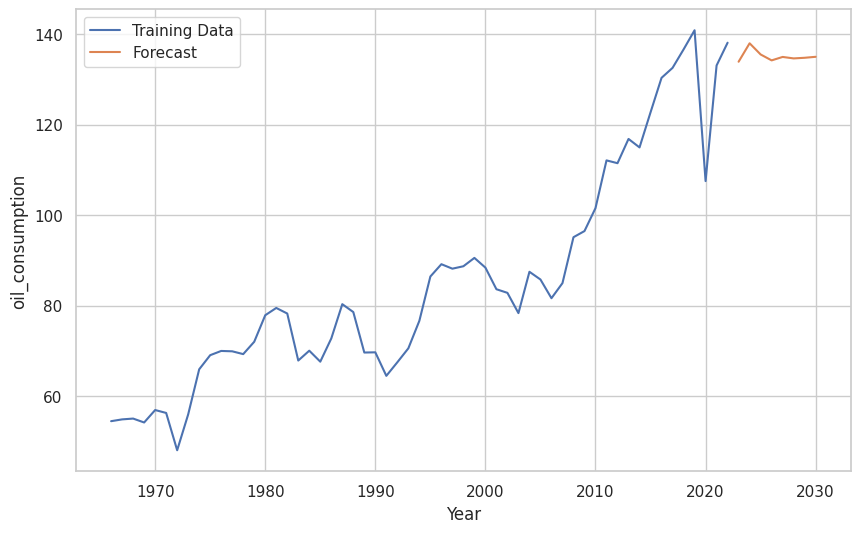

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



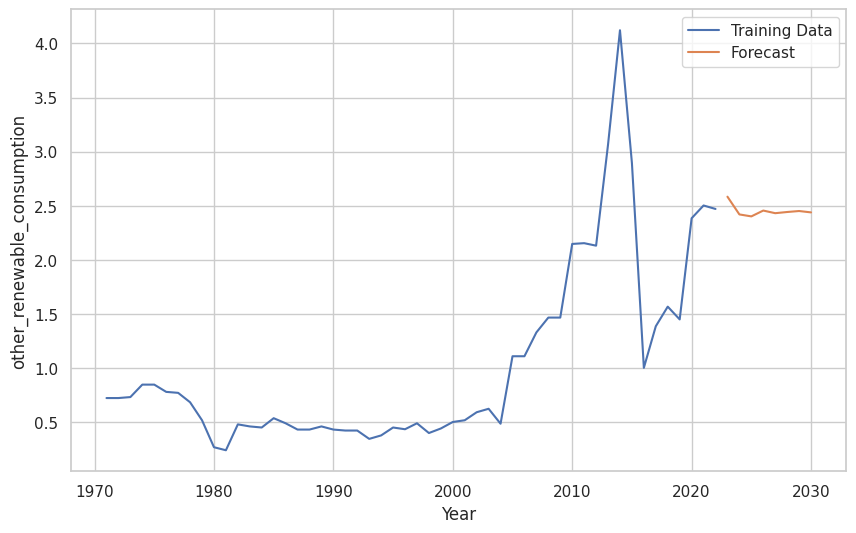

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



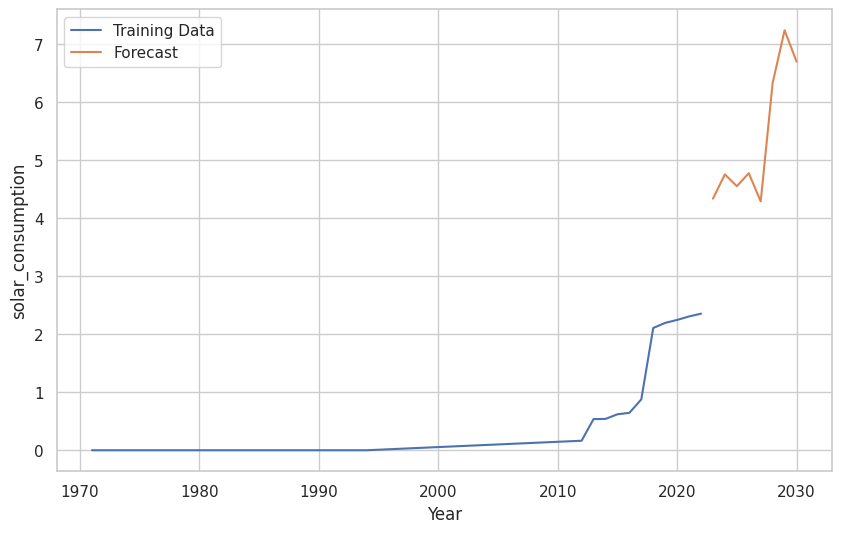

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



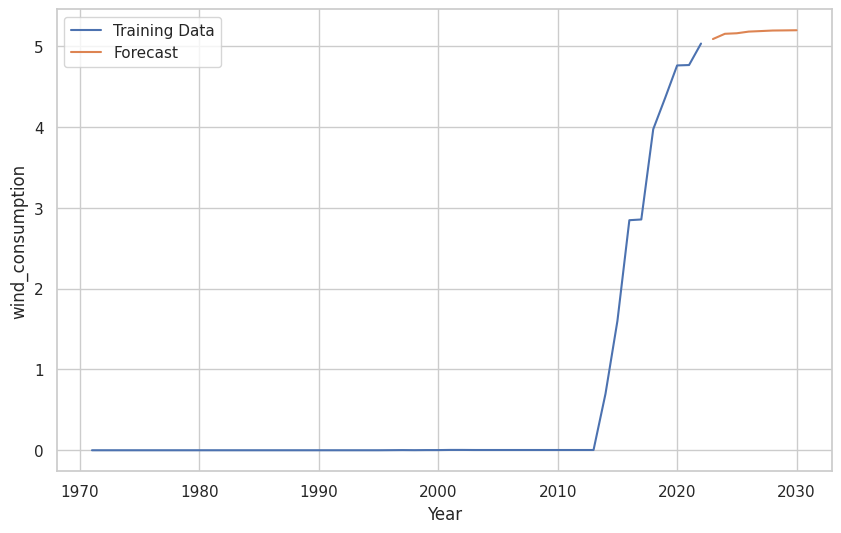

step 3.0
   index Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023    Peru             4.915343          7.162690        93.185294   
1   2024    Peru             4.991427          7.794864        99.234749   
2   2025    Peru             5.201221          7.561285       106.003886   
3   2026    Peru             5.168398          7.669231       108.228546   
4   2027    Peru             5.125769          7.983725       111.369653   
5   2028    Peru             5.193224          7.799265       115.107171   
6   2029    Peru             5.240308          7.999421       117.304706   
7   2030    Peru             5.212409          7.949478       119.393694   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          78.959783                    0       133.873890   
1          77.632006                    0       137.948545   
2          77.437994                    0       135.479071   
3          76.735549                    0       134.170334

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



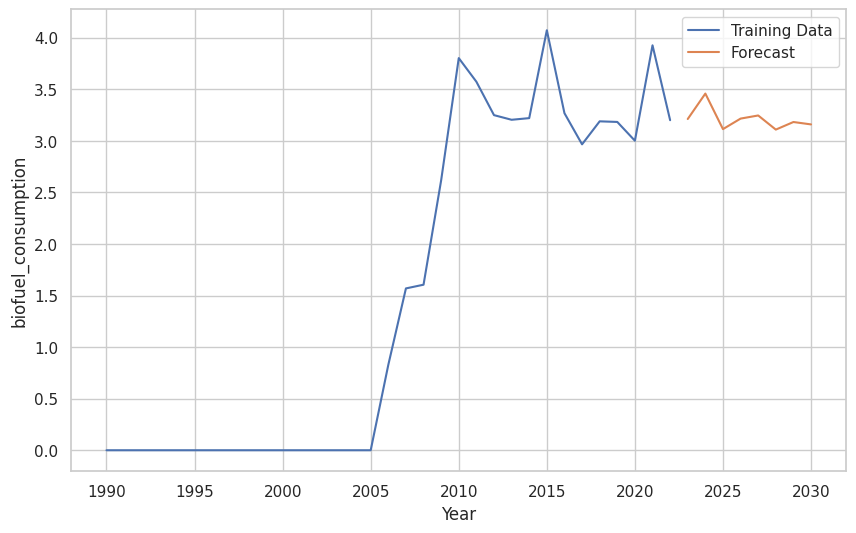

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

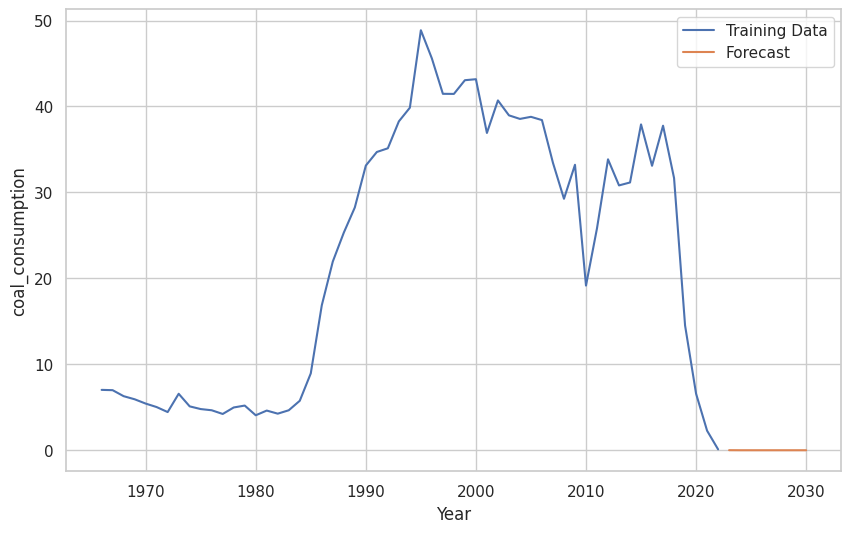

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



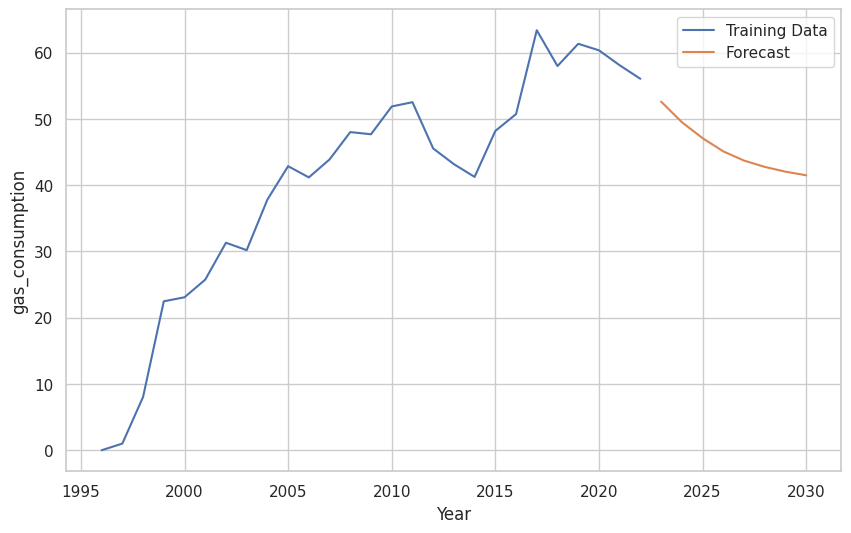

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



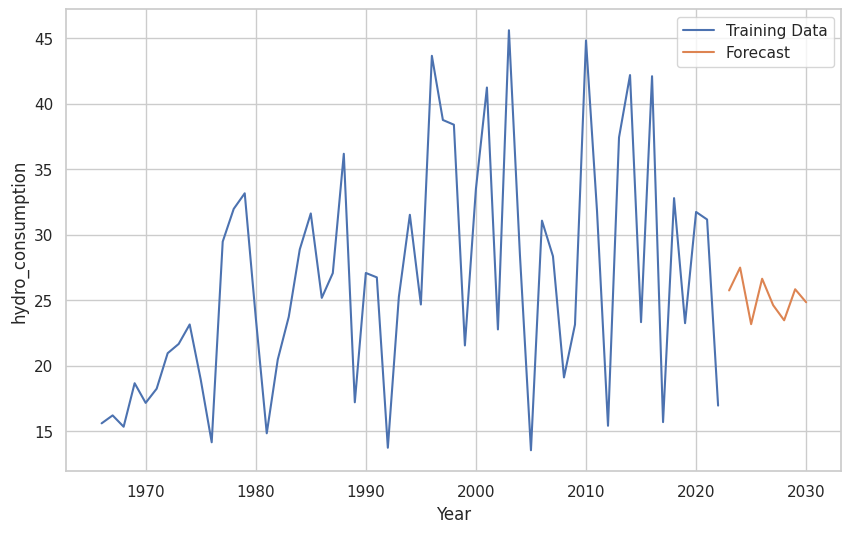

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is

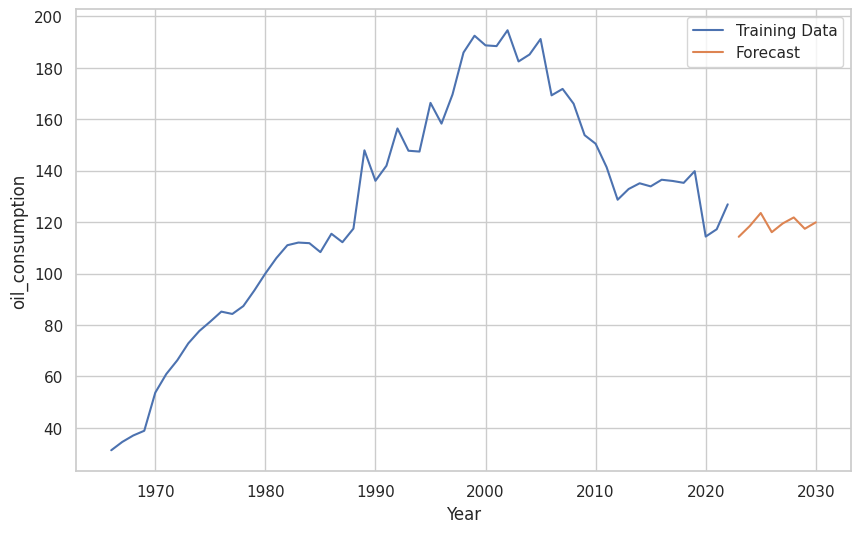

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



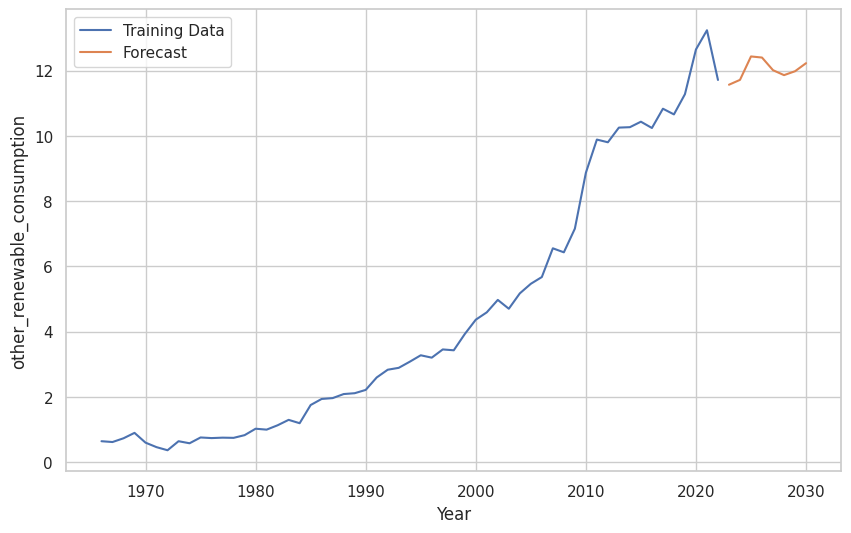

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



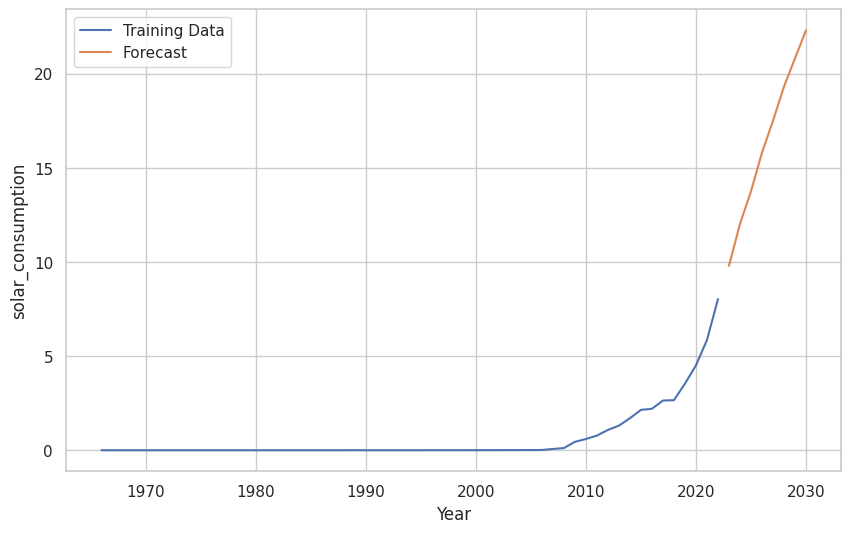

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



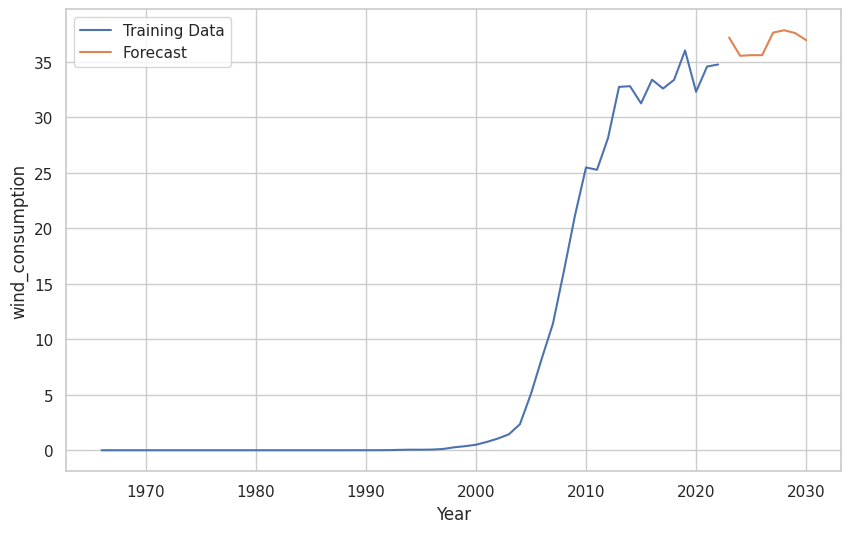

step 3.0
   index   Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Portugal             3.211374      8.861138e-03        52.624286   
1   2024  Portugal             3.458067      4.680406e-04        49.525300   
2   2025  Portugal             3.113489      9.311823e-06        47.109639   
3   2026  Portugal             3.215485      2.380386e-07        45.113249   
4   2027  Portugal             3.245735      5.501325e-09        43.726216   
5   2028  Portugal             3.108822      7.793445e-11        42.770310   
6   2029  Portugal             3.182308      1.416831e-12        42.049794   
7   2030  Portugal             3.159070      2.854227e-14        41.502492   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          25.743347                    0       114.287004   
1          27.486202                    0       118.468578   
2          23.168402                    0       123.530925   
3          26.635815                    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



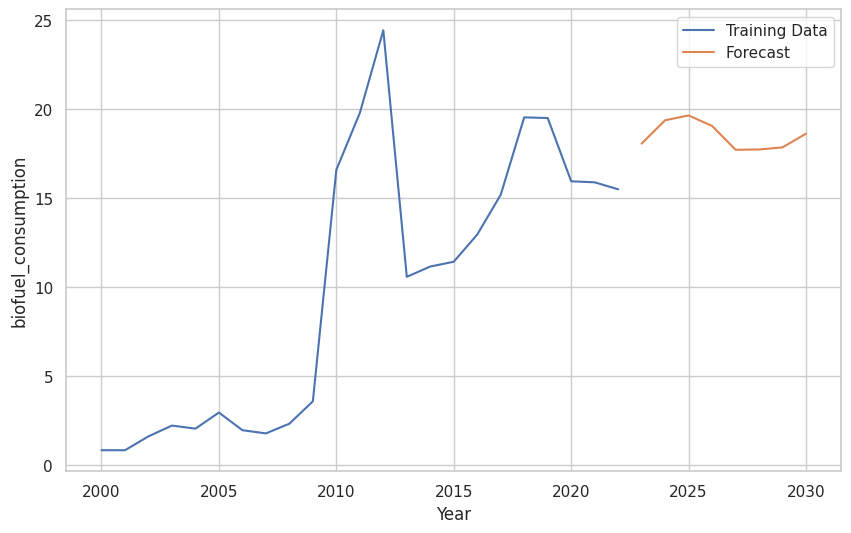

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



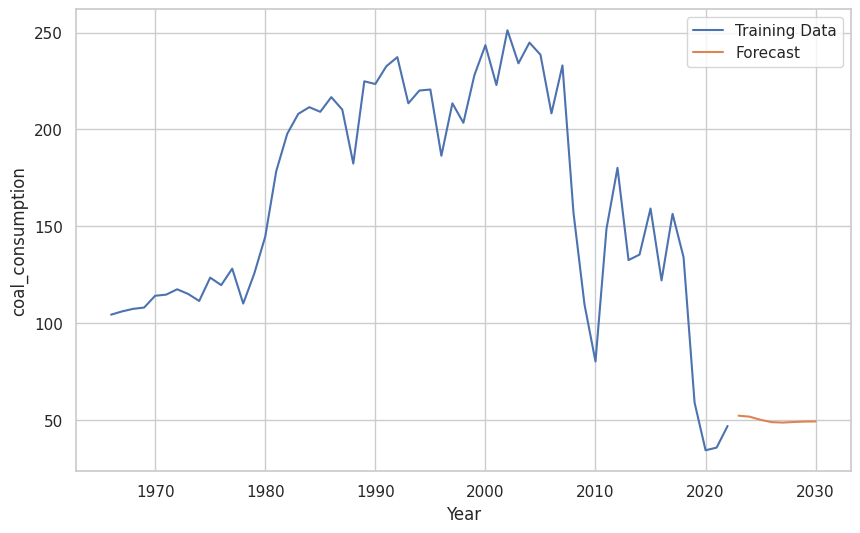

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



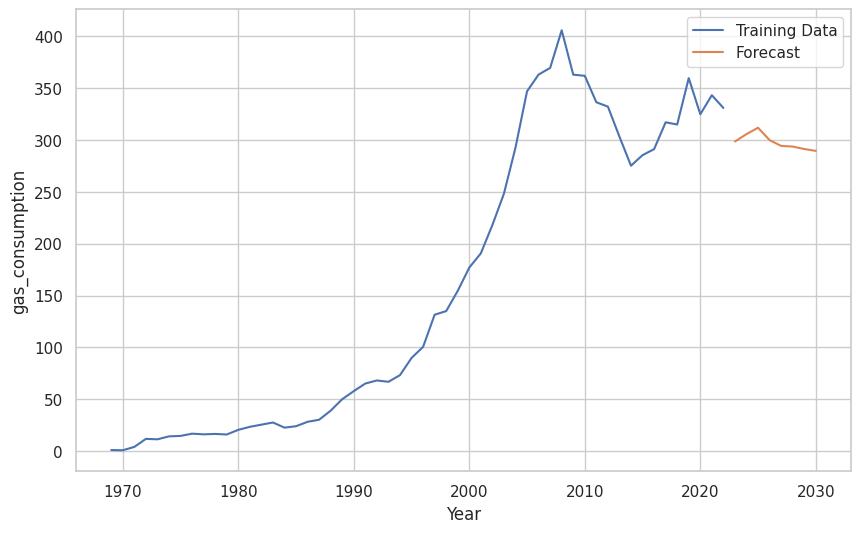

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



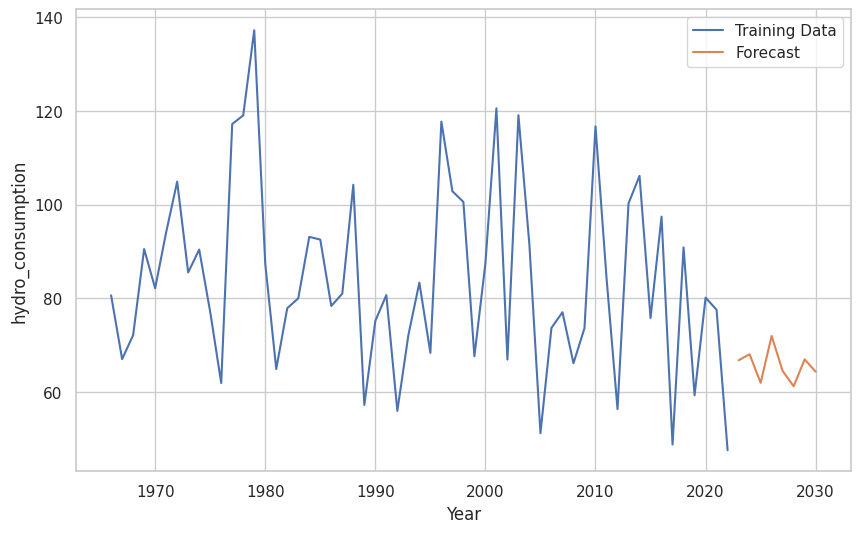

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



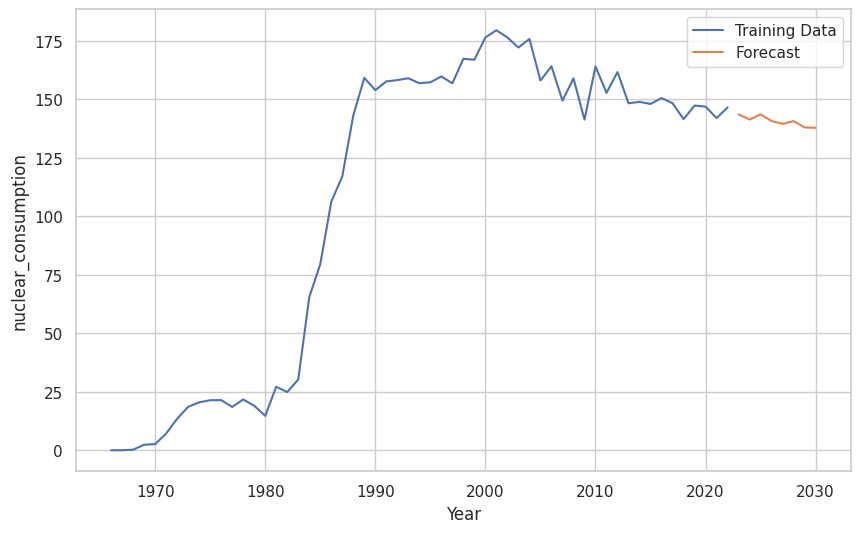

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



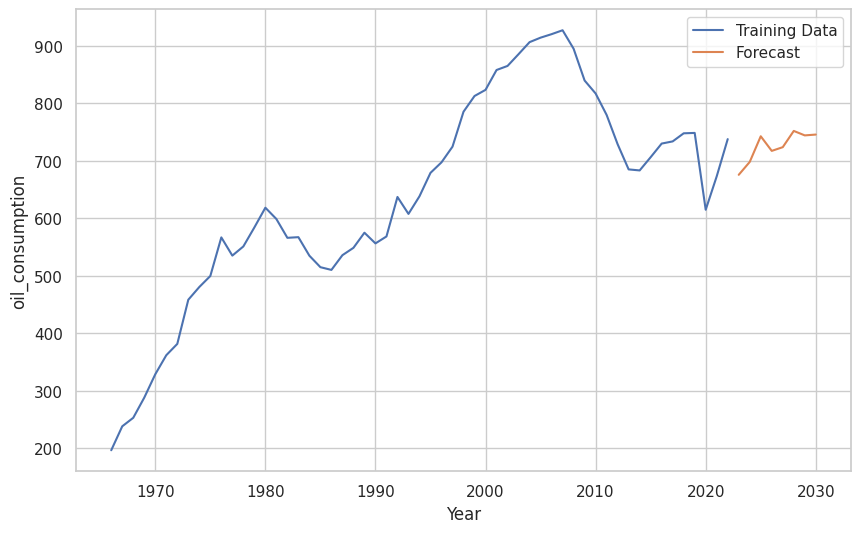

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



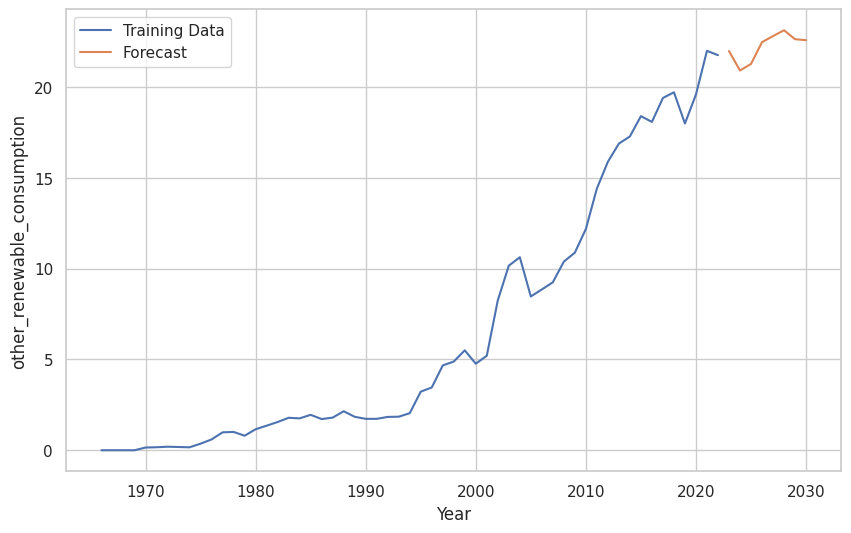

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



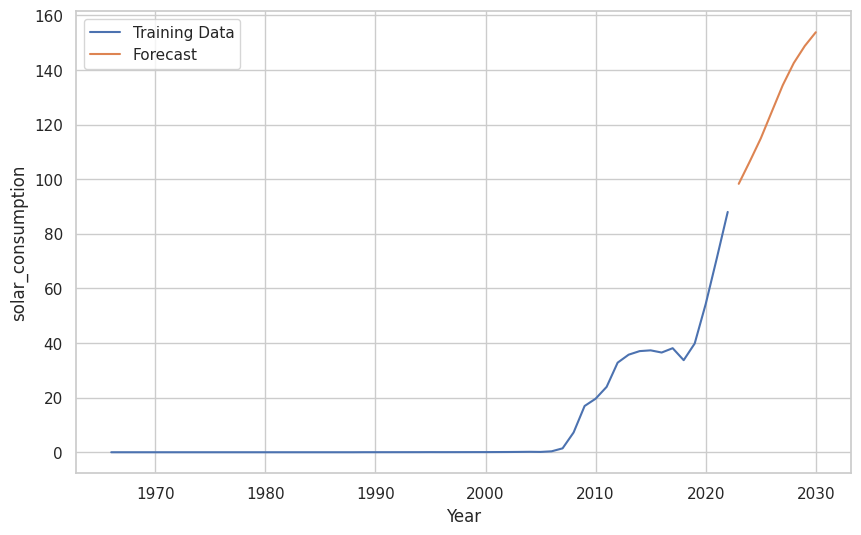

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



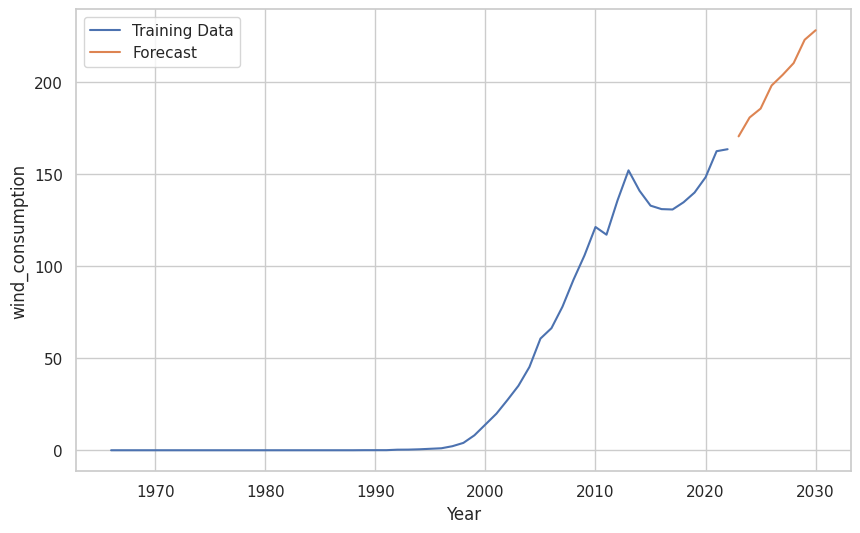

step 3.0
   index Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023   Spain            18.047138         52.218751       298.590501   
1   2024   Spain            19.358615         51.714897       305.716775   
2   2025   Spain            19.629317         50.066512       311.888211   
3   2026   Spain            19.038015         48.897804       299.926871   
4   2027   Spain            17.700111         48.677796       294.357086   
5   2028   Spain            17.717271         48.960199       293.714936   
6   2029   Spain            17.836495         49.193050       291.361135   
7   2030   Spain            18.607244         49.252522       289.557307   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          66.744884           143.615478       675.867444   
1          68.040016           141.419094       698.303163   
2          61.931786           143.615831       742.907251   
3          71.934842           140.771604       717.490895

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



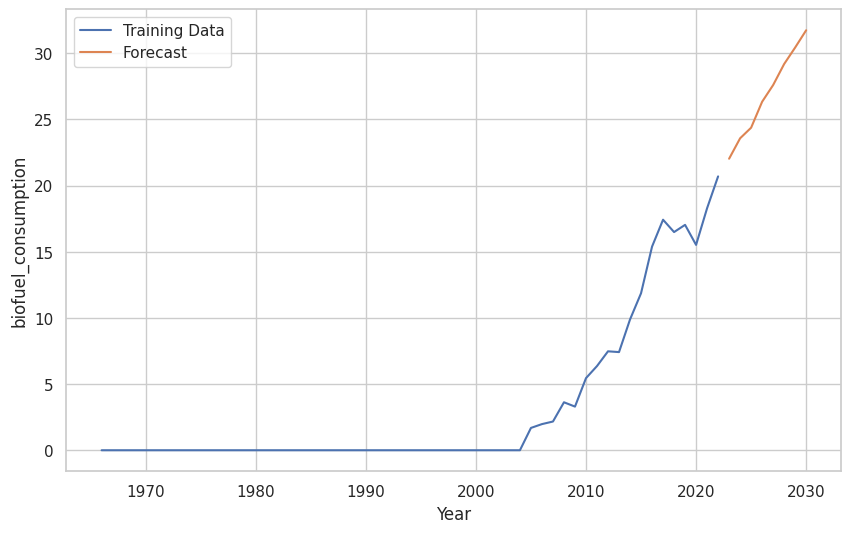

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



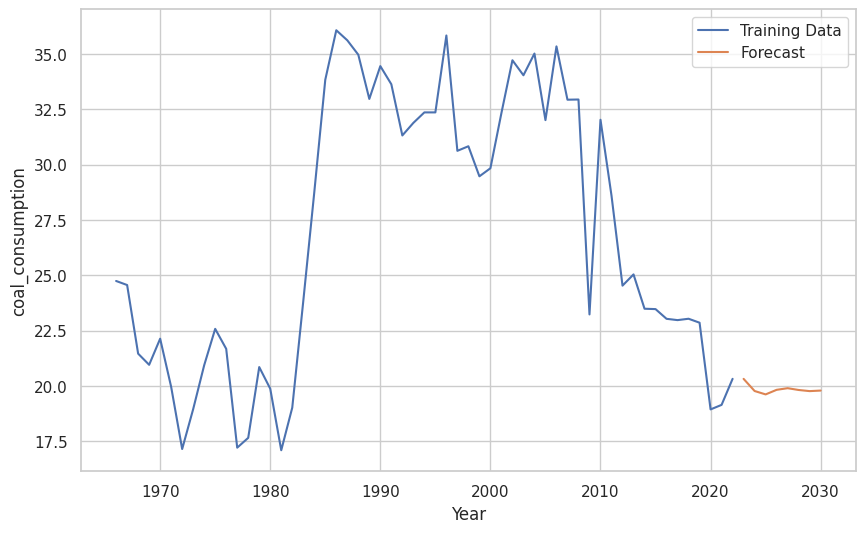

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



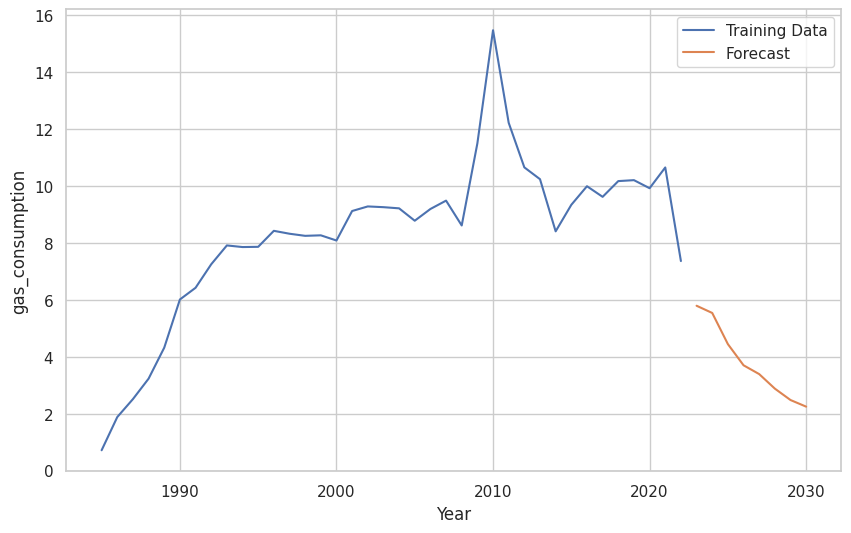

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



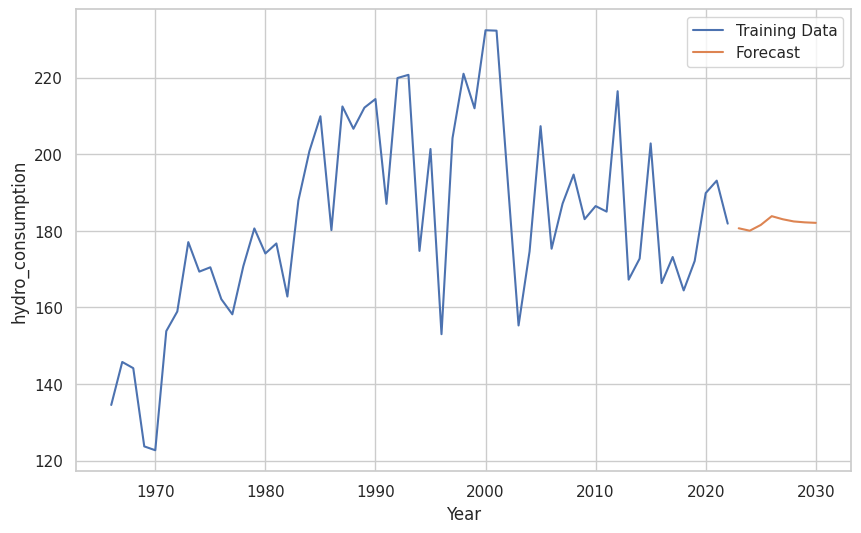

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



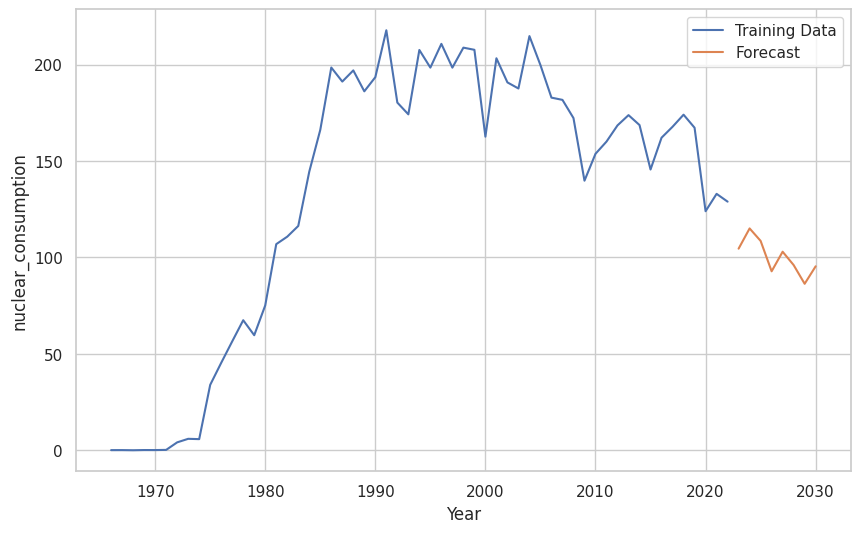

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



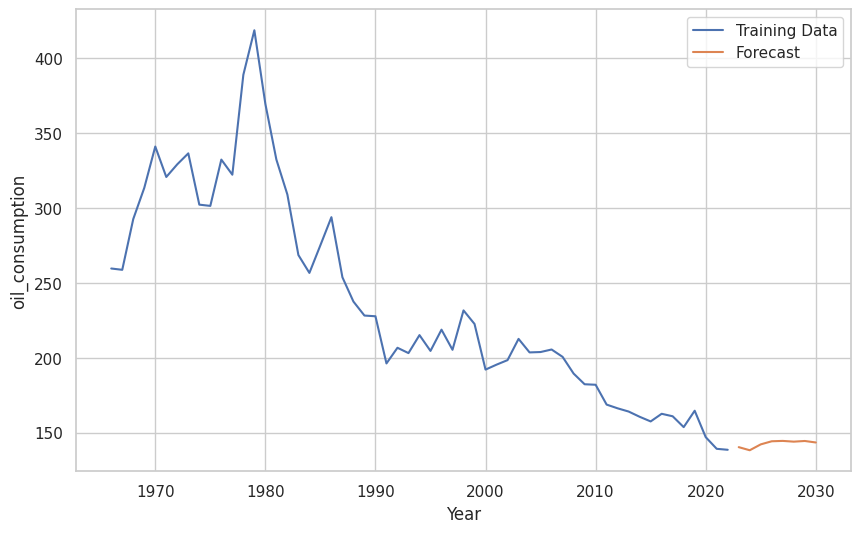

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



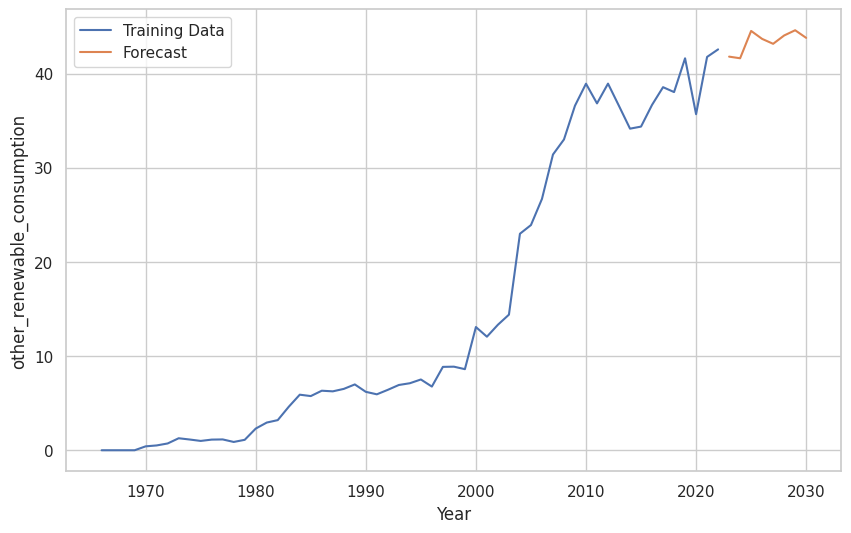

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWar

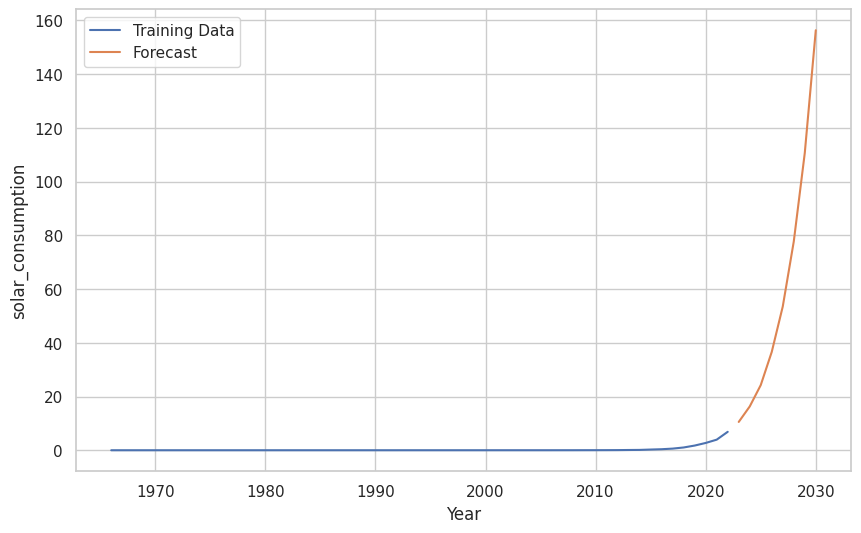

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



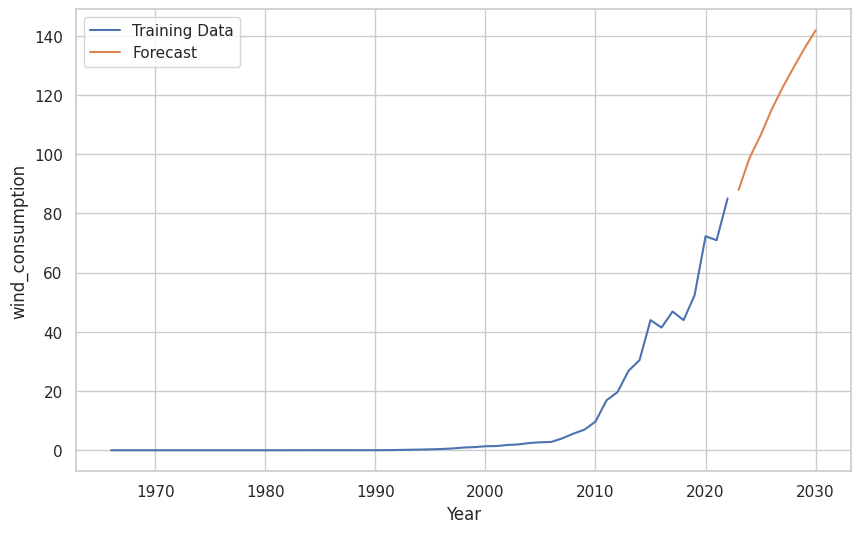

step 3.0
   index Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Sweden            22.032071         20.313187         5.790268   
1   2024  Sweden            23.575504         19.764182         5.536678   
2   2025  Sweden            24.376640         19.610414         4.442585   
3   2026  Sweden            26.336761         19.817579         3.698744   
4   2027  Sweden            27.599013         19.891735         3.388904   
5   2028  Sweden            29.188348         19.810417         2.878776   
6   2029  Sweden            30.434822         19.759087         2.478153   
7   2030  Sweden            31.740212         19.784229         2.245414   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0         180.656513           104.576377       140.291213   
1         180.014911           115.064490       138.219228   
2         181.517687           108.597395       142.146552   
3         183.815592            92.840392       144.220452

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



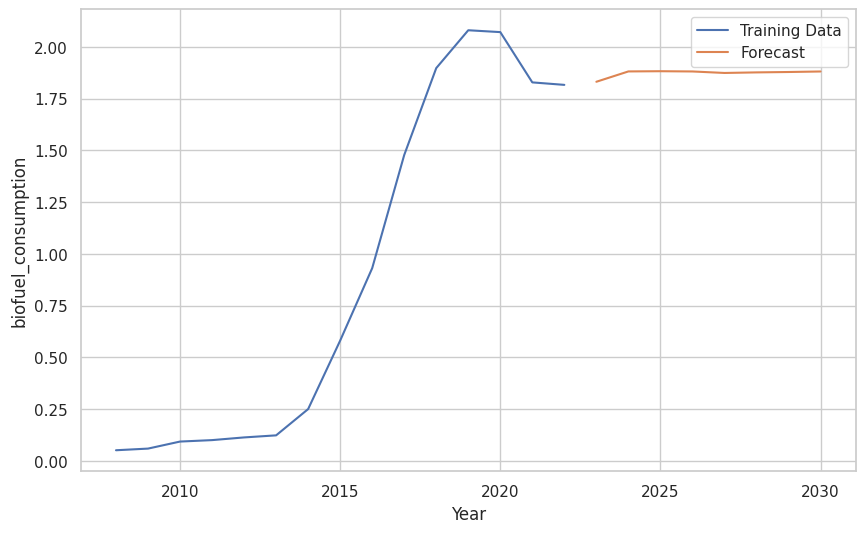

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



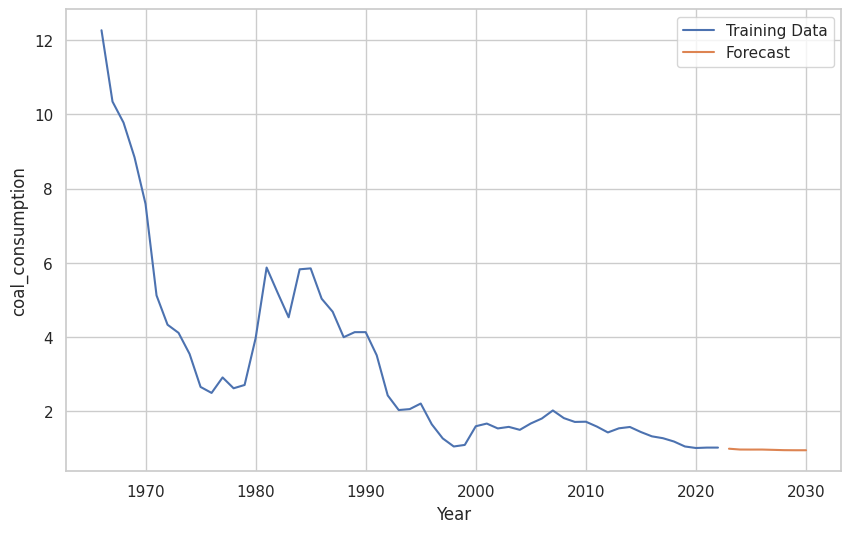

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



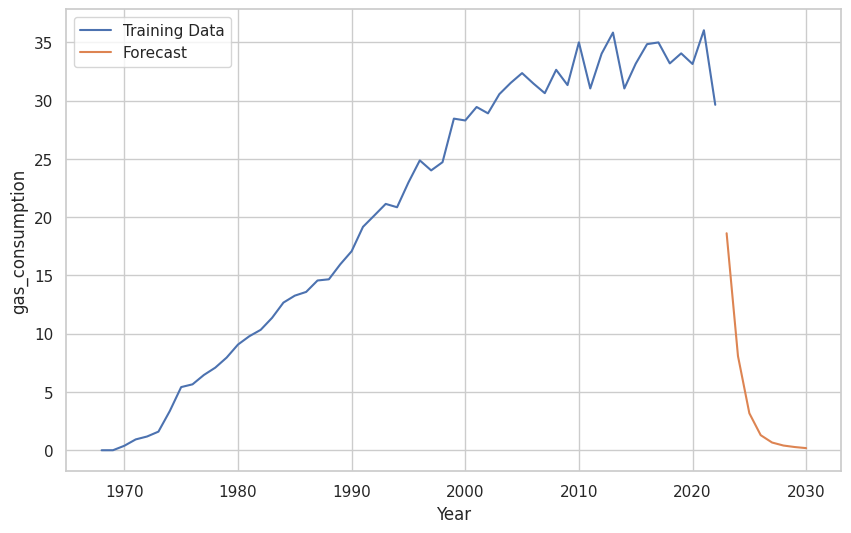

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



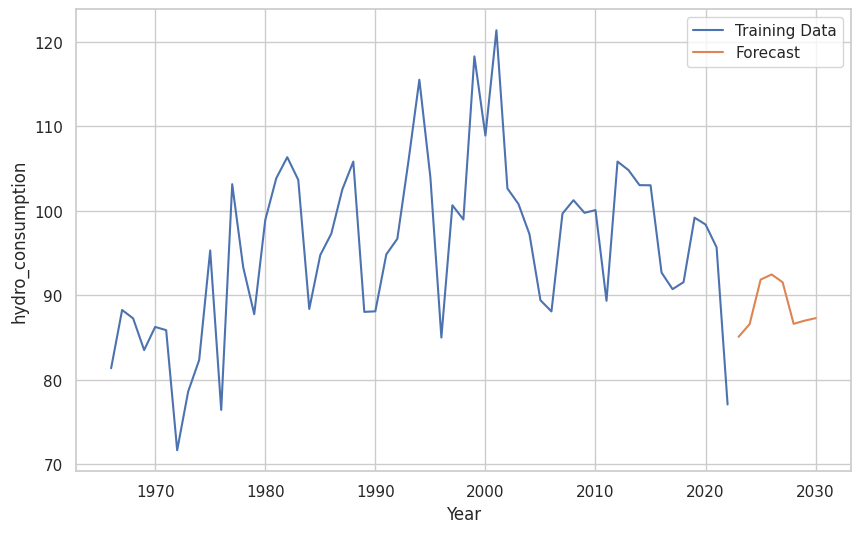

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



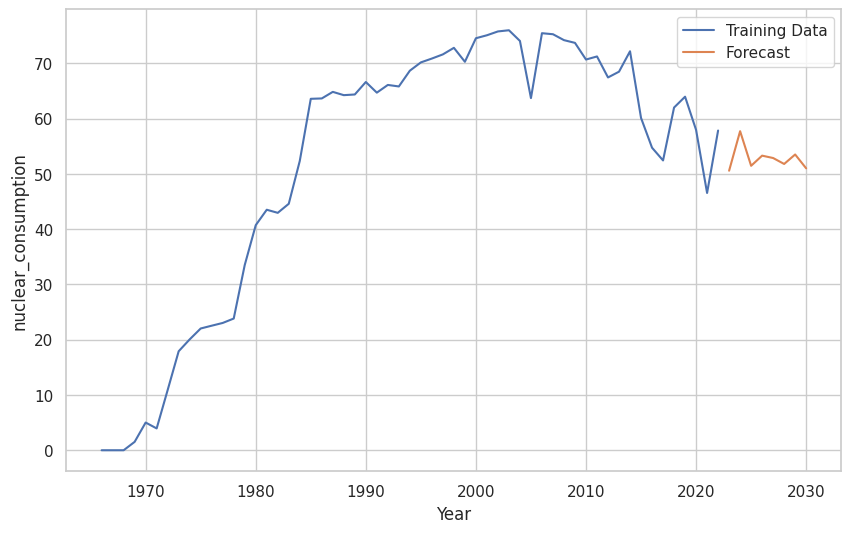

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



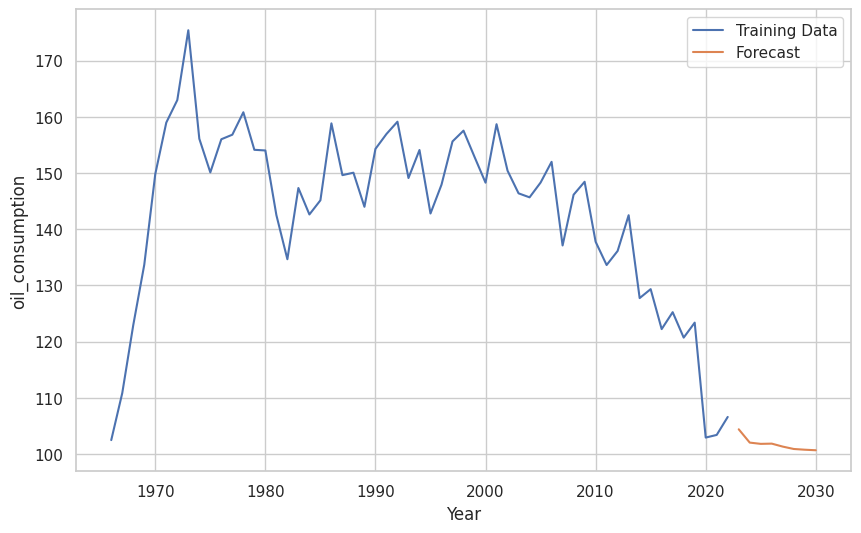

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



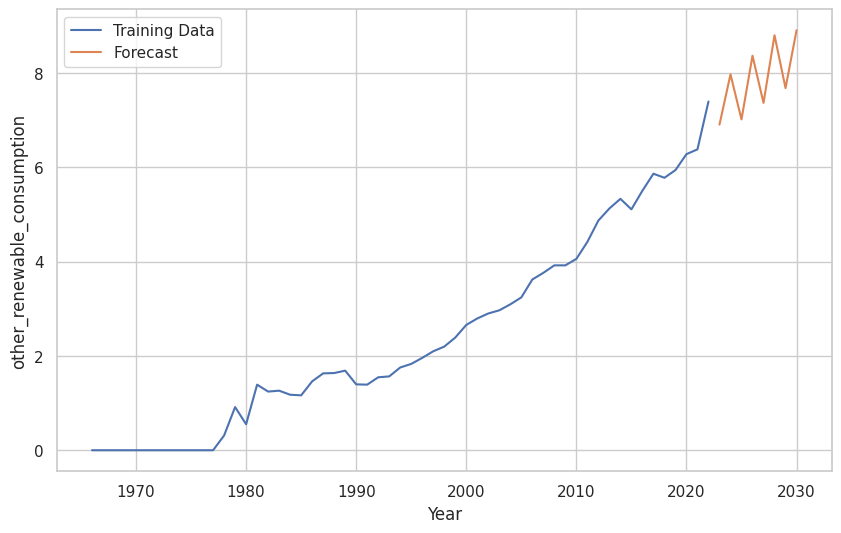

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



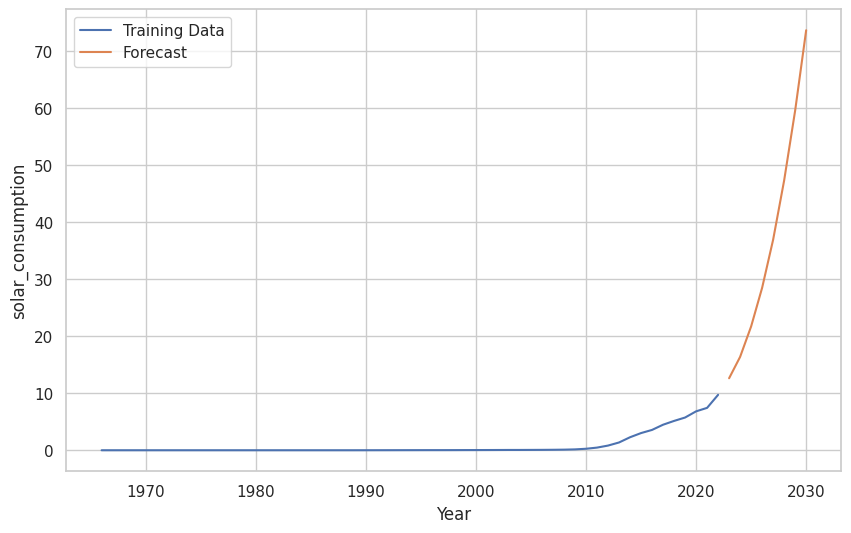

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



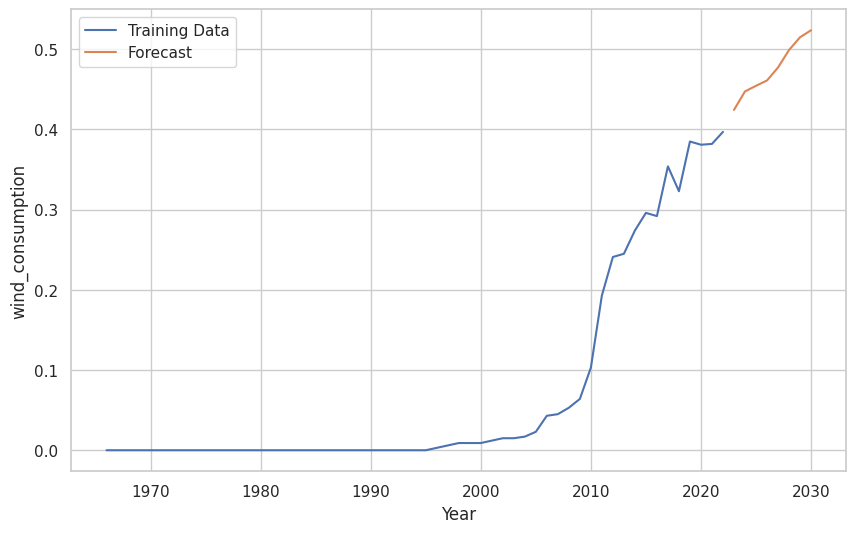

step 3.0
   index      Country  biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Switzerland             1.832018          0.998074        18.622178   
1   2024  Switzerland             1.881963          0.975999         8.079655   
2   2025  Switzerland             1.883012          0.974723         3.175846   
3   2026  Switzerland             1.881799          0.975247         1.293572   
4   2027  Switzerland             1.874581          0.967297         0.662877   
5   2028  Switzerland             1.877305          0.959068         0.404498   
6   2029  Switzerland             1.879182          0.956755         0.275998   
7   2030  Switzerland             1.881710          0.956575         0.182322   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0          85.096023            50.559913       104.392829   
1          86.592691            57.707044       102.022773   
2          91.865341            51.448464       101.797281   
3          92

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



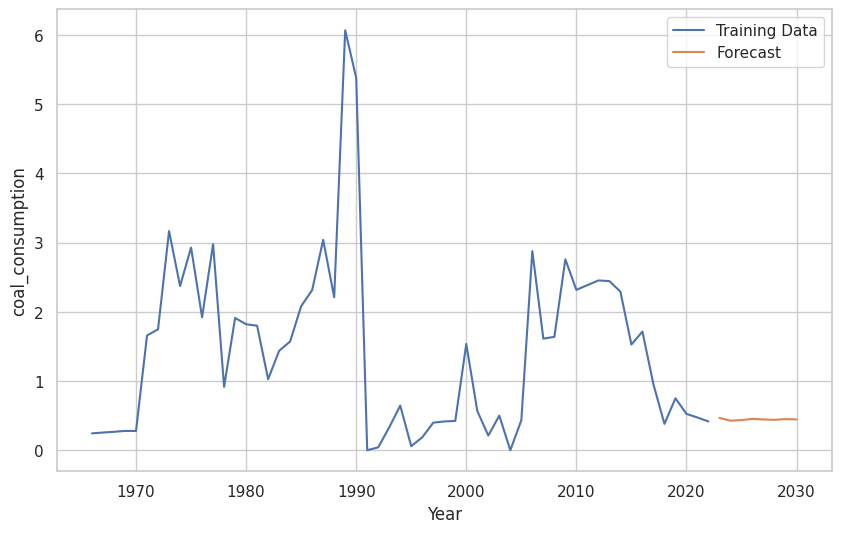

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



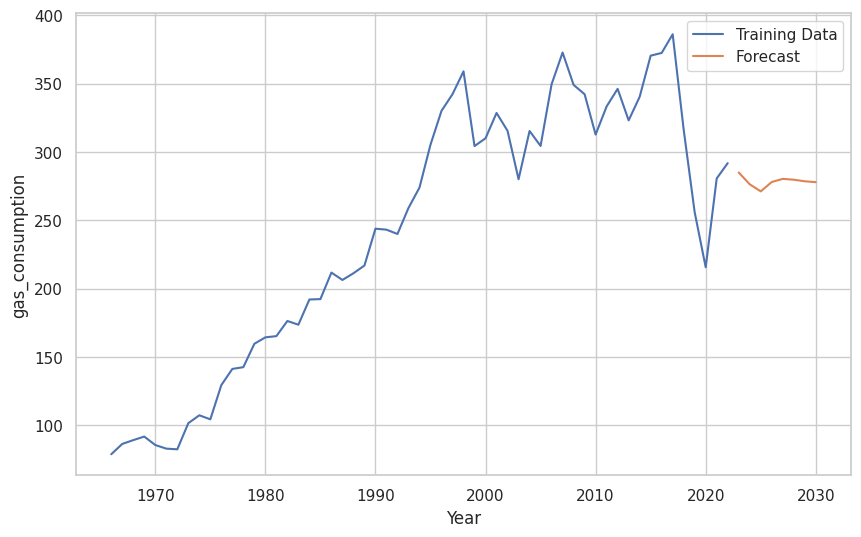

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



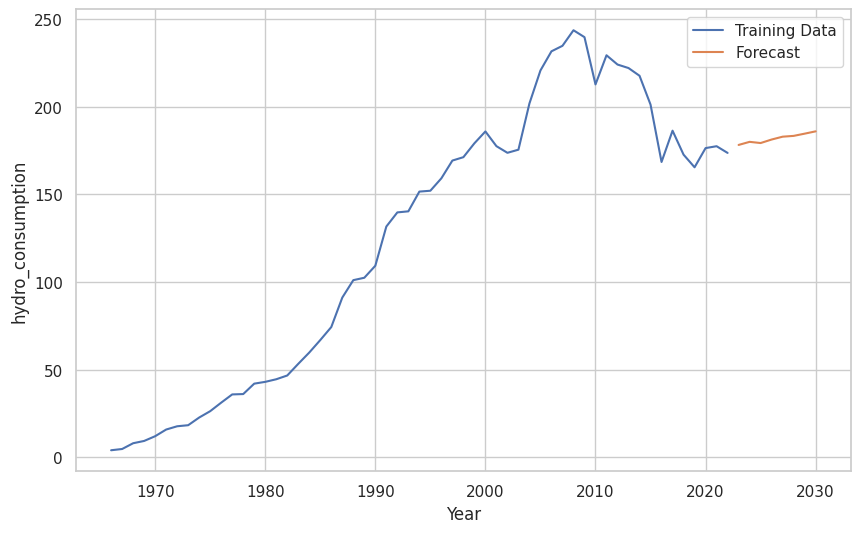

step 3.0
step 2.0
step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



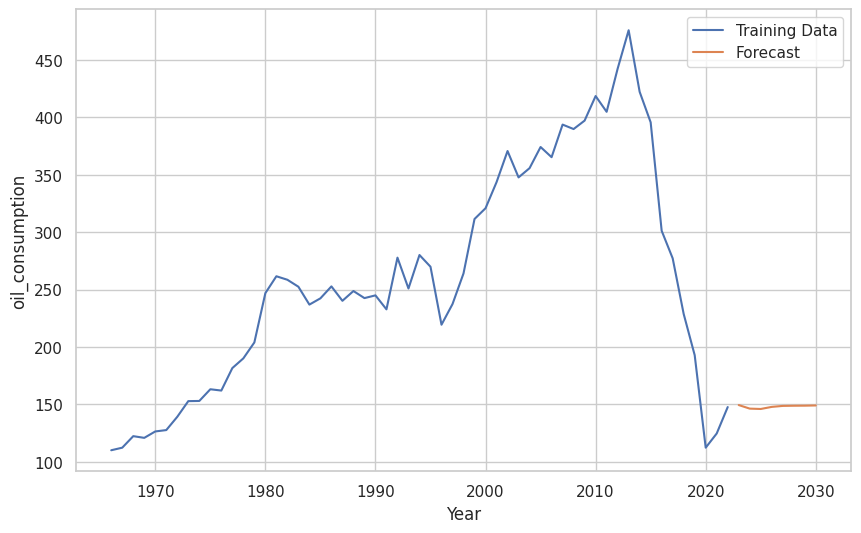

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is

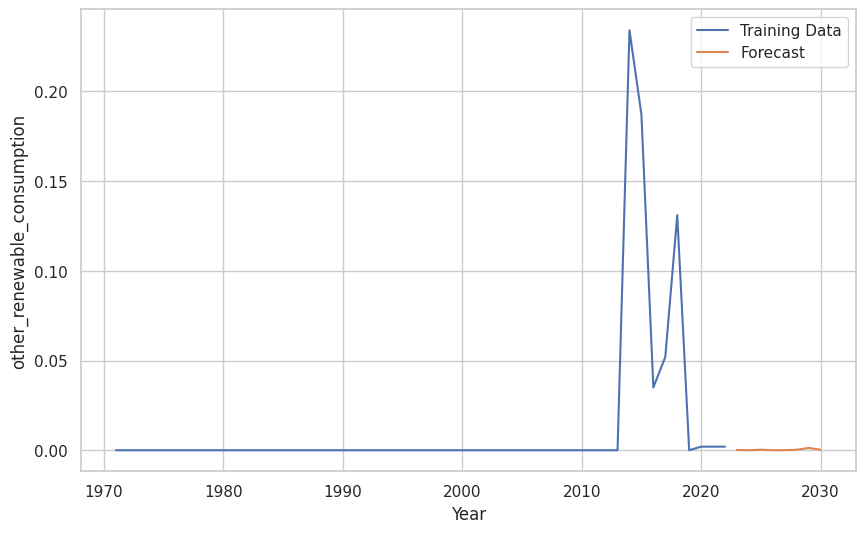

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



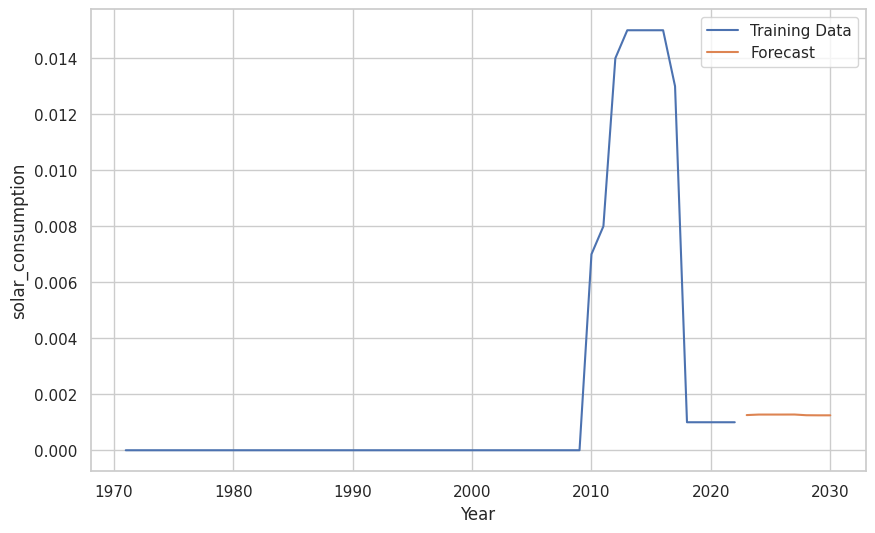

step 3.0
step 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



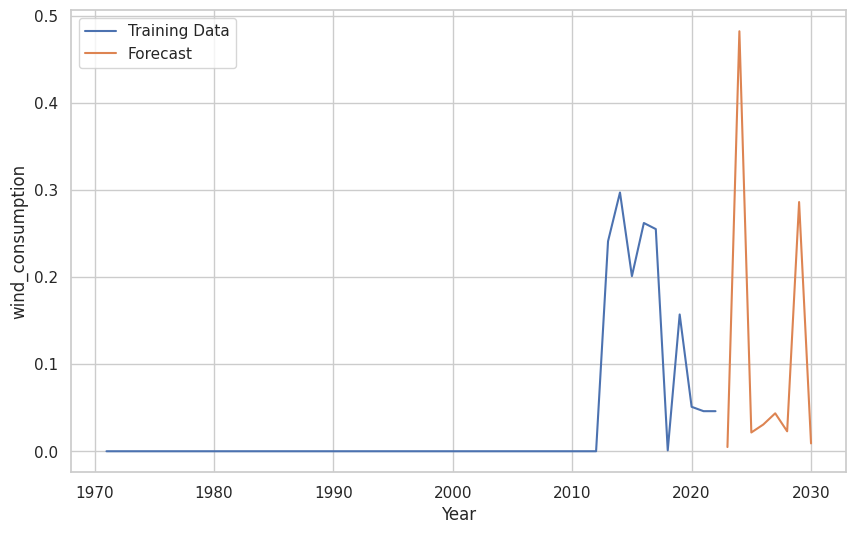

step 3.0
   index    Country biofuel_consumption  coal_consumption  gas_consumption  \
0   2023  Venezuela                 NaN          0.467289       284.942486   
1   2024  Venezuela                 NaN          0.427154       276.283479   
2   2025  Venezuela                 NaN          0.435768       271.142508   
3   2026  Venezuela                 NaN          0.453622       277.973544   
4   2027  Venezuela                 NaN          0.445078       280.255378   
5   2028  Venezuela                 NaN          0.439836       279.656691   
6   2029  Venezuela                 NaN          0.450067       278.498109   
7   2030  Venezuela                 NaN          0.445728       277.865677   

   hydro_consumption  nuclear_consumption  oil_consumption  \
0         178.253270                    0       149.471779   
1         180.019794                    0       146.365121   
2         179.338851                    0       146.049152   
3         181.342613                    

In [23]:
full_country = ['Austria', 'Brazil', 'Canada', 'Colombia', 'Croatia', 'Denmark',
       'Ecuador', 'Finland', 'New Zealand', 'Norway', 'Peru', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'Venezuela']

all_feature = ["biofuel_consumption", "coal_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", \
              "other_renewable_consumption", "solar_consumption", "wind_consumption"]


all_country_forecast = pd.DataFrame()

for country in full_country:
  print("The following info is about:", country)
  forecasted_result = full_forecast(country, all_feature)
  all_country_forecast = pd.concat([all_country_forecast, forecasted_result], axis = 0, ignore_index = True)

print(all_country_forecast)

In [24]:
all_country_forecast = pd.DataFrame(all_country_forecast)
all_country_forecast.rename(columns = {"index" : "year"}, inplace = True)

In [25]:
all_country_forecast.to_csv("/content/drive/My Drive/Colab Notebooks/ARIMA absolute consumption")

In [26]:
col = list(all_country_forecast.columns.values)
col.remove("year")
col.remove("Country")

all_country_forecast_share = all_country_forecast.copy()
all_country_forecast_share = all_country_forecast_share.fillna(0)
all_country_forecast_share["year"] = all_country_forecast_share["year"].astype(str)
all_country_forecast_share["energy sum"] = all_country_forecast_share.sum(axis = 1, numeric_only = True)


for i in range(all_country_forecast_share.shape[0]):
  for j in col:
    all_country_forecast_share[j + " share"] = round(all_country_forecast_share[j] *100 / all_country_forecast_share["energy sum"], 3)

all_country_forecast_share = all_country_forecast_share.drop(col, axis = 1)

renewable_sum = ["biofuel_consumption share", "hydro_consumption share", "other_renewable_consumption share", "solar_consumption share", "wind_consumption share"]
fossil_sum = ["coal_consumption share", "gas_consumption share", "oil_consumption share"]

all_country_forecast_share.drop(columns = ["energy sum"], inplace = True)
all_country_forecast_share["renewable_energy_consumption share"] = all_country_forecast_share[renewable_sum].sum(axis = 1)
all_country_forecast_share["fossil_fuel_consumption share"] = all_country_forecast_share[fossil_sum].sum(axis = 1)
all_country_forecast_share.to_csv("/content/drive/My Drive/Colab Notebooks/ARIMA percentage consumption")

arima_2030_allforecast = all_country_forecast_share[all_country_forecast_share["year"].isin(["2030"])]

arima_2030_allforecast


year      Country  biofuel_consumption share  coal_consumption share  \
7    2030      Austria                      1.166                   7.622   
15   2030       Brazil                      3.581                   1.926   
23   2030       Canada                      0.581                   1.623   
31   2030     Colombia                      1.238                   4.831   
39   2030      Croatia                      0.481                   4.361   
47   2030      Denmark                      1.394                   4.818   
55   2030      Ecuador                      0.280                   0.347   
63   2030      Finland                      4.111                   8.406   
71   2030  New Zealand                      0.027                   6.192   
79   2030       Norway                      0.434                   1.458   
87   2030         Peru                      1.461                   2.228   
95   2030     Portugal                      1.211                   0.000   
103  2030        Spain                      1.088                   2.880   
111  2030       Sweden                      3.886                   2.423   
119  2030  Switzerland                      0.579                   0.294   
127  2030    Venezuela                      0.000                   0.073   

     gas_consumption share  hydro_consumption share  \
7                   18.103                   25.596   
15                   3.823                   16.810   
23                  33.855                   26.945   
31                  18.513                   26.426   
39                  24.244                   14.514   
47                   0.259                    0.019   
55                   2.723                   31.162   
63                   0.840                    9.202   
71                  13.183                   29.869   
79                   4.718                   53.255   
87                  33.462                   21.004   
95                  15.908                    9.521   
103                 16.933                    3.761   
111                  0.275                   22.294   
119                  0.056                   26.853   
127                 45.296                   30.322   

     nuclear_consumption share  oil_consumption share  \
7                        0.000                 33.970   
15                       0.476                 21.770   
23                       4.228                 29.067   
31                       0.000                 46.440   
39                       0.000                 36.803   
47                       0.000                 37.865   
55                       0.000                 64.911   
63                      17.949                 21.653   
71                       0.000                 33.902   
79                       0.000                 16.297   
87                       0.000                 37.826   
95                       0.000                 45.958   
103                      8.064                 43.619   
111                     11.685                 17.560   
119                     15.684                 30.963   
127                      0.000                 24.308   

     other_renewable_consumption share  solar_consumption share  \
7                                4.106                    4.259   
15                               2.000                   44.823   
23                               0.468                    0.622   
31                               1.539                    1.001   
39                               7.039                    0.160   
47                              11.635                    6.092   
55                               0.324                    0.183   
63                              11.432                    0.541   
71                              10.463                    0.855   
79                               0.169                    0.958   
87                               0.684              

In [27]:
overall_composition_arima = arima_2030_allforecast[["Country", "renewable_energy_consumption share", "fossil_fuel_consumption share", "nuclear_consumption share"]]
overall_composition_arima

Country  renewable_energy_consumption share  \
7        Austria                              40.306   
15        Brazil                              72.004   
23        Canada                              31.226   
31      Colombia                              30.217   
39       Croatia                              34.592   
47       Denmark                              57.058   
55       Ecuador                              32.020   
63       Finland                              51.152   
71   New Zealand                              46.723   
79        Norway                              77.527   
87          Peru                              26.484   
95      Portugal                              38.134   
103        Spain                              28.503   
111       Sweden                              68.056   
119  Switzerland                              53.003   
127    Venezuela                              30.323   

     fossil_fuel_consumption share  nuclear_consumption share  
7                           59.695                      0.000  
15                          27.519                      0.476  
23                          64.545                      4.228  
31                          69.784                      0.000  
39                          65.408                      0.000  
47                          42.942                      0.000  
55                          67.981                      0.000  
63                          30.899                     17.949  
71                          53.277                      0.000  
79                          22.473                      0.000  
87                          73.516                      0.000  
95                          61.866                      0.000  
103                         63.432                      8.064  
111                         20.258                     11.685  
119                         31.313                     15.684  
127                         69.677                      0.000

# ARIMA result analysis

In [28]:
country_nuclear_share = arima_2030_allforecast[["Country", "nuclear_consumption share"]]

# Filter the dataframe for the year 2023
arima_2023_allforecast = all_country_forecast_share[all_country_forecast_share["year"].isin(["2023"])]

# Drop the column "energy sum" if present
if "energy sum" in arima_2023_allforecast.columns:
    arima_2023_allforecast.drop(columns=["energy sum"], inplace=True)

# Calculate the renewable energy consumption share and fossil fuel consumption share for 2023
arima_2023_allforecast["renewable_energy_consumption share"] = arima_2023_allforecast[renewable_sum].sum(axis=1)
arima_2023_allforecast["fossil_fuel_consumption share"] = arima_2023_allforecast[fossil_sum].sum(axis=1)

country_nuclear_share_2023 = arima_2023_allforecast[["Country", "nuclear_consumption share"]]


<ipython-input-28-e856ef90a477>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-e856ef90a477>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



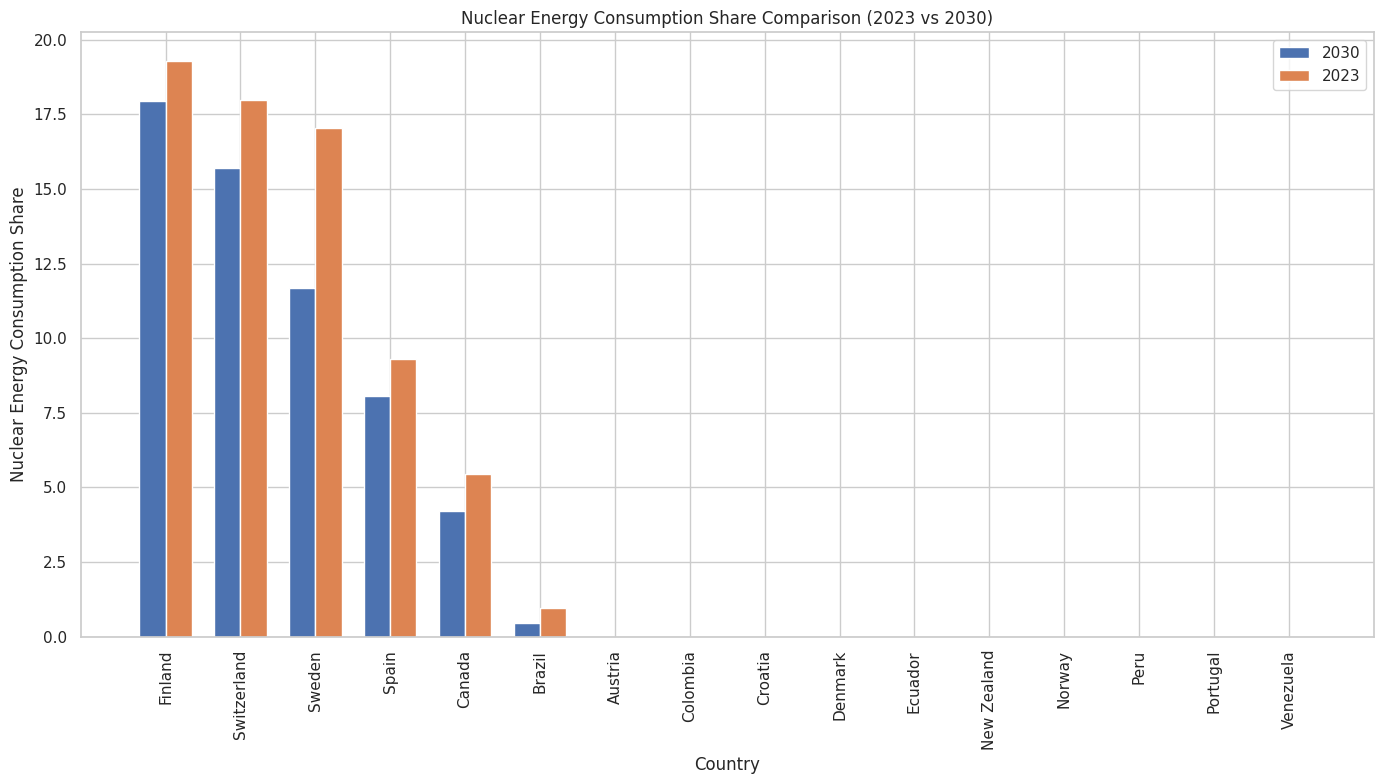

In [29]:
# Sort data for 2030
country_nuclear_share_sorted_2030 = country_nuclear_share.sort_values(by="nuclear_consumption share", ascending=False)

# Sort data for 2023, keeping the original order
country_nuclear_share_sorted_2023 = country_nuclear_share_2023.set_index("Country").reindex(country_nuclear_share_sorted_2030["Country"]).reset_index()

# Set up the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Get the number of countries
num_countries = len(country_nuclear_share_sorted_2030)

# Set the width of the bars
bar_width = 0.35

# Plot the bars for 2030
x = np.arange(num_countries)
plt.bar(x, country_nuclear_share_sorted_2030["nuclear_consumption share"], width=bar_width, label='2030')

# Plot the bars for 2023
plt.bar(x + bar_width, country_nuclear_share_sorted_2023["nuclear_consumption share"], width=bar_width, label='2023')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Nuclear Energy Consumption Share')
plt.title('Nuclear Energy Consumption Share Comparison (2023 vs 2030)')
plt.xticks(x + bar_width / 2, country_nuclear_share_sorted_2030["Country"], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [30]:
country_renewable_share = arima_2030_allforecast[["Country", "renewable_energy_consumption share"]]
country_renewable_share_2023 = arima_2023_allforecast[["Country", "renewable_energy_consumption share"]]

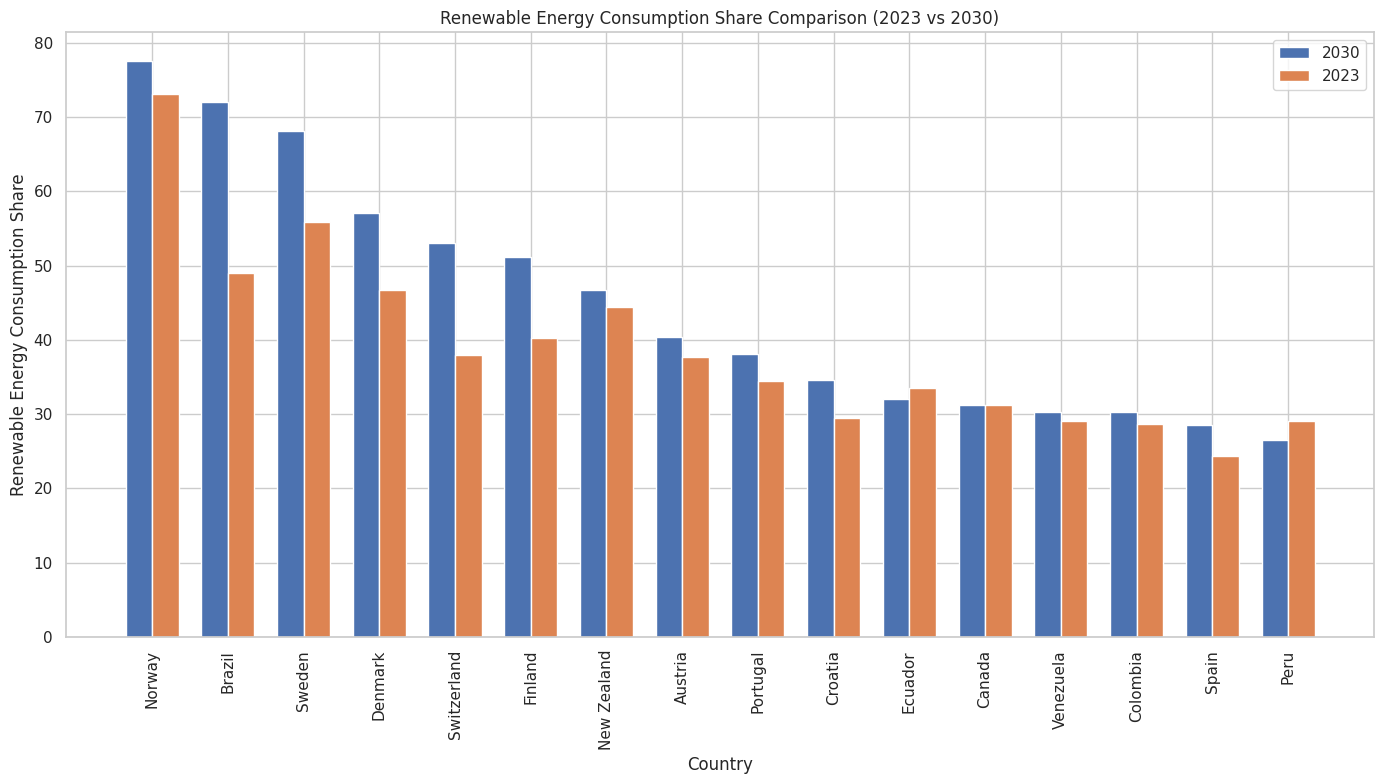

In [31]:
country_renewable_share_sorted_2030 = country_renewable_share.sort_values(by="renewable_energy_consumption share", ascending=False)

# Sort data for 2023, keeping the original order
country_renewable_share_sorted_2023 = country_renewable_share_2023.set_index("Country").reindex(country_renewable_share_sorted_2030["Country"]).reset_index()

# Set up the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Get the number of countries
num_countries = len(country_renewable_share_sorted_2030)

# Set the width of the bars
bar_width = 0.35

# Plot the bars for 2030
x = np.arange(num_countries)
plt.bar(x, country_renewable_share_sorted_2030["renewable_energy_consumption share"], width=bar_width, label='2030')

# Plot the bars for 2023
plt.bar(x + bar_width, country_renewable_share_sorted_2023["renewable_energy_consumption share"], width=bar_width, label='2023')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Renewable Energy Consumption Share')
plt.title('Renewable Energy Consumption Share Comparison (2023 vs 2030)')
plt.xticks(x + bar_width / 2, country_renewable_share_sorted_2030["Country"], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [32]:
country_fossil_share = arima_2030_allforecast[["Country", "fossil_fuel_consumption share"]]
country_fossil_share_2023 = arima_2023_allforecast[["Country", "fossil_fuel_consumption share"]]


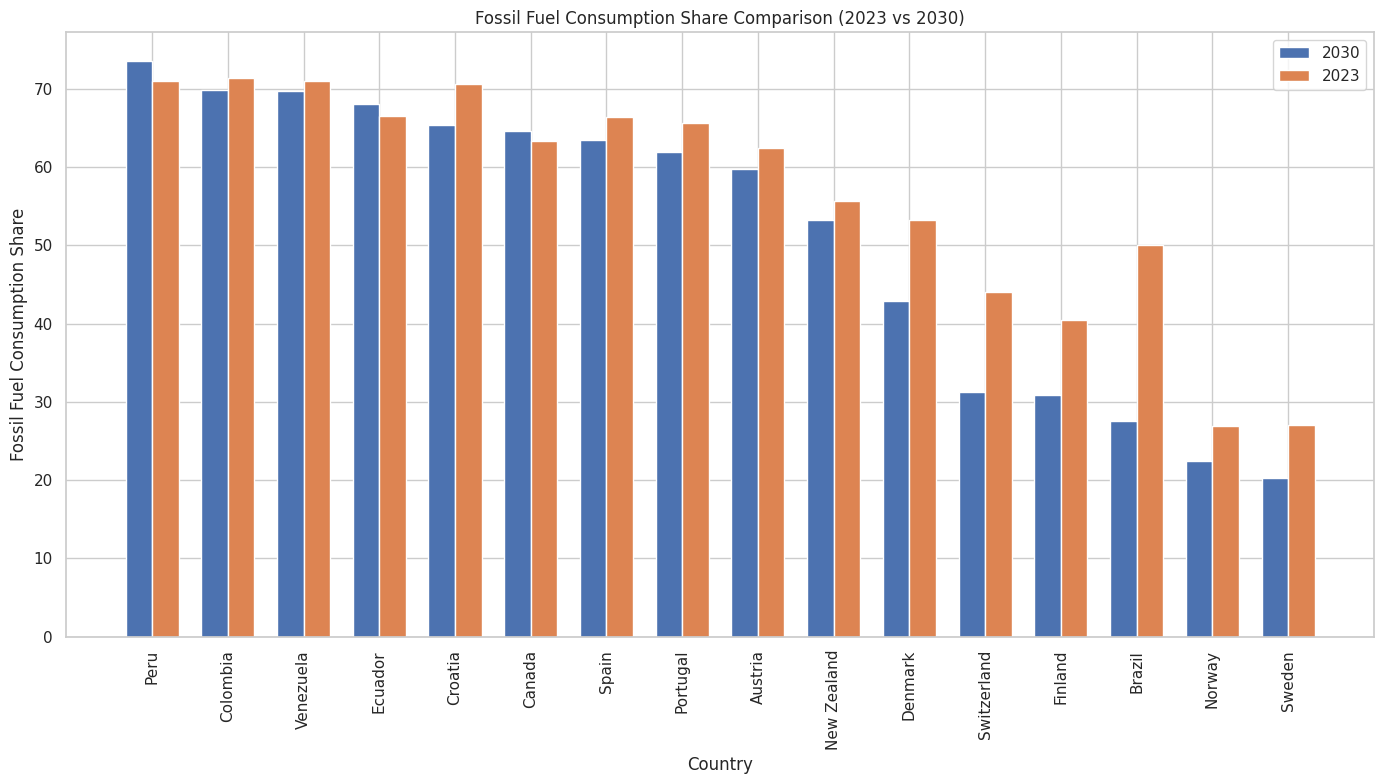

In [33]:
country_fossil_share_sorted_2030 = country_fossil_share.sort_values(by="fossil_fuel_consumption share", ascending=False)

# Sort data for 2023, keeping the original order
country_fossil_share_sorted_2023 = country_fossil_share_2023.set_index("Country").reindex(country_fossil_share_sorted_2030["Country"]).reset_index()

# Set up the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Get the number of countries
num_countries = len(country_fossil_share_sorted_2030)

# Set the width of the bars
bar_width = 0.35

# Plot the bars for 2030
x = np.arange(num_countries)
plt.bar(x, country_fossil_share_sorted_2030["fossil_fuel_consumption share"], width=bar_width, label='2030')

# Plot the bars for 2023
plt.bar(x + bar_width, country_fossil_share_sorted_2023["fossil_fuel_consumption share"], width=bar_width, label='2023')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Fossil Fuel Consumption Share')
plt.title('Fossil Fuel Consumption Share Comparison (2023 vs 2030)')
plt.xticks(x + bar_width / 2, country_fossil_share_sorted_2030["Country"], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [34]:
selected_countries = ["Brazil", "Norway", "Sweden", "Peru", "Spain", "Colombia"]

# Filter the dataset for the specified countries and years
filtered_data = world_energy[(world_energy["country"].isin(selected_countries)) & (world_energy["year"].between(2000, 2023))]

# Extract the country name, year, and renewables_share_energy columns
result = filtered_data[["country", "year", "renewables_share_energy"]]

# Drop rows with NaN values
result = result.dropna()

selected_countries = ["Brazil", "Norway", "Sweden", "Peru", "Spain", "Colombia"]

# Filter the DataFrame for the selected countries
selected_data = all_country_forecast_share[all_country_forecast_share["Country"].isin(selected_countries)]

# Filter the DataFrame for the years from 2023 to 2030
selected_data = selected_data[(selected_data["year"].astype(int) >= 2023) & (selected_data["year"].astype(int) <= 2030)]

# Calculate the renewable energy consumption share for the selected countries
selected_data["renewable_energy_consumption share"] = selected_data[renewable_sum].sum(axis=1)

# Extract the desired columns
extracted_data = selected_data[["Country", "year", "renewable_energy_consumption share"]]

<ipython-input-35-df24da6c8706>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-df24da6c8706>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-df24da6c8706>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-df24

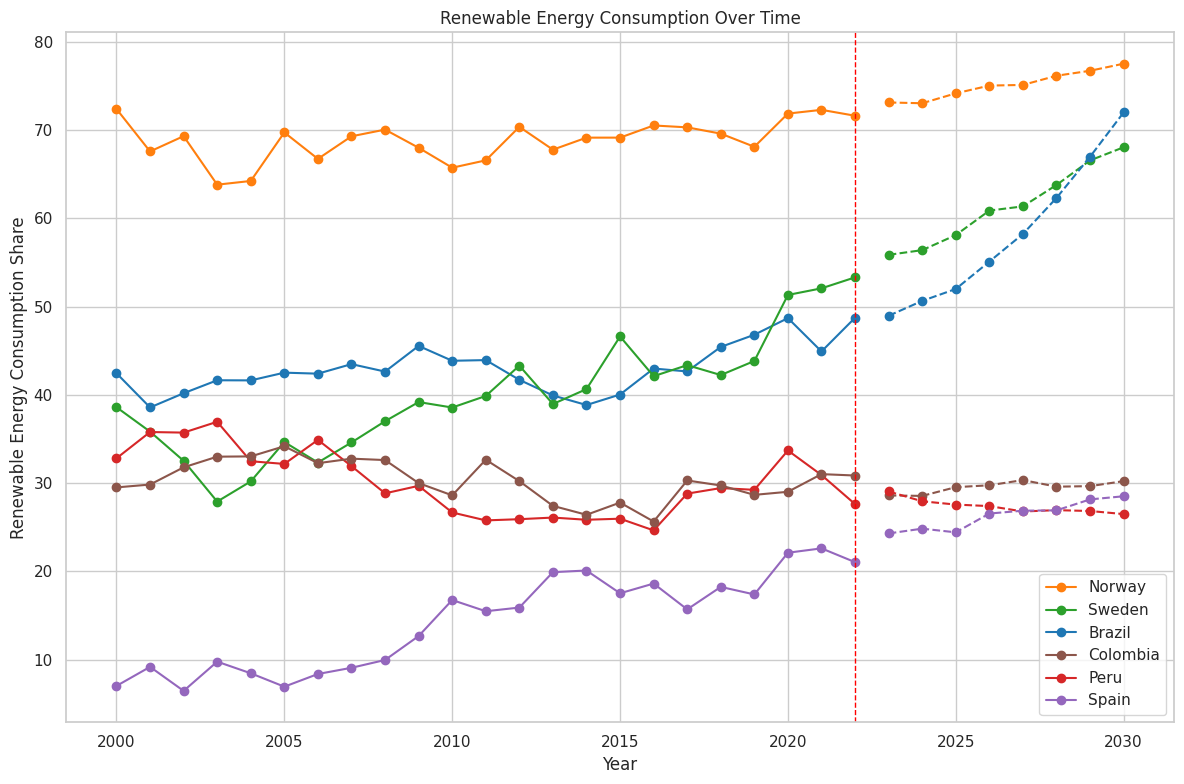

In [35]:
plt.figure(figsize=(12, 8))

max_share_dict = {}

for country in selected_countries:
    country_actual_data = result[result["country"] == country]
    max_share = country_actual_data["renewables_share_energy"].max()
    max_share_dict[country] = max_share
    color = plt.cm.tab10(selected_countries.index(country) % 10)
    plt.plot(country_actual_data["year"], country_actual_data["renewables_share_energy"], label=country, linestyle='-', marker='o', color=color)  # Use markers for actual data

sorted_countries = ["Norway", "Sweden", "Brazil", "Colombia", "Peru", "Spain"]

for country in sorted_countries:
    country_forecast_data = extracted_data[extracted_data["Country"] == country]
    max_actual_year = result[result["country"] == country]["year"].max()
    forecast_start_year = max_actual_year + 1
    country_forecast_data["year"] = country_forecast_data["year"].astype(int)
    color = plt.gca().lines[selected_countries.index(country)].get_color()
    plt.plot(country_forecast_data["year"], country_forecast_data["renewable_energy_consumption share"], linestyle='--', marker='o', color=color, markevery=country_forecast_data["year"] >= forecast_start_year)  # Use markers for forecast data

plt.axvline(x=2022, color='red', linestyle='--', linewidth=1)

plt.title("Renewable Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Consumption Share")

legend_order = ["Norway", "Sweden", "Brazil", "Colombia", "Peru", "Spain"]
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles = [handles[labels.index(country)] for country in legend_order]
sorted_labels = [country for country in legend_order]
plt.legend(handles=sorted_handles, labels=sorted_labels)

plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
selected_countries = ["Denmark", "Spain", "Brazil"]

# Filter the dataset for the specified countries and years
filtered_data = world_energy[(world_energy["country"].isin(selected_countries)) & (world_energy["year"].between(2000, 2023))]

# Extract the country name, year, and specified columns
result = filtered_data[["country", "year", "biofuel_share_energy", "hydro_share_energy", "other_renewables_share_energy", "solar_share_energy", "wind_share_energy", "coal_share_energy", "gas_share_energy", "oil_share_energy"]]

# Drop rows with NaN values
result = result.dropna()

selected_countries = ["Denmark", "Spain", "Brazil"]

# Filter the DataFrame for the selected countries
selected_data = all_country_forecast_share[all_country_forecast_share["Country"].isin(selected_countries)]

# Filter the DataFrame for the years from 2023 to 2030
selected_data = selected_data[(selected_data["year"].astype(int) >= 2023) & (selected_data["year"].astype(int) <= 2030)]

# Define the columns representing different energy consumption shares
energy_columns = ["biofuel_consumption share", "hydro_consumption share", "other_renewable_consumption share",
                  "solar_consumption share", "wind_consumption share", "coal_consumption share",
                  "gas_consumption share", "oil_consumption share"]

# Extract the desired columns
extracted_data = selected_data[["Country", "year"] + energy_columns]

<ipython-input-37-a2cd9ca7d67d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



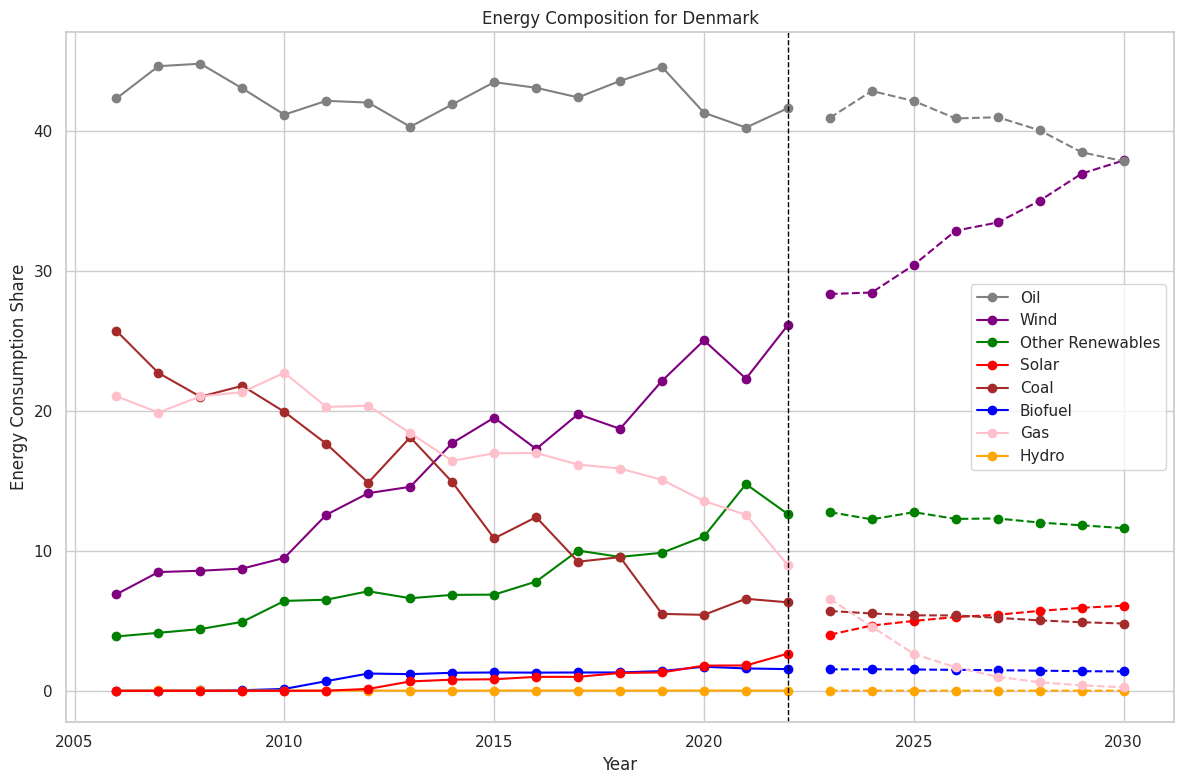

In [37]:
forecast_energy_columns = ["biofuel_share_energy", "hydro_share_energy", "other_renewables_share_energy",
                           "solar_share_energy", "wind_share_energy", "coal_share_energy",
                           "gas_share_energy", "oil_share_energy"]

energy_columns = ["biofuel_consumption share", "hydro_consumption share", "other_renewable_consumption share",
                  "solar_consumption share", "wind_consumption share", "coal_consumption share",
                  "gas_consumption share", "oil_consumption share"]

extracted_data["year"] = extracted_data["year"].astype(int)

# Function to plot energy composition for each country
def plot_energy_composition(country_data, forecast_data, country_name):
    plt.figure(figsize=(12, 8))

    # Plot actual data
    country_actual_data = country_data[country_data["year"] <= 2022]
    plt.plot(country_actual_data["year"], country_actual_data["biofuel_share_energy"], linestyle='-', marker='o', color='blue', label='Biofuel')
    plt.plot(country_actual_data["year"], country_actual_data["hydro_share_energy"], linestyle='-', marker='o', color='orange', label='Hydro')
    plt.plot(country_actual_data["year"], country_actual_data["other_renewables_share_energy"], linestyle='-', marker='o', color='green', label='Other Renewables')
    plt.plot(country_actual_data["year"], country_actual_data["solar_share_energy"], linestyle='-', marker='o', color='red', label='Solar')
    plt.plot(country_actual_data["year"], country_actual_data["wind_share_energy"], linestyle='-', marker='o', color='purple', label='Wind')
    plt.plot(country_actual_data["year"], country_actual_data["coal_share_energy"], linestyle='-', marker='o', color='brown', label='Coal')
    plt.plot(country_actual_data["year"], country_actual_data["gas_share_energy"], linestyle='-', marker='o', color='pink', label='Gas')
    plt.plot(country_actual_data["year"], country_actual_data["oil_share_energy"], linestyle='-', marker='o', color='gray', label='Oil')

    # Plot vertical line at 2022
    plt.axvline(x=2022, color='black', linestyle='--', linewidth=1)

    # Plot forecasted data
    forecast_start_year = 2023
    forecast_country_data = forecast_data[forecast_data["year"] >= forecast_start_year]

    for i, column in enumerate(energy_columns):
        color = plt.gca().lines[i].get_color()  # Get color of corresponding actual data
        plt.plot(forecast_country_data["year"], forecast_country_data[column], linestyle='--', marker='o', color=color, label=None)  # No label for forecast data

    plt.title(f"Energy Composition for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Energy Consumption Share")

    # Set legend order manually
    handles, labels = plt.gca().get_legend_handles_labels()
    sorted_handles = [handles[labels.index(label.title())] for label in ["Oil", "Wind", "Other Renewables", "Solar", "Coal", "Biofuel", "Gas", "Hydro"]]
    sorted_labels = ["Oil", "Wind", "Other Renewables", "Solar", "Coal", "Biofuel", "Gas", "Hydro"]
    plt.legend(handles=sorted_handles, labels=sorted_labels)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot energy composition for Denmark
country_actual_data_denmark = result[result["country"] == "Denmark"]
country_forecast_data_denmark = extracted_data[extracted_data["Country"] == "Denmark"]
plot_energy_composition(country_actual_data_denmark, country_forecast_data_denmark, "Denmark")

<ipython-input-38-fcb586148b86>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



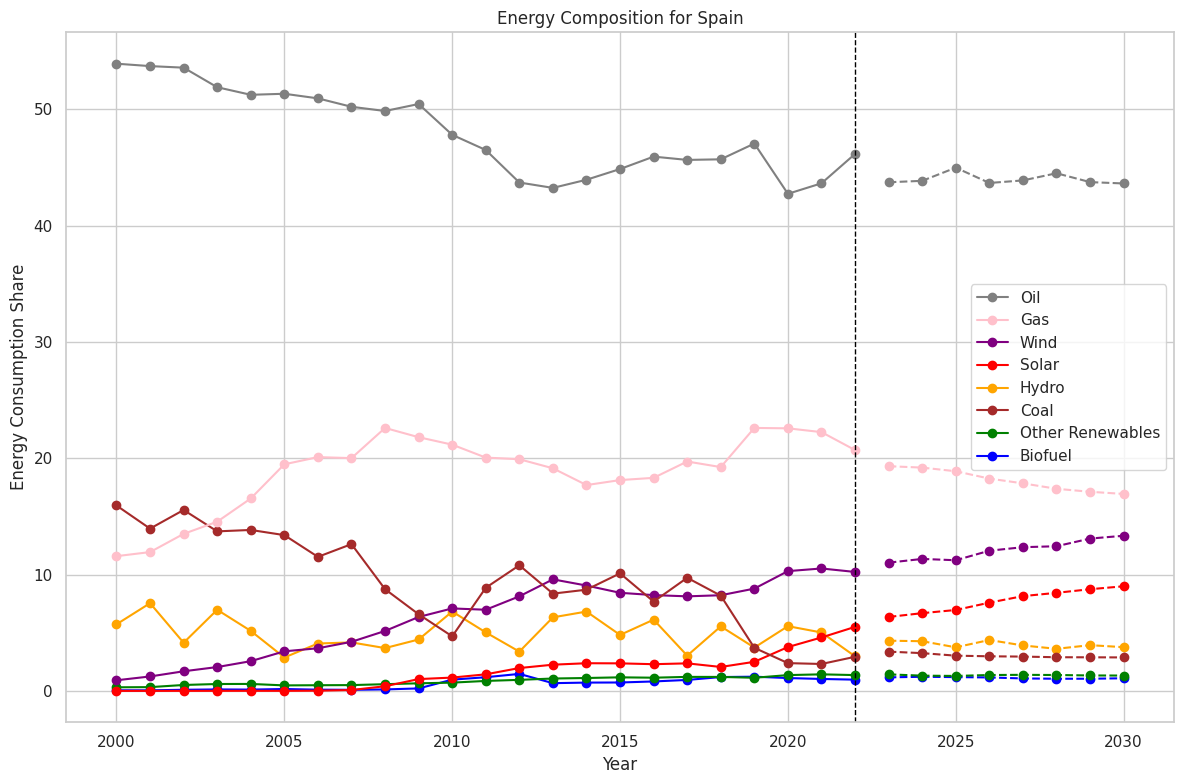

In [38]:
import matplotlib.pyplot as plt

# Forecast energy column names
forecast_energy_columns = ["biofuel_share_energy", "hydro_share_energy", "other_renewables_share_energy",
                           "solar_share_energy", "wind_share_energy", "coal_share_energy",
                           "gas_share_energy", "oil_share_energy"]

energy_columns = ["biofuel_consumption share", "hydro_consumption share", "other_renewable_consumption share",
                  "solar_consumption share", "wind_consumption share", "coal_consumption share",
                  "gas_consumption share", "oil_consumption share"]

extracted_data["year"] = extracted_data["year"].astype(int)

# Function to plot energy composition for each country
def plot_energy_composition(country_data, forecast_data, country_name):
    plt.figure(figsize=(12, 8))

    # Plot actual data
    country_actual_data = country_data[country_data["year"] <= 2022]
    plt.plot(country_actual_data["year"], country_actual_data["biofuel_share_energy"], linestyle='-', marker='o', color='blue', label='Biofuel')
    plt.plot(country_actual_data["year"], country_actual_data["hydro_share_energy"], linestyle='-', marker='o', color='orange', label='Hydro')
    plt.plot(country_actual_data["year"], country_actual_data["other_renewables_share_energy"], linestyle='-', marker='o', color='green', label='Other Renewables')
    plt.plot(country_actual_data["year"], country_actual_data["solar_share_energy"], linestyle='-', marker='o', color='red', label='Solar')
    plt.plot(country_actual_data["year"], country_actual_data["wind_share_energy"], linestyle='-', marker='o', color='purple', label='Wind')
    plt.plot(country_actual_data["year"], country_actual_data["coal_share_energy"], linestyle='-', marker='o', color='brown', label='Coal')
    plt.plot(country_actual_data["year"], country_actual_data["gas_share_energy"], linestyle='-', marker='o', color='pink', label='Gas')
    plt.plot(country_actual_data["year"], country_actual_data["oil_share_energy"], linestyle='-', marker='o', color='gray', label='Oil')

    # Plot vertical line at 2022
    plt.axvline(x=2022, color='black', linestyle='--', linewidth=1)

    # Plot forecasted data
    forecast_start_year = 2023
    forecast_country_data = forecast_data[forecast_data["year"] >= forecast_start_year]

    for i, column in enumerate(energy_columns):
        color = plt.gca().lines[i].get_color()  # Get color of corresponding actual data
        plt.plot(forecast_country_data["year"], forecast_country_data[column], linestyle='--', marker='o', color=color, label=None)  # No label for forecast data

    plt.title(f"Energy Composition for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Energy Consumption Share")

    # Set legend order manually
    handles, labels = plt.gca().get_legend_handles_labels()
    sorted_handles = [handles[labels.index(label.title())] for label in ["Oil", "Gas", "Wind", "Solar", "Hydro", "Coal", "Other Renewables", "Biofuel"]]
    sorted_labels = ["Oil", "Gas", "Wind", "Solar", "Hydro", "Coal", "Other Renewables", "Biofuel"]
    plt.legend(handles=sorted_handles, labels=sorted_labels)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot energy composition for Denmark
country_actual_data_spain = result[result["country"] == "Spain"]
country_forecast_data_spain = extracted_data[extracted_data["Country"] == "Spain"]
plot_energy_composition(country_actual_data_spain, country_forecast_data_spain, "Spain")

<ipython-input-39-762cde1356ab>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



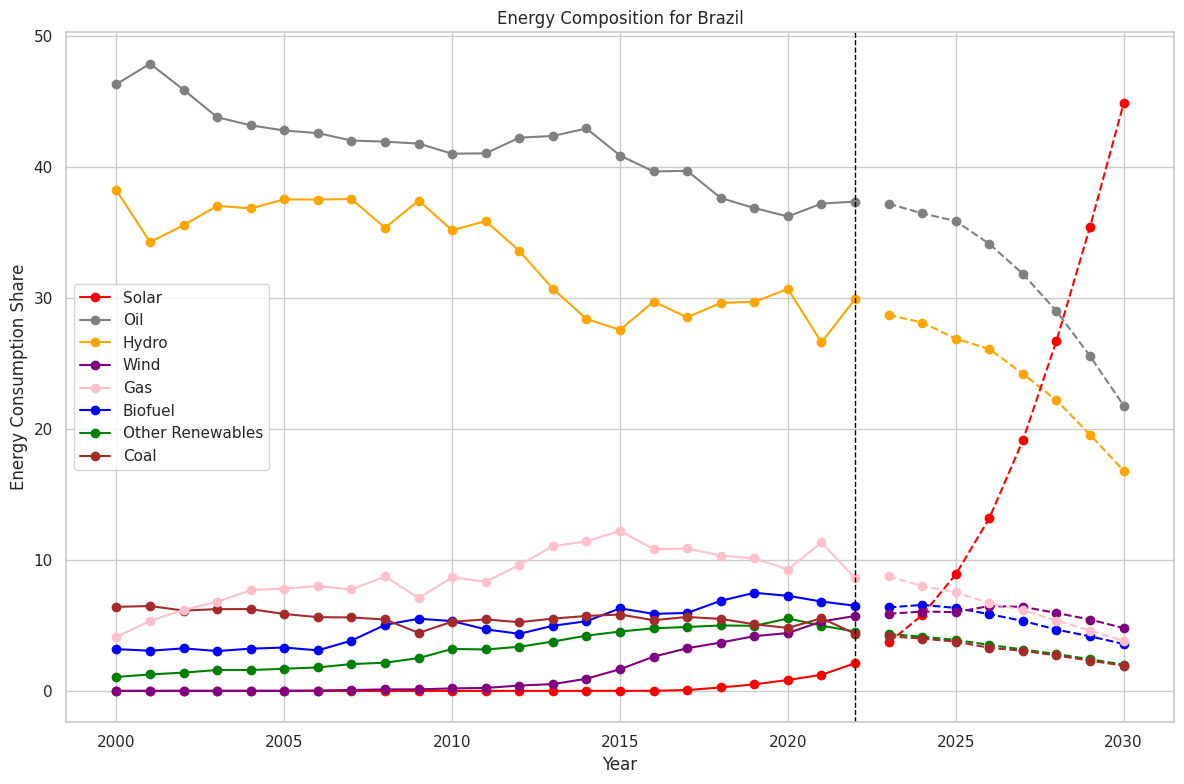

In [39]:
import matplotlib.pyplot as plt

# Forecast energy column names
forecast_energy_columns = ["biofuel_share_energy", "hydro_share_energy", "other_renewables_share_energy",
                           "solar_share_energy", "wind_share_energy", "coal_share_energy",
                           "gas_share_energy", "oil_share_energy"]

energy_columns = ["biofuel_consumption share", "hydro_consumption share", "other_renewable_consumption share",
                  "solar_consumption share", "wind_consumption share", "coal_consumption share",
                  "gas_consumption share", "oil_consumption share"]

extracted_data["year"] = extracted_data["year"].astype(int)

# Function to plot energy composition for each country
def plot_energy_composition(country_data, forecast_data, country_name):
    plt.figure(figsize=(12, 8))

    # Plot actual data
    country_actual_data = country_data[country_data["year"] <= 2022]
    plt.plot(country_actual_data["year"], country_actual_data["biofuel_share_energy"], linestyle='-', marker='o', color='blue', label='Biofuel')
    plt.plot(country_actual_data["year"], country_actual_data["hydro_share_energy"], linestyle='-', marker='o', color='orange', label='Hydro')
    plt.plot(country_actual_data["year"], country_actual_data["other_renewables_share_energy"], linestyle='-', marker='o', color='green', label='Other Renewables')
    plt.plot(country_actual_data["year"], country_actual_data["solar_share_energy"], linestyle='-', marker='o', color='red', label='Solar')
    plt.plot(country_actual_data["year"], country_actual_data["wind_share_energy"], linestyle='-', marker='o', color='purple', label='Wind')
    plt.plot(country_actual_data["year"], country_actual_data["coal_share_energy"], linestyle='-', marker='o', color='brown', label='Coal')
    plt.plot(country_actual_data["year"], country_actual_data["gas_share_energy"], linestyle='-', marker='o', color='pink', label='Gas')
    plt.plot(country_actual_data["year"], country_actual_data["oil_share_energy"], linestyle='-', marker='o', color='gray', label='Oil')

    # Plot vertical line at 2022
    plt.axvline(x=2022, color='black', linestyle='--', linewidth=1)

    # Plot forecasted data
    forecast_start_year = 2023
    forecast_country_data = forecast_data[forecast_data["year"] >= forecast_start_year]

    for i, column in enumerate(energy_columns):
        color = plt.gca().lines[i].get_color()  # Get color of corresponding actual data
        plt.plot(forecast_country_data["year"], forecast_country_data[column], linestyle='--', marker='o', color=color, label=None)  # No label for forecast data

    plt.title(f"Energy Composition for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Energy Consumption Share")

    # Set legend order manually
    handles, labels = plt.gca().get_legend_handles_labels()
    sorted_handles = [handles[labels.index(label.title())] for label in ["Solar", "Oil", "Hydro", "Wind", "Gas", "Biofuel", "Other Renewables", "Coal"]]
    sorted_labels = ["Solar", "Oil", "Hydro", "Wind", "Gas", "Biofuel", "Other Renewables", "Coal"]
    plt.legend(handles=sorted_handles, labels=sorted_labels)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot energy composition for Denmark
country_actual_data_brazil = result[result["country"] == "Brazil"]
country_forecast_data_brazil = extracted_data[extracted_data["Country"] == "Brazil"]
plot_energy_composition(country_actual_data_brazil, country_forecast_data_brazil, "Brazil")

# VAR

In [40]:
def VAR_model_filtering(country, toPredict_str, predictor_list):

  result_dict = {}
  X_test = ObtainData_single_feature(country, 2018, 2023, toPredict_str, True)
  print(X_test)

  combination_data = ObtainData_multiple_feature(country, 2018, 2023, predictor_list, True)
  predictor_list.insert(0, toPredict_str)
  all_data = ObtainData_multiple_feature(country, 1900, 2018, predictor_list, True)


  for predictor_num in range(1, len(predictor_list) + 1):
    predictor_combination = list(combinations(combination_data, predictor_num))

    for predictor_tuple in predictor_combination:
      combination_list = [element for element in predictor_tuple]
      combination_list.insert(0, toPredict_str)
      country = all_data[combination_list]

      country = country.dropna()
      country = country[~(country == 0).any(axis = 1)]

      print(combination_list)
      for j in combination_list:
        country[j + "log"] = np.log(country[j])

      if(country.shape[0] < 15):
        print("less than 15 rows, no forecasting occured")
        continue

      print("start modelling", end = " ")
      model_VAR = VAR(country.iloc[:, -predictor_num - 1:])
      model_VAR_fit = model_VAR.fit(maxlags = 3)

      forecast_VAR = model_VAR_fit.forecast(model_VAR_fit.model.endog, steps = 5)

      predicted = pd.DataFrame(forecast_VAR, index = range(2018, 2023), columns = country.columns.values[ -predictor_num -1 : ])

      for k in combination_list:
        predicted["actual" + k] = math.e**predicted[k + "log"]

      rmse = RMSE(X_test[toPredict_str], predicted["actual" + toPredict_str])
      print("The RMSE is ", rmse)

      result_dict[tuple(combination_list)] = rmse

      if(len(result_dict) > 1):
        max_key = max(result_dict, key = result_dict.get)
        del result_dict[max_key]

  return result_dict


In [41]:
def VAR_forecast(country, predictor_tuple, toPredict_str, combo_dict):
  combination_list = list(list(combo_dict[toPredict_str].keys())[0])
  print(combination_list)
  country = ObtainData_multiple_feature(country, 1960, 2023, combination_list, True)
  country = country.dropna()
  country = country[~(country == 0).any(axis = 1)]

  print(combination_list)
  for j in combination_list:
    country[j + " log"] = np.log(country[j])

  if(country.shape[0] < 15):
    print("less than 15 rows, no forecasting occured")
    return

  print("start modelling")
  model_VAR = VAR(country.iloc[:, -len(combination_list):])
  model_VAR_fit = model_VAR.fit(maxlags = 3)

  current_year = country.last_valid_index()
  step_num = 2030 - current_year

  forecast_VAR = model_VAR_fit.forecast(model_VAR_fit.model.endog, steps = step_num)


  predicted = pd.DataFrame(forecast_VAR, index = range(current_year + 1, 2031), columns = country.columns.values[ -len(combination_list): ])

  for k in combination_list:
    predicted["actual " + k] = math.e**predicted[k + " log"]

  output_df = pd.DataFrame(predicted["actual " + toPredict_str])
  output_df = output_df.loc[2023:2030]

  plt.plot(country[toPredict_str], label = "train data")
  plt.plot(predicted["actual " + toPredict_str], label = "forecasted")
  plt.legend()
  plt.show()

  return output_df

# Austria

In [42]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["biofuel_consumption", "hydro_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption"]
predictor_solar = ["oil_consumption", "other_renewable_consumption", "hydro_consumption", "biofuel_consumption", "wind_consumption", "gdp", "population"]
predictor_bio = ["gas_consumption", "hydro_consumption", "other_renewable_consumption", "oil_consumption",  "solar_consumption", "gdp"]
predictor_hydro = ["gas_consumption", "population", "gdp"]
predictor_oil = ["gas_consumption", "hydro_consumption", "population"]
predictor_other = ["oil_consumption", "gas_consumption", "gdp"]
predictor_wind = ["biofuel_consumption", "hydro_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "other_renewable_consumption", "wind_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Austria_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Austria", j, test_dict[j])
  Austria_dict[j] = result

      biofuel_consumption
year                     
2018                5.817
2019                5.852
2020                4.977
2021                4.996
2022                4.775
['biofuel_consumption', 'gas_consumption']
start modelling Root Mean Squared Error (RMSE): 2.825675242721742
The RMSE is  2.825675242721742
['biofuel_consumption', 'hydro_consumption']
start modelling Root Mean Squared Error (RMSE): 3.3868246064183705
The RMSE is  3.3868246064183705
['biofuel_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 0.37453443285831206
The RMSE is  0.37453443285831206
['biofuel_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 1.6604309132294983
The RMSE is  1.6604309132294983
['biofuel_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 5.092381026678725
The RMSE is  5.092381026678725
['biofuel_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 8.1883991314669

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 9.582697466992597
The RMSE is  9.582697466992597
['biofuel_consumption', 'hydro_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 17.414400883641047
The RMSE is  17.414400883641047
['biofuel_consumption', 'other_renewable_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 2.6198150950124
The RMSE is  2.6198150950124
['biofuel_consumption', 'other_renewable_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 2.5028533198100478
The RMSE is  2.5028533198100478
['biofuel_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.679650475123015
The RMSE is  6.679650475123015
['biofuel_consumption', 'oil_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 6.42671856260893
The RMSE is  6.42671856260893
['biofuel_consumption', 'oil_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 3.20105606

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 6.581251975898546
The RMSE is  6.581251975898546
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 4.4405124789895405
The RMSE is  4.4405124789895405
['biofuel_consumption', 'gas_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 18.221888431690232
The RMSE is  18.221888431690232
['biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 2.9579159566041966
The RMSE is  2.9579159566041966
['biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 2.180192621203854
The RMSE is  2.180192621203854
['biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 11.497759728967063
The RMSE is  11.497759728967063
['biofuel_c

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 10.807707054560877
The RMSE is  10.807707054560877
['biofuel_consumption', 'gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 4.395372346376524
The RMSE is  4.395372346376524
['biofuel_consumption', 'gas_consumption', 'hydro_consumption', 'oil_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 9.797477742325665
The RMSE is  9.797477742325665
['biofuel_consumption', 'gas_consumption', 'hydro_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 22.409716904621156
The RMSE is  22.409716904621156
['biofuel_consumption', 'gas_consumption', 'other_renewable_consumption', 'oil_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 3.96716394348189
The RMSE is  3.96716394348189
['biofuel_consumption', 'gas_consumption', 'other_renewable_consumption', 'oil_consumption', 'gdp']
start modelling Root Mean Squ

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 10.673294110097334
The RMSE is  10.673294110097334
['biofuel_consumption', 'gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 17.382819748392254
The RMSE is  17.382819748392254
['biofuel_consumption', 'gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 7.219188686523095
The RMSE is  7.219188686523095
['biofuel_consumption', 'gas_consumption', 'other_renewable_consumption', 'oil_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.1453256854695075
The RMSE is  6.1453256854695075
['biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'oil_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 9.296043638225594
The RMSE is  9.296043638225594
['biofuel_consumption', 'gas_consumption', 'hyd

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 4.496356614424515
The RMSE is  4.496356614424515
['gas_consumption', 'biofuel_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 4.685333539754675
The RMSE is  4.685333539754675
['gas_consumption', 'hydro_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 4.835127648858104
The RMSE is  4.835127648858104
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 4.359498740272938
The RMSE is  4.359498740272938
['gas_consumption', 'hydro_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 3.9018926773557387
The RMSE is  3.9018926773557387
['gas_consumption', 'hydro_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 4.41337003569246
The RMSE is  4.41337003569246
['gas_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squa

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 5.226619287321663
The RMSE is  5.226619287321663
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 4.3268841137320555
The RMSE is  4.3268841137320555
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 9.53648395937463
The RMSE is  9.53648395937463
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 6.931287992223276
The RMSE is  6.931287992223276
['gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 5.694619017532834
The RMSE is  5.694619017532834
['gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 7.157690140684325
The RMSE is  7.157

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 4.532120049258327
The RMSE is  4.532120049258327
['gas_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 9.108294785629084
The RMSE is  9.108294785629084
['gas_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 7.809546137493668
The RMSE is  7.809546137493668
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 5.210903181554138
The RMSE is  5.210903181554138
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 9.47692659877491
The RMSE is  9.47692659877491
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'wind_consumption']
start modelling Root Mean Squared Error 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 6.419758284992494
The RMSE is  6.419758284992494
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 7.968097486280068
The RMSE is  7.968097486280068
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 7.997978395189953
The RMSE is  7.997978395189953
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 10.486956386267845
The RMSE is  10.486956386267845
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 10.24556176942827
The RMSE is  10.24556176942827
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 9.892522021193118
The RMSE is  9.892522021193118
['hydro_consumption', 'gas_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.109295773374548
The RMSE is  6.109295773374548
['hydro_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 13.10329272549613
The RMSE is  13.10329272549613
['hydro_consumption', 'gas_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 10.298140954240836
The RMSE is  10.298140954240836
      solar_consumption
year                   
2018              3.850
2019              4.487
2020              5.365
2021              7.281
2022              8.391
['solar_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 1.1427267799733822
The RMSE is  1.1427267799733822
['solar_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 0.7462795251872972
The RMSE is  0.7462795251872972
['solar_consu

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 147.06942056380504
The RMSE is  147.06942056380504
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption']
start modelling Root Mean Squared Error (RMSE): 2.0021593872877075
The RMSE is  2.0021593872877075
['solar_consumption', 'other_renewable_consumption', 'biofuel_consumption']
start modelling Root Mean Squared Error (RMSE): 3.0421631407938152
The RMSE is  3.0421631407938152
['solar_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 1.6278346295841675
The RMSE is  1.6278346295841675
['solar_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 0.6181211627266334
The RMSE is  0.6181211627266334
['solar_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 1064.1407960598763
The RMSE is  1064.1407960598763
['solar_consumption', 'hydro_consumption', 'biofuel_consumption']
start 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 2.7390217638738057
The RMSE is  2.7390217638738057
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'biofuel_consumption']
start modelling Root Mean Squared Error (RMSE): 3.6600075460417414
The RMSE is  3.6600075460417414
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 2.3594663880299
The RMSE is  2.3594663880299
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 0.22644882069662184
The RMSE is  0.22644882069662184
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 1861.8115314089318
The RMSE is  1861.8115314089318
['solar_consumption', 'oil_consumption', 'hydro_consumption', 'biofuel_consumption']
start modelling Root Mean Squared Error (RMSE): 2.9374044822739553
The RMSE is  2.937404

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 22.988819126055574
The RMSE is  22.988819126055574
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'biofuel_consumption']
start modelling Root Mean Squared Error (RMSE): 3.2080517807808757
The RMSE is  3.2080517807808757
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 1.8078017793615968
The RMSE is  1.8078017793615968
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 0.8353011944298024
The RMSE is  0.8353011944298024
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 3864.613873005889
The RMSE is  3864.613873005889
['solar_consumption', 'other_renewable_consumption', 'biofuel_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 2.287824738396184
T

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 117.37108933507164
The RMSE is  117.37108933507164
['solar_consumption', 'biofuel_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 1.8829476788792066
The RMSE is  1.8829476788792066
['solar_consumption', 'biofuel_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 87273.8723727329
The RMSE is  87273.8723727329
['solar_consumption', 'biofuel_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 96.66967262648042
The RMSE is  96.66967262648042
['solar_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 76.23099439777478
The RMSE is  76.23099439777478
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'biofuel_consumption']
start modelling Root Mean Squared Error (RMSE): 3.376837066544875
The RMSE is  3.376837066544875
['solar_consumption', 'oil_consumpti

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 32.94819788868851
The RMSE is  32.94819788868851
['solar_consumption', 'oil_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 2.589452911305576
The RMSE is  2.589452911305576
['solar_consumption', 'oil_consumption', 'hydro_consumption', 'biofuel_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 1.2631981402101866
The RMSE is  1.2631981402101866
['solar_consumption', 'oil_consumption', 'hydro_consumption', 'biofuel_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 925.9376461420783
The RMSE is  925.9376461420783
['solar_consumption', 'oil_consumption', 'hydro_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 2.695989110731588
The RMSE is  2.695989110731588
['solar_consumption', 'oil_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 3.7986849797039826
The RMSE is  3.7986849797039826
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 137715.24957356584
The RMSE is  137715.24957356584
['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 1114.731213618995
The RMSE is  1114.731213618995
['solar_consumption', 'other_renewable_consumption', 'biofuel_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 4.149171480329942
The RMSE is  4.149171480329942
['solar_consumption', 'other_renewable_consumption', 'biofuel_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 10681.3093603359
The RMSE is  10681.3093603359
['solar_consumption', 'other_renewable_consumption', 'biofuel_consumption', 'gdp', 'population']
start modelling 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

The RMSE is  1.1409463403947113
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'biofuel_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 451372.95374974015
The RMSE is  451372.95374974015
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 4.704454349179065
The RMSE is  4.704454349179065
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 78.32302512946595
The RMSE is  78.32302512946595
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 4.559262896222431
The RMSE is  4.559262896222431
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'biofuel_consum

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

['solar_consumption', 'other_renewable_consumption', 'hydro_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 51.281391266283485
The RMSE is  51.281391266283485
['solar_consumption', 'other_renewable_consumption', 'biofuel_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 106178.00410214294
The RMSE is  106178.00410214294
['solar_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 2655.004962883764
The RMSE is  2655.004962883764
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 199.08570894048626
The RMSE is  199.08570894048626
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_co

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 19.17752106853716
The RMSE is  19.17752106853716
['oil_consumption', 'gas_consumption', 'hydro_consumption']
start modelling Root Mean Squared Error (RMSE): 8.274269199306138
The RMSE is  8.274269199306138
['oil_consumption', 'gas_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 16.886853070749268
The RMSE is  16.886853070749268
['oil_consumption', 'hydro_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 17.23572433139673
The RMSE is  17.23572433139673
['oil_consumption', 'gas_consumption', 'hydro_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 18.28484108351889
The RMSE is  18.28484108351889
      other_renewable_consumption
year                             
2018                       15.780
2019                       14.902
2020                       14.688
2021                       14.338
2022                       14.990
['other_renewable_consumption', '

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 2.4965421219115083
The RMSE is  2.4965421219115083
['wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 8.43499968083651
The RMSE is  8.43499968083651
['wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 1.64363810491655
The RMSE is  1.64363810491655
['wind_consumption', 'biofuel_consumption', 'hydro_consumption']
start modelling Root Mean Squared Error (RMSE): 1.258408859723075
The RMSE is  1.258408859723075
['wind_consumption', 'biofuel_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 2.106809727950964
The RMSE is  2.106809727950964
['wind_consumption', 'biofuel_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 9.877979564807015
The RMSE is  9.877979564807015
['wind_consumption', 'biofuel_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 15.428185608644354
The RMSE is  15.428185608644354
['wind_cons

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 5.6980670616150455
The RMSE is  5.6980670616150455
['wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 12.509549745018294
The RMSE is  12.509549745018294
['wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 2.1426743813128546
The RMSE is  2.1426743813128546
['wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'solar_consumption']
start modelling Root Mean Squared Error (RMSE): 8.417513426882014
The RMSE is  8.417513426882014
['wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 16.014796316819112
The RMSE is  16.014796316819112
['wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 139.33014833178942
The RMSE is  139.33014833178942
['wind_consumption', 'biofuel_con

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 6.416451612454718
The RMSE is  6.416451612454718
['wind_consumption', 'hydro_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 13.60655902510379
The RMSE is  13.60655902510379
['wind_consumption', 'other_renewable_consumption', 'solar_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 12.903782481231124
The RMSE is  12.903782481231124
['wind_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 8.738183670386462
The RMSE is  8.738183670386462
['wind_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 12.81134296833906
The RMSE is  12.81134296833906
['wind_consumption', 'solar_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 13.028632023843453
The RMSE is  13.028632023843453
['wind_consumption', 'biofuel_consumption', 'hyd

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

 Root Mean Squared Error (RMSE): 17.181866410415005
The RMSE is  17.181866410415005
['wind_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 15.16278561421385
The RMSE is  15.16278561421385
['wind_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 15.522885182749917
The RMSE is  15.522885182749917
['wind_consumption', 'hydro_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 10.132373078979834
The RMSE is  10.132373078979834
['wind_consumption', 'hydro_consumption', 'solar_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 13.647210168054634
The RMSE is  13.647210168054634
['wind_consumption', 'other_renewable_consumption', 'solar_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 6.919211439868231
The RMSE is  6.919211439868231
['coal_consumption', 'biofuel_consumption']
start modelling Root Mean Squared Error (RMSE): 5.514318039549041
The RMSE is  5.514318039549041
['coal_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 5.733947841503538
The RMSE is  5.733947841503538
['coal_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 2.713375283461893
The RMSE is  2.713375283461893
['coal_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 3.736513473011795
The RMSE is  3.736513473011795
['coal_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 5.927121371771127
The RMSE is  5.927121371771127
['coal_consumption', 'gas_consumption', 'hydro_consumption']
start modelling Root Mean Squared Error (RMSE): 6.289257683480493
The RMSE is  6.289257683480493
['coal_consumption', 'gas_consumption', 'biofuel_consumption']
start modelli

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 3.35399202164971
The RMSE is  3.35399202164971
['coal_consumption', 'biofuel_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 4.853012333049455
The RMSE is  4.853012333049455
['coal_consumption', 'biofuel_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 6.988426852548271
The RMSE is  6.988426852548271
['coal_consumption', 'biofuel_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 12.503891180528674
The RMSE is  12.503891180528674
['coal_consumption', 'biofuel_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 9.891101677451582
The RMSE is  9.891101677451582
['coal_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 6.207132549993566
The RMSE is  6.207132549993566
['coal_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 5.656221760520032
The RMSE is  5.656221760520032
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 6.6313609929674255
The RMSE is  6.6313609929674255
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 8.550438611894144
The RMSE is  8.550438611894144
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 8.476407582768697
The RMSE is  8.476407582768697
['coal_consumption', 'gas_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 6.332741269176798
The RMSE is  6.332741269176798
['coal_consumption', 'gas_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 13.020302116767109
The RMSE is  13.020302116767109
['coal_consumption', 'ga

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

 7.039752661808349
The RMSE is  7.039752661808349
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 8.028381312299778
The RMSE is  8.028381312299778
['coal_consumption', 'hydro_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 5.090102099747629
The RMSE is  5.090102099747629
['coal_consumption', 'hydro_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 6.552697070074841
The RMSE is  6.552697070074841
['coal_consumption', 'hydro_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 4.501765377131714
The RMSE is  4.501765377131714
['coal_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 6.637892236306538
The RMSE is  6.637892236306538
['coal_consumption', 'hydro_consumption', 'wind_consumpti

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 6.019730021909058
The RMSE is  6.019730021909058
['coal_consumption', 'biofuel_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 5.999006340420005
The RMSE is  5.999006340420005
['coal_consumption', 'other_renewable_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 7.942497521195954
The RMSE is  7.942497521195954
['coal_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 4.322747724901128
The RMSE is  4.322747724901128
['coal_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.498049087299376
The RMSE is  6.498049087299376
['coal_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 8.358582666042835
The RMSE is  8.358582666042835
['coal_consumption', 'gas_consumption', 'hydro_consum

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 3.616467655765003
The RMSE is  3.616467655765003
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 4.7412436189518745
The RMSE is  4.7412436189518745
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 3.8922761619820636
The RMSE is  3.8922761619820636
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 3.3210174965862733
The RMSE is  3.3210174965862733
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 5.535302374765884
The RMSE is  5.535302374765884
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Erro

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 4.206029216613259
The RMSE is  4.206029216613259
['coal_consumption', 'gas_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 10.053274560754483
The RMSE is  10.053274560754483
['coal_consumption', 'gas_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 7.308710092868302
The RMSE is  7.308710092868302
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 5.103633752607605
The RMSE is  5.103633752607605
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 13.713342352845157
The RMSE is  13.713342352845157
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 12.481392330579457
The RMSE is  12.481392330579457
['coal_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 8.131054188941222
The RMSE is  8.131054188941222
['coal_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 4.078710108876048
The RMSE is  4.078710108876048
['coal_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 10.600774007440892
The RMSE is  10.600774007440892
['coal_consumption', 'biofuel_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.817233811477554
The RMSE is  6.817233811477554
['coal_consumption', 'other_renewable_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (R

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 2.3928251745786984
The RMSE is  2.3928251745786984
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 2.832700068681629
The RMSE is  2.832700068681629
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 8.980270436050262
The RMSE is  8.980270436050262
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 10.647981213217456
The RMSE is  10.647981213217456
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 2.496925966310965
The RMSE is  2.496925966310965
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'o

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 30.273464091237834
The RMSE is  30.273464091237834
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 12.070193781956771
The RMSE is  12.070193781956771
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 9.712797206544026
The RMSE is  9.712797206544026
['coal_consumption', 'hydro_consumption', 'other_renewable_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.403317405321012
The RMSE is  6.403317405321012
['coal_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 20.48018817726815
The RMSE is  20.48018817726815
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'biofuel_cons

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

 15.428647112118318
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 6.04363380853495
The RMSE is  6.04363380853495
['coal_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 7.508761191951303
The RMSE is  7.508761191951303
['coal_consumption', 'gas_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'population', 'gdp']
start modelling Root Mean Squared Error (RMSE): 7.081427919054065
The RMSE is  7.081427919054065


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



biofuel_consumption
True
['biofuel_consumption', 'other_renewable_consumption']
['biofuel_consumption', 'other_renewable_consumption']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



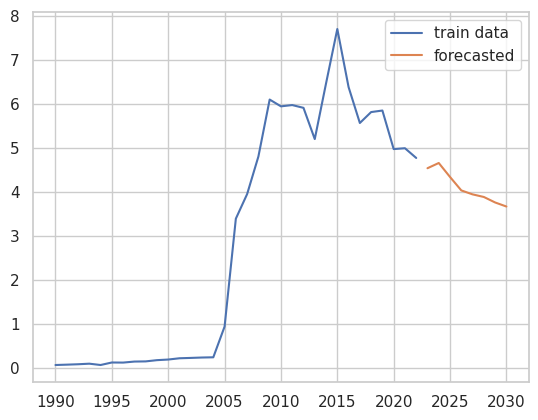

gas_consumption
True
['gas_consumption', 'oil_consumption']
['gas_consumption', 'oil_consumption']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



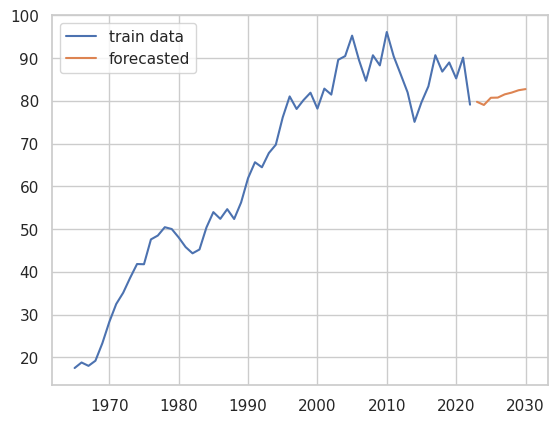

hydro_consumption
True
['hydro_consumption', 'gas_consumption', 'gdp']
['hydro_consumption', 'gas_consumption', 'gdp']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



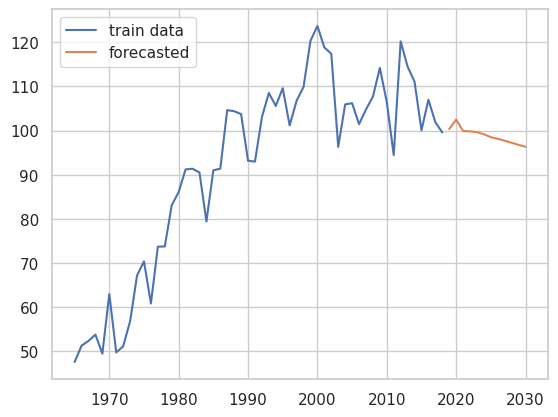

solar_consumption
True
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
['solar_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



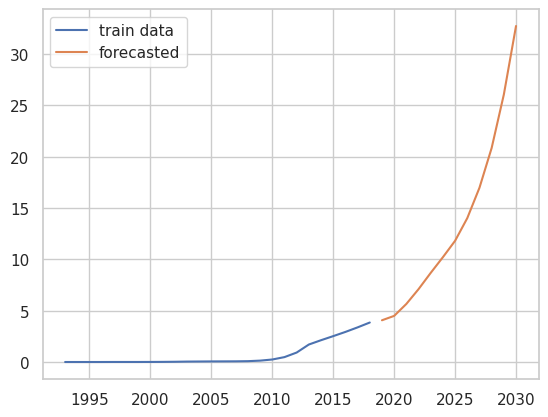

oil_consumption
True
['oil_consumption', 'gas_consumption', 'hydro_consumption']
['oil_consumption', 'gas_consumption', 'hydro_consumption']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



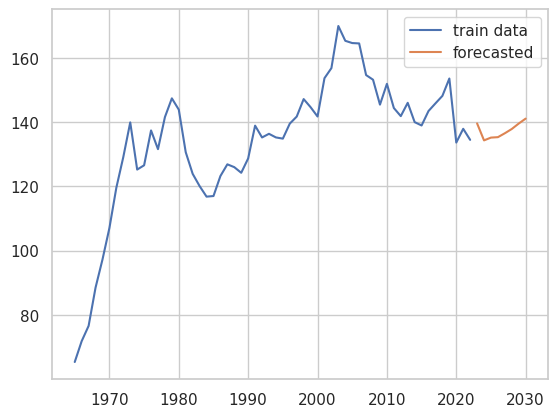

other_renewable_consumption
True
['other_renewable_consumption', 'oil_consumption', 'gdp']
['other_renewable_consumption', 'oil_consumption', 'gdp']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



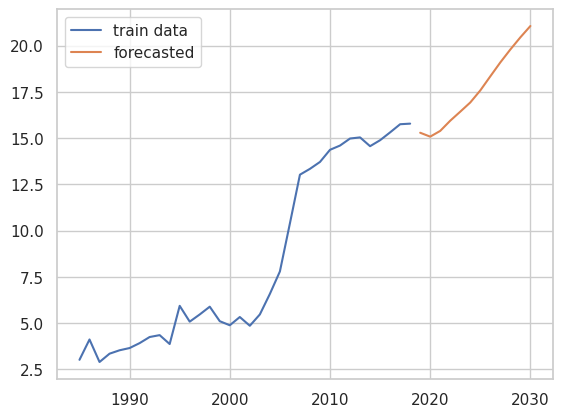

wind_consumption
True
['wind_consumption', 'biofuel_consumption']
['wind_consumption', 'biofuel_consumption']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



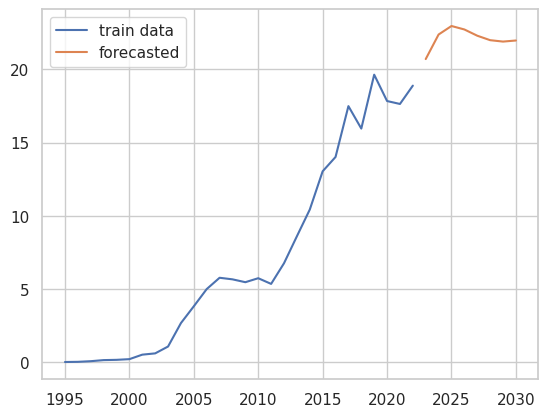

coal_consumption
True
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp']
['coal_consumption', 'gas_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp']
start modelling


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



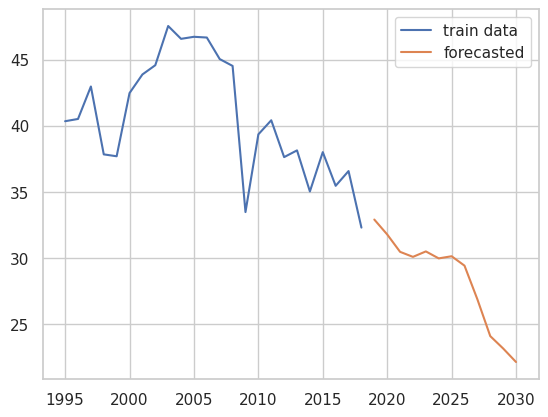

In [43]:
Austria_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Austria_dict)
  if len(Austria_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual_" +i])
    Austria_df = pd.concat([NA_df, Austria_df], axis = 1)
    continue
  bruh = VAR_forecast("Austria", Austria_dict[i], i, Austria_dict)
  Austria_df = pd.concat([Austria_df, bruh], axis = 1)


In [44]:
Austria_label = Austria_df.copy()
Austria_label["Country"] = "Austria"
Austria_label["actual nuclear_consumption"] = 0
Austria_label = Austria_label[["Country"] + [col for col in Austria_label if col != "Country"]]
Austria_label.reset_index(inplace = True, drop = False)
Austria_label

index  Country  actual biofuel_consumption  actual gas_consumption  \
0   2023  Austria                    4.542087               79.799149   
1   2024  Austria                    4.660691               79.060966   
2   2025  Austria                    4.343031               80.743706   
3   2026  Austria                    4.037885               80.784687   
4   2027  Austria                    3.948366               81.542589   
5   2028  Austria                    3.889070               81.953547   
6   2029  Austria                    3.764320               82.505130   
7   2030  Austria                    3.672517               82.771768   

   actual hydro_consumption  actual solar_consumption  actual oil_consumption  \
0                 99.646483                  8.687903              139.606573   
1                 99.171377                 10.215994              134.317083   
2                 98.515493                 11.812268              135.184217   
3                 98.153135                 14.020656              135.318018   
4                 97.706705                 16.980647              136.535844   
5                 97.235706                 20.856043              137.864513   
6                 96.774864                 26.061645              139.554663   
7                 96.329014                 32.739943              141.094299   

   actual other_renewable_consumption  actual wind_consumption  \
0                           16.426945                20.704432   
1                           16.924204                22.383536   
2                           17.575424                22.964638   
3                           18.337958                22.727900   
4                           19.091522                22.301711   
5                           19.790244                21.996150   
6                           20.447210                21.899934   
7                           21.058869                21.974058   

   actual coal_consumption  actual nuclear_consumption  
0                30.481633                           0  
1                29.953218                           0  
2                30.115414                           0  
3                29.403762                           0  
4                26.856548                           0  
5                24.068463                           0  
6                23.132951                           0  
7                22.108106                           0

# Brazil

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", \
                "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["biofuel_consumption", "hydro_consumption", "nuclear_consumption","oil_consumption", "other_renewable_consumption", "solar_consumption", \
                 "wind_consumption", "gdp", "population"]
predictor_solar = ["gas_consumption","oil_consumption", "other_renewable_consumption", "hydro_consumption", "biofuel_consumption", "wind_consumption", "gdp", "population"]
predictor_bio = ["gas_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "solar_consumption", "gdp"]
predictor_hydro = ["wind_consumption", "population", "biofuel_consumption"]
predictor_nuclear = ["hydro_consumption", "oil_consumption", "population"]

predictor_oil = ["biofuel_consumption", "other_renewable_consumption", "gas_consumption", "hydro_consumption", "wind_consumption", "solar_consumption", "population", "gdp"]
predictor_other = ["gas_consumption", "hydro_consumption", "oil_consumption", "nuclear_consumption", "solar_consumption", "wind_consumption", "population","gdp"]
predictor_wind = ["biofuel_consumption", "gas_consumption", "oil_consumption","hydro_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "other_renewable_consumption", "oil_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Brazil_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Brazil", j, test_dict[j])
  Brazil_dict[j] = result

      biofuel_consumption
year                     
2018              238.946
2019              264.483
2020              246.243
2021              243.486
2022              241.951
['biofuel_consumption', 'gas_consumption']
start modelling Root Mean Squared Error (RMSE): 65.18530780614498
The RMSE is  65.18530780614498
['biofuel_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 47.681173457050505
The RMSE is  47.681173457050505
['biofuel_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 130.90979942971163
The RMSE is  130.90979942971163
['biofuel_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 36.91065488153727
The RMSE is  36.91065488153727
['biofuel_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['biofuel_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 51.85950086880656
The RMSE is  51.85950086880656
['biofuel_consumption', 'g

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 40.05583735889485
The RMSE is  40.05583735889485
['biofuel_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 24.964113840738193
The RMSE is  24.964113840738193
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 39.64136177013825
The RMSE is  39.64136177013825
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 51.081846159433475
The RMSE is  51.081846159433475
['biofuel_consumption', 'gas_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 21.611405717862898


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 65.26640933743069
The RMSE is  65.26640933743069
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 16.945649264250076
The RMSE is  16.945649264250076
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'wind_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 94.67689441537155
The RMSE is  94.67689441537155
['biofuel_consumption', 'gas_consumption', 'oil_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['biofuel_consumption', 'gas_consumption', 'other_renewable_consumption', 'wind_consumption', 'solar_

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 46.56783648257422
The RMSE is  46.56783648257422
['gas_consumption', 'hydro_consumption']
start modelling Root Mean Squared Error (RMSE): 42.60634683466012
The RMSE is  42.60634683466012
['gas_consumption', 'nuclear_consumption']
start modelling Root Mean Squared Error (RMSE): 45.86459631846252
The RMSE is  45.86459631846252
['gas_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 37.64168662628798
The RMSE is  37.64168662628798
['gas_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 140.5206438435483
The RMSE is  140.5206438435483
['gas_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 86.59686328696552
The RMSE is  86.59686328696552
['gas_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 92.77777255204413
The RMSE is  92.77777255204413
['gas_consump

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 33.40518452684395
The RMSE is  33.40518452684395
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 134.6360856235105
The RMSE is  134.6360856235105
['gas_consumption', 'hydro_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 49.419501849569016
The RMSE is  49.419501849569016
['gas_consumption', 'hydro_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 53.60535679449924
The RMSE is  53.60535679449924
['gas_consumption', 'hydro_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 148.3464112105738
The RMSE is  148.3464112105738
['gas_consumption', 'nuclear_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 35.16550715614023
The RMSE is  35.16550715614023
['gas_consumpt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

less than 15 rows, no forecasting occured
['gas_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 87.25895145699452
The RMSE is  87.25895145699452
['gas_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 133.88896623028094
The RMSE is  133.88896623028094
['gas_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 154.83925103887273
The RMSE is  154.83925103887273
['gas_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'solar_consumption', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 46.81822398892786
The RMSE is  46.81822398892786
['gas_consumption', 'wind_consumpti

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 99.92555635818606
The RMSE is  99.92555635818606
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 81.83076425242368
The RMSE is  81.83076425242368
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 118.0540499474069
The RMSE is  118.0540499474069
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 39.06610973013408
The RMSE is  39.06610973013408
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'wind_consumption']
start modelling Root Mean Squar

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 80.55292936717277
The RMSE is  80.55292936717277
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption']
start modelling Root Mean Squared Error (RMSE): 32.633520858144145
The RMSE is  32.633520858144145
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 53.14388270243529
The RMSE is  53.14388270243529
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 55.31502586221192
The RMSE is  55.31502586221192
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 35.878184718991776
The RMSE is  35.878184718991776
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'po

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 


['gas_consumption', 'hydro_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'solar_consumption', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 73.43190573225662
The RMSE is  73.43190573225662
['gas_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 62.289736999996414
The RMSE is  62.289736999996414
['gas_consumption', 'hydro_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 142.11067841229757
The RMSE is  142.11067841229757
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 88.65855568405081
The RMSE is  88.65855568405081
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'solar_consumption

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 160.73828929381358
The RMSE is  160.73828929381358
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 72.02254252624765
The RMSE is  72.02254252624765
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 137.28196267323182
The RMSE is  137.28196267323182
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 92.62914198987356
The RMSE is  92.62914198987356
['gas_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'oil_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_con

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 39.05904385966332
The RMSE is  39.05904385966332
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 46.648014156954915
The RMSE is  46.648014156954915
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 46.39638790667936
The RMSE is  46.39638790667936
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 43.135907006818655
The RMSE is  43.135907006818655
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 52.9930862

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 323.98512112853183
The RMSE is  323.98512112853183
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 118.06659319266558
The RMSE is  118.06659319266558
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 79.72951460587377
The RMSE is  79.72951460587377
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 100.04098484326205
The RMSE is  100.04098484326205
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'oil_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'oil_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 79.52177561577325
The 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

start modelling Root Mean Squared Error (RMSE): 61.14186510602892
The RMSE is  61.14186510602892
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 99.20677000325537
The RMSE is  99.20677000325537
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 55.90023875886393
The RMSE is  55.90023875886393
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 173.91033485122134
The RMSE is  173.91033485122134
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasti

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 166.76057676853495
The RMSE is  166.76057676853495
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption']
start modelling Root Mean Squared Error (RMSE): 43.46240046399768
The RMSE is  43.46240046399768
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 88.91995666453352
The RMSE is  88.91995666453352
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 32.85850658206279
The RMSE is  32.85850658206279
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 105.18515432362746
The RMSE 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 


start modelling Root Mean Squared Error (RMSE): 65.75829649153278
The RMSE is  65.75829649153278
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 120.35593840281099
The RMSE is  120.35593840281099
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 52.72728168095178
The RMSE is  52.72728168095178
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'wind_consumption', 'gdp']
start 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 197.8561532789664
The RMSE is  197.8561532789664
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 195.1237105038996
The RMSE is  195.1237105038996
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 68.70916061874384
The RMSE is  68.70916061874384
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 70.94358208121979
The RMSE is  70.94358208121979
['gas_consumption', 'nuclear_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_c

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 76.05528643349874
The RMSE is  76.05528643349874
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'solar_consumption', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 105.96918098422535
The RMSE is  105.96918098422535
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 190.642814863262
The RMSE is  190.642814863262
['gas_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp', 'popula

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 64.17952669257951
The RMSE is  64.17952669257951
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'solar_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'wind_consumption']
start modelling Root Mean Squared Error (RMSE): 88.00632070513511
The RMSE is  88.00632070513511
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 105.87828165076672
The RMSE is  105.87828165076672
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 46.81211992831743
The RMSE is  46.81211992831743
['gas_consumption', 'biofuel_consumption', 'hydro_

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 545.8694460726487
The RMSE is  545.8694460726487
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 91.20175843048555
The RMSE is  91.20175843048555
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'oil_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 109.08250275054972
The RMSE is  109.08250275054972
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'population']
less than 15 rows, no forecas

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'oil_consumption', 'wind_consumption', 'gdp']
start modelling Root Mean Squared Error (RMSE): 174.44540443329916
The RMSE is  174.44540443329916
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'oil_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 132.57635851011574
The RMSE is  132.57635851011574
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'oil_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 138.62505470053645
The RMSE is  138.62505470053645
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
less than 15 rows, 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

 Root Mean Squared Error (RMSE): 138.2834039470739
The RMSE is  138.2834039470739
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'other_renewable_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 132.41566134847577
The RMSE is  132.41566134847577
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'solar_consumption', 'gdp', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'biofuel_consumption', 'oil_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 809.8339365658342
The RMSE is  809.8339365658342
['gas_consumption', 'biofuel_consumption', 'othe

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 

Root Mean Squared Error (RMSE): 312.10887036137177
The RMSE is  312.10887036137177
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'wind_consumption', 'population']
start modelling Root Mean Squared Error (RMSE): 822.3172614406908
The RMSE is  822.3172614406908
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'oil_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 55.97151595146385
The RMSE is  55.97151595146385
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'solar_consumption', 'population']
less than 15 rows, no forecas

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be 


['gas_consumption', 'hydro_consumption', 'oil_consumption', 'solar_consumption', 'gdp', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'oil_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 308.91226230966464
The RMSE is  308.91226230966464
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption', 'gdp']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'wind_consumption', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'solar_consumption', 'gdp', 'population']
less than 15 rows, no forecasting occured
['gas_consumption', 'hydro_consumption', 'other_renewable_consumption', 'wind_consumption', 'gdp', 'population']
start modelling Root Mean Squared Error (RMSE): 317.474

In [ ]:
Brazil_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Brazil_dict)
  if len(Brazil_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Brazil_df = pd.concat([NA_df, Brazil_df], axis = 1)
    continue
  bruh = VAR_forecast("Brazil", Brazil_dict[i], i, Brazil_dict)
  Brazil_df = pd.concat([Brazil_df, bruh], axis = 1)

Brazil_label = Brazil_df.copy()
Brazil_label["Country"] = "Brazil"

Brazil_label = Brazil_label[["Country"] + [col for col in Brazil_label if col != "Country"]]
Brazil_label.reset_index(inplace = True, drop = False)
Brazil_label

# Canada

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", \
                "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["biofuel_consumption", "nuclear_consumption","oil_consumption", "other_renewable_consumption", "solar_consumption", \
                 "wind_consumption", "gdp", "population"]
predictor_solar = ["gas_consumption", "other_renewable_consumption", "hydro_consumption", "biofuel_consumption", "wind_consumption", "population"]
predictor_bio = ["gas_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "solar_consumption", "gdp", "population"]
predictor_hydro = ["nuclear_consumption", "oil_consumption", "wind_consumption", "solar_consumption", "gdp", "population", "biofuel_consumption"]
predictor_nuclear = ["biofuel_consumption", "gas_consumption", "other_renewable_consumption", "oil_consumption", "population", "gdp"]
predictor_oil = ["nuclear_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_other = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "solar_consumption", "wind_consumption", "population","gdp"]
predictor_wind = ["biofuel_consumption", "hydro_consumption", "gas_consumption", "solar_consumption", "gdp"]
predictor_coal = ["gas_consumption", "biofuel_consumption", "oil_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Canada_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Canada", j, test_dict[j])
  Canada_dict[j] = result

In [ ]:
Canada_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Canada_dict)
  if len(Canada_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = [i])
    Canada_df = pd.concat([NA_df, Canada_df], axis = 1)
    continue
  bruh = VAR_forecast("Canada", Canada_dict[i], i, Canada_dict)
  Canada_df = pd.concat([Canada_df, bruh], axis = 1)

Canada_label = Canada_df.copy()
Canada_label["Country"] = "Canada"

Canada_label = Canada_label[["Country"] + [col for col in Canada_label if col != "Country"]]
Canada_label.reset_index(inplace = True, drop = False)
Canada_label

# Sweden

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["nuclear_consumption", "gdp"]
predictor_solar = ["gas_consumption", "other_renewable_consumption", "wind_consumption", "biofuel_consumption", "gdp", "population"]
predictor_bio = ["gas_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_hydro = ["biofuel_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "gdp"]
predictor_nuclear = ["biofuel_consumption", "oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_oil = ["biofuel_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "wind_consumption", "gdp"]
predictor_other = ["biofuel_consumption", "hydro_consumption", "wind_consumption", "gdp"]
predictor_wind = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "other_renewable_consumption", "wind_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Sweden_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Sweden", j, test_dict[j])
  Sweden_dict[j] = result

In [ ]:
Sweden_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Sweden_dict)
  if len(Sweden_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Sweden_df = pd.concat([NA_df, Sweden_df], axis = 1)
    continue
  bruh = VAR_forecast("Sweden", Sweden_dict[i], i, Sweden_dict)
  Sweden_df = pd.concat([Sweden_df, bruh], axis = 1)

Sweden_df

In [ ]:
Sweden_label = Sweden_df.copy()
Sweden_label["Country"] = "Sweden"

Sweden_label = Sweden_label[["Country"] + [col for col in Sweden_label if col != "Country"]]
Sweden_label.reset_index(inplace = True, drop = False)
Sweden_label

# Norway

In [ ]:
#full_feature = ["biofuel_consumption", "coal_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", \
 #            "other_renewable_consumption", "solar_consumption", "wind_consumption"]

test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["wind_consumption", "population", "gdp"]
predictor_solar = ["gas_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "population"]
predictor_bio = ["oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_hydro = ["wind_consumption", "coal_consumption", "solar_consumption", "gdp"]
predictor_oil = ["wind_consumption", "population", "gdp", "biofuel_consumption", "gas_consumption"]
predictor_other = ["gas_consumption", "oil_consumption", "hydro_consumption", "solar_consumption","wind_consumption", "population"]
predictor_wind = ["biofuel_consumption", "solar_consumption", "population"]
predictor_coal = ["biofuel_consumption", "hydro_consumption","oil_consumption", "population"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Norway_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Norway", j, test_dict[j])
  Norway_dict[j] = result

In [ ]:
Norway_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Norway_dict)
  if len(Norway_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Norway_df = pd.concat([NA_df, Norway_df], axis = 1)
    continue
  bruh = VAR_forecast("Norway", Norway_dict[i], i, Norway_dict)
  Norway_df = pd.concat([Norway_df, bruh], axis = 1)

Norway_df

Norway_label = Norway_df.copy()
Norway_label["Country"] = "Norway"

Norway_label = Norway_label[["Country"] + [col for col in Norway_label if col != "Country"]]
Norway_label.reset_index(inplace = True, drop = False)
Norway_label

# Peru

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["coal_consumption", "hydro_consumption", "population","gdp"]
predictor_solar = ["coal_consumption", "hydro_consumption","oil_consumption","other_renewable_consumption","population" ]
predictor_bio = ["hydro_consumption", "oil_consumption","population", "gdp" ]
predictor_hydro = ["biofuel_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption" ]
predictor_oil = ["biofuel_consumption"]
predictor_other = ["coal_consumption", "biofuel_consumption", "gas_consumption", "oil_consumption", "solar_consumption", "wind_consumption"]
predictor_wind = ["coal_consumption", "biofuel_consumption","hydro_consumption","oil_consumption","other_renewable_consumption", "solar_consumption", "population"]
predictor_coal = ["gas_consumption"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Peru_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Peru", j, test_dict[j])
  Peru_dict[j] = result

In [ ]:
Peru_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Peru_dict)
  if len(Peru_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i] )
    Peru_df = pd.concat([NA_df, Peru_df], axis = 1)
    continue
  bruh = VAR_forecast("Peru", Peru_dict[i], i, Peru_dict)
  Peru_df = pd.concat([Peru_df, bruh], axis = 1)

Peru_df

Peru_label = Peru_df.copy()
Peru_label["Country"] = "Peru"

Peru_label = Peru_label[["Country"] + [col for col in Peru_label if col != "Country"]]
Peru_label.reset_index(inplace = True, drop = False)
Peru_label

# Portugol

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["hydro_consumption"]
predictor_solar = ["biofuel_consumption", "gas_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "population", "gdp" ]
predictor_bio = ["hydro_consumption", "wind_consumption", "population", "gdp" ]
predictor_hydro = ["biofuel_consumption", "solar_consumption", "gdp" ]
predictor_oil = ["coal_consumption", "biofuel_consumption", "hydro_consumption", "other_renewable_consumption", "wind_consumption", "population", "gdp"]
predictor_other = ["coal_consumption", "biofuel_consumption", "hydro_consumption", "oil_consumption", "wind_consumption"]
predictor_wind = ["coal_consumption", "gas_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["biofuel_consumption", "hydro_consumption", "oil_consumption", "solar_consumption", "wind_consumption", "population", "gdp" ]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Portugal_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Portugal", j, test_dict[j])
  Portugal_dict[j] = result

In [ ]:
Portugal_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Portugal_dict)
  if len(Portugal_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Portugal_df = pd.concat([NA_df, Portugal_df], axis = 1)
    continue
  bruh = VAR_forecast("Portugal", Portugal_dict[i], i, Portugal_dict)
  Portugal_df = pd.concat([Portugal_df, bruh], axis = 1)

Portugal_df

In [ ]:
Portugal_label = Portugal_df.copy()
Portugal_label["Country"] = "Portugal"

Portugal_label = Portugal_label[["Country"] + [col for col in Portugal_label if col != "Country"]]
Portugal_label.reset_index(inplace = True, drop = False)
Portugal_label

#Venezuela

In [ ]:
test_feature = ["gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption",]

predictor_gas = ["hydro_consumption", "population"]
predictor_solar = ["hydro_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "gdp", "population"]
predictor_hydro = ["other_renewable_consumption", "solar_consumption", "wind_consumption", "gdp", "population"]
predictor_oil = ["hydro_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption",]
predictor_other = ["oil_consumption", "solar_consumption", "population", "gdp"]
predictor_wind = ["hydro_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp"]

total_predictor_list = [predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind]

test_dict = {}

# Ensure that the minimum length is used for iteration
min_length = min(len(test_feature), len(total_predictor_list))

for i in range(min_length):
    test_dict[test_feature[i]] = total_predictor_list[i]

Venezuela_dict = {}

for j in test_dict.keys():
    result = VAR_model_filtering("Venezuela", j, test_dict[j])
    Venezuela_dict[j] = result

In [ ]:
Venezuela_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Venezuela_dict)
  if len(Venezuela_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Venezuela_df = pd.concat([NA_df, Venezuela_df], axis = 1)
    continue
  bruh = VAR_forecast("Venezuela", Venezuela_dict[i], i, Venezuela_dict)
  Venezuela_df = pd.concat([Venezuela_df, bruh], axis = 1)

Venezuela_df

In [ ]:
Venezuela_label = Venezuela_df.copy()
Venezuela_label["Country"] = "Venezuela"

Venezuela_label = Venezuela_label[["Country"] + [col for col in Venezuela_label.columns if col != "Country"]]
Venezuela_label.reset_index(inplace=True, drop=False)
Venezuela_label

#Spain

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["biofuel_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "gdp", "coal_consumption"]
predictor_solar = ["gas_consumption", "other_renewable_consumption", "wind_consumption", "biofuel_consumption", "gdp", "nuclear_consumption", "oil_consumption", "coal_consumption"]
predictor_bio = ["gas_consumption", "nuclear_consumption", "oil_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_hydro = ["biofuel_consumption", "gas_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp", "coal_consumption"]
predictor_nuclear = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp", "coal_consumption"]
predictor_oil = ["biofuel_consumption", "gas_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_other = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", "solar_consumption", "wind_consumption", "population", "gdp", "coal_consumption"]
predictor_wind = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "gdp", "population", "coal_consumption"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Spain_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Spain", j, test_dict[j])
  Spain_dict[j] = result

In [ ]:
Spain_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Spain_dict)
  if len(Spain_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = [i])
    Spain_df = pd.concat([NA_df, Spain_df], axis = 1)
    continue
  bruh = VAR_forecast("Spain", Spain_dict[i], i, Spain_dict)
  Spain_df = pd.concat([Spain_df, bruh], axis = 1)

Spain_df

In [ ]:
Spain_label = Spain_df.copy()
Spain_label["Country"] = "Spain"

Spain_label = Spain_label[["Country"] + [col for col in Spain_label if col != "Country"]]
Spain_label.reset_index(inplace = True, drop = False)
Spain_label

#Switzerland

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["biofuel_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp", "coal_consumption"]
predictor_solar = ["biofuel_consumption", "other_renewable_consumption", "wind_consumption", "gdp", "population", "coal_consumption"]
predictor_bio = ["hydro_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_hydro = ["biofuel_consumption", "gas_consumption", "nuclear_consumption", "solar_consumption"]
predictor_nuclear = ["biofuel_consumption", "gas_consumption", "oil_consumption", "solar_consumption", "population"]
predictor_oil = ["biofuel_consumption", "hydro_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp", "coal_consumption"]
predictor_other = ["nuclear_consumption", "oil_consumption", "solar_consumption", "wind_consumption", "population", "gdp", "coal_consumption"]
predictor_wind = ["gdp"]
predictor_coal = ["hydro_consumption", "biofuel_consumption", "oil_consumption", "solar_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Switzerland_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Switzerland", j, test_dict[j])
  Switzerland_dict[j] = result

In [ ]:
Switzerland_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Switzerland_dict)
  if len(Switzerland_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = [ "actual " + i])
    Switzerland_df = pd.concat([NA_df, Switzerland_df], axis = 1)
    continue
  bruh = VAR_forecast("Switzerland", Switzerland_dict[i], i, Switzerland_dict)
  Switzerland_df = pd.concat([Switzerland_df, bruh], axis = 1)

Switzerland_df

In [ ]:
Switzerland_label = Switzerland_df.copy()
Switzerland_label["Country"] = "Switzerland"

Switzerland_label = Switzerland_label[["Country"] + [col for col in Switzerland_label if col != "Country"]]
Switzerland_label.reset_index(inplace = True, drop = False)
Switzerland_label

# Ecuador

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["wind_consumption", "population", "gdp"]
predictor_solar = ["gas_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "population"]
predictor_bio = ["oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_hydro = ["wind_consumption", "coal_consumption", "solar_consumption", "gdp"]
predictor_oil = ["wind_consumption", "population", "gdp", "biofuel_consumption", "gas_consumption"]
predictor_other = ["gas_consumption", "oil_consumption", "hydro_consumption", "solar_consumption","wind_consumption", "population"]
predictor_wind = ["biofuel_consumption", "solar_consumption", "population"]
predictor_coal = ["biofuel_consumption", "hydro_consumption"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Ecuador_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Ecuador", j, test_dict[j])
  Ecuador_dict[j] = result

In [ ]:
Ecuador_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Ecuador_dict)
  if len(Ecuador_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Ecuador_df = pd.concat([NA_df, Ecuador_df], axis = 1)
    continue
  bruh = VAR_forecast("Ecuador", Ecuador_dict[i], i, Ecuador_dict)
  Ecuador_df = pd.concat([Ecuador_df, bruh], axis = 1)

Ecuador_df

In [ ]:
Ecuador_label = Ecuador_df.copy()
Ecuador_label["Country"] = "Ecuador"

Ecuador_df_label = Ecuador_label[["Country"] + [col for col in Ecuador_label if col != "Country"]]
Ecuador_label.reset_index(inplace = True, drop = False)

columns = list(Ecuador_label.columns)
country_index = columns.index("Country")
columns.pop(country_index)
columns.insert(0, "Country")
Ecuador_label = Ecuador_label[columns]
Ecuador_label


# Finland

In [ ]:
ObtainData_multiple_feature("Finland", 2000, 2022, ["nuclear_consumption"], True)

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["coal_consumption", "hydro_consumption", "population","gdp"]
predictor_solar = ["coal_consumption", "hydro_consumption","other_renewable_consumption","population" ]
predictor_bio = [ "gdp" ]
predictor_nuclear = ["other_renewable_consumption"]
predictor_hydro = ["biofuel_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption" ]
predictor_oil = ["biofuel_consumption"]
predictor_other = ["coal_consumption", "biofuel_consumption", "gas_consumption", "oil_consumption", "solar_consumption", "wind_consumption"]
predictor_wind = ["coal_consumption", "biofuel_consumption", "gas_consumption","hydro_consumption","oil_consumption","other_renewable_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Finland_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Finland", j, test_dict[j])
  Finland_dict[j] = result

In [ ]:
Finland_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Finland_dict)
  if len(Finland_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = [i])
    Finland_df = pd.concat([NA_df, Finland_df], axis = 1)
    continue
  bruh = VAR_forecast("Finland", Finland_dict[i], i, Finland_dict)
  Finland_df = pd.concat([Finland_df, bruh], axis = 1)

Finland_df

In [ ]:
Finland_label = Finland_df.copy()
Finland_label["Country"] = "Finland"

Finland_label = Finland_label[["Country"] + [col for col in Finland_label if col != "Country"]]
Finland_label.reset_index(inplace = True, drop = False)
Finland_label

# New Zealand

In [ ]:
test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["wind_consumption", "population", "gdp"]
predictor_solar = ["gas_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "population"]
predictor_bio = ["oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_hydro = ["wind_consumption", "coal_consumption", "solar_consumption", "gdp"]
predictor_oil = ["wind_consumption", "population", "gdp", "biofuel_consumption", "gas_consumption"]
predictor_other = ["gas_consumption", "oil_consumption", "hydro_consumption", "solar_consumption","wind_consumption", "population"]
predictor_wind = ["biofuel_consumption", "solar_consumption", "population"]
predictor_coal = ["biofuel_consumption", "hydro_consumption"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

NewZealand_dict = {}

for j in test_feature:
  result = VAR_model_filtering("New Zealand", j, test_dict[j])
  NewZealand_dict[j] = result

In [ ]:
NewZealand_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in NewZealand_dict)
  if len(NewZealand_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    NewZealand_df = pd.concat([NA_df, NewZealand_df], axis = 1)
    continue
  bruh = VAR_forecast("New Zealand", NewZealand_dict[i], i, NewZealand_dict)
  NewZealand_df = pd.concat([NewZealand_df, bruh], axis = 1)

NewZealand_df

In [ ]:
NewZealand_label = NewZealand_df.copy()
NewZealand_label["Country"] = "New Zealand"

Newzealand_label = NewZealand_label[["Country"] + [col for col in NewZealand_label if col != "Country"]]
NewZealand_label.reset_index(inplace = True, drop = False)
NewZealand_label

columns = list(NewZealand_label.columns)
country_index = columns.index("Country")
columns.pop(country_index)
columns.insert(0, "Country")
NewZealand_label = NewZealand_label[columns]
NewZealand_label

# Colombia

In [ ]:
#full_feature = ["biofuel_consumption", "coal_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", \
 #            "other_renewable_consumption", "solar_consumption", "wind_consumption"]

test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["nuclear_consumption", "gdp"]
predictor_solar = ["gas_consumption", "other_renewable_consumption", "wind_consumption", "biofuel_consumption", "gdp", "population"]
predictor_bio = ["gas_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_hydro = ["biofuel_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "gdp"]
predictor_nuclear = ["biofuel_consumption", "oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_oil = ["biofuel_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "wind_consumption", "gdp"]
predictor_other = ["biofuel_consumption", "hydro_consumption", "wind_consumption", "gdp"]
predictor_wind = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "other_renewable_consumption", "wind_consumption", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Colombia_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Colombia", j, test_dict[j])
  Colombia_dict[j] = result

In [ ]:
Colombia_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Colombia_dict)
  if len(Colombia_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Colombia_df = pd.concat([NA_df, Colombia_df], axis = 1)
    continue
  bruh = VAR_forecast("Colombia", Colombia_dict[i], i, Colombia_dict)
  Colombia_df = pd.concat([Colombia_df, bruh], axis = 1)

Colombia_df

Colombia_label = Colombia_df.copy()
Colombia_label["Country"] = "Colombia"

Colombia_label = Colombia_label[["Country"] + [col for col in Colombia_label if col != "Country"]]
Colombia_label.reset_index(inplace = True, drop = False)
Colombia_label

columns = list(Colombia_label.columns)
country_index = columns.index("Country")
columns.pop(country_index)
columns.insert(0, "Country")
Colombia_label = Colombia_label[columns]
Colombia_label

# Croatia

In [ ]:
#full_feature = ["biofuel_consumption", "coal_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", \
 #            "other_renewable_consumption", "solar_consumption", "wind_consumption"]

test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["nuclear_consumption", "gdp"]
predictor_solar = ["gas_consumption", "other_renewable_consumption", "wind_consumption", "biofuel_consumption", "gdp", "population"]
predictor_bio = ["gas_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_hydro = ["biofuel_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "gdp"]
predictor_nuclear = ["biofuel_consumption", "oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_oil = ["biofuel_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "wind_consumption", "gdp"]
predictor_other = ["biofuel_consumption", "hydro_consumption", "wind_consumption", "gdp"]
predictor_wind = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "other_renewable_consumption", "wind_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Croatia_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Croatia", j, test_dict[j])
  Croatia_dict[j] = result

In [ ]:
Croatia_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Croatia_dict)
  if len(Croatia_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Croatia_df = pd.concat([NA_df, Croatia_df], axis = 1)
    continue
  bruh = VAR_forecast("Croatia", Croatia_dict[i], i, Croatia_dict)
  Croatia_df = pd.concat([Croatia_df, bruh], axis = 1)

Croatia_df

Croatia_label = Croatia_df.copy()
Croatia_label["Country"] = "Croatia"

Croatia_label = Croatia_label[["Country"] + [col for col in Croatia_label if col != "Country"]]
Croatia_label.reset_index(inplace = True, drop = False)
Croatia_label

columns = list(Croatia_label.columns)
country_index = columns.index("Country")
columns.pop(country_index)
columns.insert(0, "Country")
Croatia_label = Croatia_label[columns]
Croatia_label

# Denmark

In [ ]:
#full_feature = ["biofuel_consumption", "coal_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", \
 #            "other_renewable_consumption", "solar_consumption", "wind_consumption"]

test_feature = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "solar_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "wind_consumption", "coal_consumption"]

predictor_gas = ["nuclear_consumption", "gdp"]
predictor_solar = ["gas_consumption", "other_renewable_consumption", "biofuel_consumption", "gdp", "population"]
predictor_bio = ["gas_consumption", "nuclear_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "population", "gdp"]
predictor_hydro = ["biofuel_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption", "gdp"]
predictor_nuclear = ["biofuel_consumption", "oil_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_oil = ["biofuel_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "wind_consumption", "gdp"]
predictor_other = ["biofuel_consumption", "hydro_consumption", "wind_consumption", "gdp"]
predictor_wind = ["biofuel_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "other_renewable_consumption", "population", "gdp"]
predictor_coal = ["gas_consumption", "hydro_consumption", "biofuel_consumption", "other_renewable_consumption", "wind_consumption", "population", "gdp"]

total_predictor_list = [predictor_bio, predictor_gas, predictor_hydro, predictor_solar, predictor_nuclear, predictor_oil, predictor_other, predictor_wind, predictor_coal]

test_dict = {}
for i in range(len(test_feature)):
  test_dict[test_feature[i]] = total_predictor_list[i]

Denmark_dict = {}

for j in test_feature:
  result = VAR_model_filtering("Denmark", j, test_dict[j])
  Denmark_dict[j] = result

In [ ]:
Denmark_df = pd.DataFrame()

for i in test_feature:
  print(i)
  print(i in Denmark_dict)
  if len(Denmark_dict[i]) == 0:
    NA_df = pd.DataFrame(columns = ["actual " + i])
    Denmark_df = pd.concat([NA_df, Denmark_df], axis = 1)
    continue
  bruh = VAR_forecast("Denmark", Denmark_dict[i], i, Denmark_dict)
  Denmark_df = pd.concat([Denmark_df, bruh], axis = 1)

Denmark_df

Denmark_label = Denmark_df.copy()
Denmark_label["Country"] = "Denmark"

Denmark_label = Denmark_label[["Country"] + [col for col in Denmark_label if col != "Country"]]
Denmark_label.reset_index(inplace = True, drop = False)
Denmark_label

columns = list(Denmark_label.columns)
country_index = columns.index("Country")
columns.pop(country_index)
columns.insert(0, "Country")
Denmark_label = Denmark_label[columns]
Denmark_label

# Overall Data

In [ ]:
country_name = ['Austria', 'Brazil', 'Canada', 'Colombia', 'Croatia', 'Denmark',
       'Ecuador', 'Finland', 'NewZealand', 'Norway', 'Peru', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'Venezuela']

dfs = []

for country_name in country_name:
  country_df = globals()[country_name + "_label"]
  dfs.append(country_df)

all_country_forecast_VAR = pd.concat(dfs, ignore_index = True)

all_country_forecast_VAR = all_country_forecast_VAR[["index", "Country", "actual biofuel_consumption", "actual coal_consumption", "actual gas_consumption", "actual hydro_consumption", \
                                                     "actual nuclear_consumption", "actual oil_consumption", "actual other_renewable_consumption", \
                                                     "actual solar_consumption", "actual wind_consumption"]]
all_country_forecast_VAR

In [ ]:
all_country_forecast_VAR.columns = list(all_country_forecast.columns.values)
all_country_forecast_VAR

In [ ]:
all_country_forecast

In [ ]:
all_country_forecast_VAR_filled = all_country_forecast_VAR.combine_first(all_country_forecast)
all_country_forecast_VAR_filled = all_country_forecast_VAR_filled.fillna(0)

#display the entire table
print(all_country_forecast_VAR_filled.to_string())

all_country_forecast_VAR_filled.to_csv('absolute consumption complete.csv')

In [ ]:
all_country_forecast_VAR_filled.to_csv('/content/drive/My Drive/Colab Notebooks/absolute_consumption_complete.csv')

In [ ]:
all_country_forecast_VAR_filled.columns.values

In [ ]:
col_var = list(all_country_forecast_VAR_filled.columns.values)
col_var.remove("year")
col_var.remove("Country")

all_country_forecast_VAR_share = all_country_forecast_VAR_filled.copy()
all_country_forecast_VAR_share["year"] = all_country_forecast_VAR_share["year"].astype(str)
all_country_forecast_VAR_share["energy sum"] = all_country_forecast_VAR_share.sum(axis = 1, numeric_only = True)


for i in range(all_country_forecast_VAR_share.shape[0]):
  for j in col_var:
    all_country_forecast_VAR_share[j + " share"] = round(all_country_forecast_VAR_share[j] *100 / all_country_forecast_VAR_share["energy sum"], 3)

all_country_forecast_VAR_share = all_country_forecast_VAR_share.drop(col_var, axis = 1)


all_country_forecast_VAR_share.drop(columns = ["energy sum"], inplace = True)


renewable_sum = ["biofuel_consumption share", "hydro_consumption share", "other_renewable_consumption share", "solar_consumption share", "wind_consumption share"]
fossil_sum = ["coal_consumption share", "gas_consumption share", "oil_consumption share"]

all_country_forecast_VAR_share["renewable_energy_consumption share"] = all_country_forecast_VAR_share[renewable_sum].sum(axis = 1)
all_country_forecast_VAR_share["fossil_fuel_consumption share"] = all_country_forecast_VAR_share[fossil_sum].sum(axis = 1)
all_country_forecast_VAR_share

all_country_forecast_VAR_share.to_csv('/content/drive/My Drive/Colab Notebooks/percentage_consumption_2023_2030.csv')


In [ ]:
print(all_country_forecast_VAR_share.to_string())

# VAR Result Analysis

In [ ]:
# This is for Renewable Energy

country_nuclear_share = arima_2030_allforecast[["Country", "renewable_energy_consumption share"]]
#print(country_nuclear_share)

# Filter the dataframe for the year 2023
arima_2023_allforecast = all_country_forecast_share[all_country_forecast_share["year"].isin(["2023"])]

# Drop the column "energy sum" if present
if "energy sum" in arima_2023_allforecast.columns:
    arima_2023_allforecast.drop(columns=["energy sum"], inplace=True)

# Calculate the renewable energy consumption share and fossil fuel consumption share for 2023
arima_2023_allforecast["renewable_energy_consumption share"] = arima_2023_allforecast[renewable_sum].sum(axis=1)
arima_2023_allforecast["fossil_fuel_consumption share"] = arima_2023_allforecast[fossil_sum].sum(axis=1)


country_nuclear_share_2023 = arima_2023_allforecast[["Country", "renewable_energy_consumption share"]]
#print(country_nuclear_share_2023)

# Sort data for 2030
country_nuclear_share_sorted_2030 = country_nuclear_share.sort_values(by="renewable_energy_consumption share", ascending=False)

# Sort data for 2023, keeping the original order
country_nuclear_share_sorted_2023 = country_nuclear_share_2023.set_index("Country").reindex(country_nuclear_share_sorted_2030["Country"]).reset_index()

# Set up the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Get the number of countries
num_countries = len(country_nuclear_share_sorted_2030)

# Set the width of the bars
bar_width = 0.35

# Plot the bars for 2030
x = np.arange(num_countries)
plt.bar(x, country_nuclear_share_sorted_2030["renewable_energy_consumption share"], width=bar_width, label='2030', color='blue')  # 2030 bars are blue

# Plot the bars for 2023
plt.bar(x + bar_width, country_nuclear_share_sorted_2023["renewable_energy_consumption share"], width=bar_width, label='2022', color='orange')  # 2022 bars are orange

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Renewable Energy Consumption Share')
plt.title('Renewable Energy Consumption Share Comparison (2022 vs 2030)')
plt.xticks(x + bar_width / 2, country_nuclear_share_sorted_2030["Country"], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# This is for fossil fuel


country_nuclear_share = arima_2030_allforecast[["Country", "fossil_fuel_consumption share"]]


# Filter the dataframe for the year 2023
arima_2023_allforecast = all_country_forecast_share[all_country_forecast_share["year"].isin(["2023"])]

# Drop the column "energy sum" if present
if "energy sum" in arima_2023_allforecast.columns:
    arima_2023_allforecast.drop(columns=["energy sum"], inplace=True)

# Calculate the renewable energy consumption share and fossil fuel consumption share for 2023
arima_2023_allforecast["renewable_energy_consumption share"] = arima_2023_allforecast[renewable_sum].sum(axis=1)
arima_2023_allforecast["fossil_fuel_consumption share"] = arima_2023_allforecast[fossil_sum].sum(axis=1)

# Print the data for 2023
# print(arima_2023_allforecast)

country_nuclear_share_2023 = arima_2023_allforecast[["Country", "fossil_fuel_consumption share"]]
#print(country_nuclear_share_2023)

# Sort data for 2030
country_nuclear_share_sorted_2030 = country_nuclear_share.sort_values(by="fossil_fuel_consumption share", ascending=False)

# Sort data for 2023, keeping the original order
country_nuclear_share_sorted_2023 = country_nuclear_share_2023.set_index("Country").reindex(country_nuclear_share_sorted_2030["Country"]).reset_index()

# Set up the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Get the number of countries
num_countries = len(country_nuclear_share_sorted_2030)

# Set the width of the bars
bar_width = 0.35

# Plot the bars for 2030
x = np.arange(num_countries)
plt.bar(x, country_nuclear_share_sorted_2030["fossil_fuel_consumption share"], width=bar_width, label='2030', color='blue')  # 2030 bars are blue

# Plot the bars for 2023
plt.bar(x + bar_width, country_nuclear_share_sorted_2023["fossil_fuel_consumption share"], width=bar_width, label='2022', color='orange')  # 2022 bars are orange

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Fossil Fuel Energy Consumption Share')
plt.title('Fossil Fuel Consumption Share Comparison (2022 vs 2030)')
plt.xticks(x + bar_width / 2, country_nuclear_share_sorted_2030["Country"], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
country_nuclear_share = arima_2030_allforecast[["Country", "nuclear_consumption share"]]

# Filter the dataframe for the year 2023
arima_2023_allforecast = all_country_forecast_share[all_country_forecast_share["year"].isin(["2023"])]

# Drop the column "energy sum" if present
if "energy sum" in arima_2023_allforecast.columns:
    arima_2023_allforecast.drop(columns=["energy sum"], inplace=True)

# Calculate the renewable energy consumption share and fossil fuel consumption share for 2023
arima_2023_allforecast["renewable_energy_consumption share"] = arima_2023_allforecast[renewable_sum].sum(axis=1)
arima_2023_allforecast["fossil_fuel_consumption share"] = arima_2023_allforecast[fossil_sum].sum(axis=1)

# Print the data for 2023
# print(arima_2023_allforecast)

country_nuclear_share_2023 = arima_2023_allforecast[["Country", "nuclear_consumption share"]]
#print(country_nuclear_share_2023)

# Sort data for 2030
country_nuclear_share_sorted_2030 = country_nuclear_share.sort_values(by="nuclear_consumption share", ascending=False)

# Sort data for 2023, keeping the original order
country_nuclear_share_sorted_2023 = country_nuclear_share_2023.set_index("Country").reindex(country_nuclear_share_sorted_2030["Country"]).reset_index()

# Set up the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Get the number of countries
num_countries = len(country_nuclear_share_sorted_2030)

# Set the width of the bars
bar_width = 0.35

# Plot the bars for 2030
x = np.arange(num_countries)
plt.bar(x, country_nuclear_share_sorted_2030["nuclear_consumption share"], width=bar_width, label='2030', color='blue')  # 2030 bars are blue

# Plot the bars for 2023
plt.bar(x + bar_width, country_nuclear_share_sorted_2023["nuclear_consumption share"], width=bar_width, label='2022', color='orange')  # 2022 bars are orange

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Nuclear Energy Consumption Share')
plt.title('Nuclear Energy Consumption Share Comparison (2022 vs 2030)')
plt.xticks(x + bar_width / 2, country_nuclear_share_sorted_2030["Country"], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
arima = all_country_forecast_share
var = all_country_forecast_VAR_share

arima_country = arima[arima["Country"].isin(["Norway", "Brazil", "Sweden", "Spain", "Peru"])]

arima_norway = arima[arima["Country"].isin(["Norway"])]
arima_brazil = arima[arima["Country"].isin(["Brazil"])]
arima_sweden = arima[arima["Country"].isin(["Sweden"])]
arima_spain = arima[arima["Country"].isin(["Spain"])]
arima_peru = arima[arima["Country"].isin(["Peru"])]

alist_arima = [arima_norway, arima_brazil, arima_spain]

var_country = var[var["Country"].isin(["Norway", "Brazil", "Sweden", "Spain", "Peru"])]

var_norway = var[var["Country"].isin(["Norway"])]
var_brazil = var[var["Country"].isin(["Brazil"])]
var_sweden = var[var["Country"].isin(["Sweden"])]
var_spain = var[var["Country"].isin(["Spain"])]
var_peru = var[var["Country"].isin(["Peru"])]

alist = [var_norway, var_brazil, var_spain]

In [ ]:
line_styles = ['-', '--', '-.', ':']  # Add more line styles if needed

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Iterate through the models and plot their data
for i in range(len(alist)):
    # Obtain and plot historical data
    history_data = ObtainData_single_feature(alist[i]["Country"].values[0], 2000, 2022, "renewables_share_energy", False)
    plt.plot(history_data["year"], history_data["renewables_share_energy"], linestyle=line_styles[i % len(line_styles)],
             marker='o', color='black')

    # Plot VAR model data
    var_color = plt.cm.tab10(i)  # Use different colors from a colormap for VAR models
    plt.plot(alist[i]["year"].astype(int), alist[i]["renewable_energy_consumption share"],
             label="VAR " + alist[i]["Country"].values[0], linestyle=line_styles[i % len(line_styles)],
             marker='o', color=var_color)

    # Plot ARIMA model data
    arima_color = plt.cm.tab20(i + 10)  # Use different colors from a colormap for ARIMA models
    plt.plot(alist_arima[i]["year"].astype(int), alist_arima[i]["renewable_energy_consumption share"],
             label="ARIMA " + alist_arima[i]["Country"].values[0], linestyle=line_styles[i % len(line_styles)],
             marker='o', color=arima_color)

# Add vertical line for reference
plt.axvline(x=2022, color='gray', linestyle='--', linewidth=1)


plt.xlabel('Year')
plt.ylabel("Renewable Energy Consumption Share")
plt.legend()
plt.show()
